In [ ]:
#sandbox =
#PATH_DATA = '/data/sandboxes/'+sandbox+'/data/data/'



# Workshop de Python

Cargamos datasets con información de admisiones a hospitales de enfermos de diabetes. El objetivo es, una vez limpiado el dataset, estudiarlo para extraer el máximo número de insights de los datos.



## Información sobre los datos

* Encounter ID 
    - ID único de la admisión de un paciente
* Patient number 
    - ID único de paciente
* Race 
    - Raza
* Gender
    - Sexo
* Age
    - Edad (en intervalos de 10 años)
    
* Weight
    - Peso en libras
* Admission type 
    - Identificador del tipo de admisión 
* Discharge disposition
    - Identificador del tipo de alta 
* Admission source
    - Identificador de la fuente de admisión 
* Time in hospital 
    - Número de días que han pasado entre admission y discharge (admisión y alta)
* Payer code
    - Identificador del código de pago
* Medical specialty
    - Identificador de la especialidad médica donde es ingresado el paciente
* Number of lab procedures 
    - Número de análisis en laboratorio que se han llevado a cabo durante el ingreso del paciente
* Number of procedures 
    - Número de procedimientos (diferentes a los análisis en laboratorio) que se han llevado a cabo durante el ingreso del paciente
* Number of medications
    - Número de nombres de medicamentos distintos que se hayan administrado al paciente durante su ingreso
* Number of outpatient visits
    - Número de visitas como paciente externo (no ingresado, por ejemplo) que ha tenido el paciente durante el año antes de esta admisión
* Number of emergency
    - Numero de visitas de emergencia del paciente durante el año antes de esta admisión
* Number of inpatient visits 
    - Número de visitas en las que ha estado ingresado el paciente durante el año antes de esta admisión
* Diagnosis 1 
    - Diagnóstico primario (codificado como los tres primeros dígitos del ICD9)
    - Descripción de los códigos ICD9: http://icd9.chrisendres.com/index.php?action=contents
* Diagnosis 2 
    - Diagnóstico secundario (codificado como los tres primeros dígitos del ICD9)
    - Descripción de los códigos ICD9: http://icd9.chrisendres.com/index.php?action=contents
* Diagnosis 3 
    - Diagnóstico adicional (codificado como los tres primeros dígitos del ICD9)
    - Descripción de los códigos ICD9: http://icd9.chrisendres.com/index.php?action=contents
* Number of diagnoses 
    - Número de diagnósticos que se han introducido al sistema
* Glucose serum test result 
    - Indica el rango del resultado de la prueba de glucosa, o si no se llevó a cabo la prueba. Valores: “>200,” “>300,” “normal,” y “none” si no se realizó la prueba
* A1c test result
    - Indica el rango del resultado de la prueba de hemoglobina A1c, o si no se llevó a cabo la prueba. Valores: “>8” si el resultado fue mayor del 8%, “>7” si el resultado fue mayor del 7% pero menor del 8%, “normal” si el resultado fue menor del 7%, y “none” si no se realizó la prueba.
* Change of medications 
    - Indica si ha habido un cambio en la medicación para la diabetes (tanto en la dosis como en el propio medicamento)
* Diabetes medications 
    - Indica si ha el paciente toma medicación para la diabetes
* 24 features for medications
    - Para los nombres genéricos de los medicamentos metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiridepioglitazone, metformin-rosiglitazone, y metforminpioglitazone, la variable indica si se prescribió o no el medicamento durante la visita del paciente
    - Valores: “up” si se subió la dosis durante la visita, “down” si se bajó la dosis, “steady” si la dosis no cambió, y “no” si no se prescribió el medicamento
* Readmitted 
    - Indica cuántos días ha tardado el paciente en volver al hospital y ser readmitido. Valores: “<30” si el paciente fue readmitido en menos de 30 días, “>30” si el paciente fue readmitido en más de 30 días, y “No” si el paciente no ha sido readmitido



## Cargar librerías

In [99]:
%matplotlib inline

import re
import random
from collections import Counter

import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kstest
sns.set(color_codes=True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import  roc_curve, auc, silhouette_score, recall_score, precision_score, confusion_matrix, make_scorer
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.cluster import KMeans
from sklearn import preprocessing

#opcion para mostrar todas las columnas del dataframe sin que aparescan los ""...""
pd.set_option('display.max_columns', None)

C:\Users\MB83982\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  




## Lectura de datos

In [2]:
"""
#lectura de datos con spark
diabetes = spark.read.csv(PATH_DATA+'diabetic_data.csv', sep=',', header=True, inferSchema=True).toPandas()
admission_source = spark.read.csv(PATH_DATA+'admission_source_id.csv', sep=',', header=True, inferSchema=True).toPandas()
admission_type = spark.read.csv(PATH_DATA+'admission_type_id.csv', sep=',', header=True, inferSchema=True).toPandas()
discharge_disposition = spark.read.csv(PATH_DATA+'discharge_disposition_id.csv', sep=',', header=True, inferSchema=True).toPandas()
"""

"\n#lectura de datos con spark\ndiabetes = spark.read.csv(PATH_DATA+'diabetic_data.csv', sep=',', header=True, inferSchema=True).toPandas()\nadmission_source = spark.read.csv(PATH_DATA+'admission_source_id.csv', sep=',', header=True, inferSchema=True).toPandas()\nadmission_type = spark.read.csv(PATH_DATA+'admission_type_id.csv', sep=',', header=True, inferSchema=True).toPandas()\ndischarge_disposition = spark.read.csv(PATH_DATA+'discharge_disposition_id.csv', sep=',', header=True, inferSchema=True).toPandas()\n"

In [40]:
#lectura con pandas
diabetes = pd.read_csv('data/diabetic_data.csv',sep=',',na_values=['?','Unknown/Invalid'])
admission_source = pd.read_csv('data/admission_source_id.csv',na_values=['?'],dtype={'admission_source_id':int,'description':object})
admission_type = pd.read_csv('data/admission_type_id.csv',sep=',',dtype={'admission_type_id':int,'description':object})
discharge_disposition = pd.read_csv('data/discharge_disposition_id.csv',sep=',',dtype={'discharge_disposition_id':int,'description':object})

C:\Users\MB83982\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### comprobar correcta lectura de los datos

In [41]:
print(f'El dataset diabetes tiene {diabetes.shape[0]} renglones y {diabetes.shape[1]} columnas')
print(f'El dataset admission_source tiene {admission_source.shape[0]} renglones y {admission_source.shape[1]} columnas')
print(f'El dataset admission_type tiene {admission_type.shape[0]} renglones y {admission_type.shape[1]} columnas')
print(f'El dataset discharge_disposition tiene {discharge_disposition.shape[0]} renglones y {discharge_disposition.shape[1]} columnas')

El dataset diabetes tiene 101766 renglones y 50 columnas
El dataset admission_source tiene 25 renglones y 2 columnas
El dataset admission_type tiene 8 renglones y 2 columnas
El dataset discharge_disposition tiene 30 renglones y 2 columnas


In [42]:
print(diabetes.shape)
diabetes.head()

(101766, 50)


encounter_id  patient_nbr             race  gender      age weight  \
0  2278392       8222157      Caucasian        Female  [0-10)   NaN     
1  149190        55629189     Caucasian        Female  [10-20)  NaN     
2  64410         86047875     AfricanAmerican  Female  [20-30)  NaN     
3  500364        82442376     Caucasian        Male    [30-40)  NaN     
4  16680         42519267     Caucasian        Male    [40-50)  NaN     

   admission_type_id  discharge_disposition_id  admission_source_id  \
0  6                  25                        1                     
1  1                  1                         7                     
2  1                  1                         7                     
3  1                  1                         7                     
4  1                  1                         7                     

   time_in_hospital payer_code         medical_specialty  num_lab_procedures  \
0  1                 NaN        Pediatrics-Endocrinology  41                   
1  3                 NaN        NaN                       59                   
2  2                 NaN        NaN                       11                   
3  2                 NaN        NaN                       44                   
4  1                 NaN        NaN                       51                   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0  0               1                0                  0                  
1  0               18               0                  0                  
2  5               13               2                  0                  
3  1               16               0                  0                  
4  0               8                0                  0                  

   number_inpatient  diag_1  diag_2 diag_3  number_diagnoses max_glu_serum  \
0  0                 250.83  NaN     NaN    1                 None           
1  0                 276     250.01  255    9                 None           
2  1                 648     250     V27    6                 None           
3  0                 8       250.43  403    7                 None           
4  0                 197     157     250    5                 None           

  A1Cresult metformin repaglinide nateglinide chlorpropamide glimepiride  \
0  None      No        No          No          No             No           
1  None      No        No          No          No             No           
2  None      No        No          No          No             No           
3  None      No        No          No          No             No           
4  None      No        No          No          No             No           

  acetohexamide glipizide glyburide tolbutamide pioglitazone rosiglitazone  \
0  No            No        No        No          No           No             
1  No            No        No        No          No           No             
2  No            Steady    No        No          No           No             
3  No            No        No        No          No           No             
4  No            Steady    No        No          No           No             

  acarbose miglitol troglitazone tolazamide examide citoglipton insulin  \
0  No       No       No           No         No      No          No       
1  No       No       No           No         No      No          Up       
2  No       No       No           No         No      No          No       
3  No       No       No           No         No      No          Up       
4  No       No       No           No         No      No          Steady   

  glyburide-metformin glipizide-metformin glimepiride-pioglitazone  \
0  No                  No                  No                        
1  No                  No                  No                        
2  No                  No                  No                        
3  No                  No                  No                        
4  No    

In [43]:
admission_source.head()

admission_source_id                                      description
0  1                     Physician Referral                            
1  2                    Clinic Referral                                
2  3                    HMO Referral                                   
3  4                    Transfer from a hospital                       
4  5                     Transfer from a Skilled Nursing Facility (SNF)

In [44]:
admission_type.head()

admission_type_id    description
0  1                  Emergency    
1  2                  Urgent       
2  3                  Elective     
3  4                  Newborn      
4  5                  Not Available

In [45]:
discharge_disposition.head(30)

discharge_disposition_id  \
0   1                          
1   2                          
2   3                          
3   4                          
4   5                          
5   6                          
6   7                          
7   8                          
8   9                          
9   10                         
10  11                         
11  12                         
12  13                         
13  14                         
14  15                         
15  16                         
16  17                         
17  18                         
18  19                         
19  20                         
20  21                         
21  22                         
22  23                         
23  24                         
24  25                         
25  26                         
26  30                         
27  27                         
28  28                         
29  29                         

                                                                                                  description  
0   Discharged to home                                                                                         
1   Discharged/transferred to another short term hospital                                                      
2   Discharged/transferred to SNF                                                                              
3   Discharged/transferred to ICF                                                                              
4   Discharged/transferred to another type of inpatient care institution                                       
5   Discharged/transferred to home with home health service                                                    
6   Left AMA                                                                                                   
7   Discharged/transferred to home under care of Home IV provider                                              
8   Admitted as an inpatient to this hospital                                                                  
9   Neonate discharged to another hospital for neonatal aftercare                                              
10  Expired                                                                                                    
11  Still patient or expected to return for outpatient services                                                
12  Hospice / home                                                                                             
13  Hospice / medical facility                                                                                 
14  Discharged/transferred within this institution to Medicare approved swing bed                              
15  Discharged/transferred/referred another institution for outpatient services                                
16  Discharged/transferred/referred to this institution for outpatient services                                
17  None                                                                                                       
18  Expired at home. Medicaid only, hospice.                                                                   
19  Expired in a medical facility. Medicaid only, hospice.                                                     
20  Expired, place unknown. Medicaid only, hospice.                                                            
21  Discharged/transferred to another rehab fac including rehab units of a hospital .                          
22  Discharged/transferred to a long term care hospital.                                                       
23  Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.    
24  Not Mapped                                                                                                 
25  Unknown/Invalid                                                                                



### juntar todos los datos en el mismo DataFrame

In [46]:
data = diabetes.join(admission_source, on='admission_source_id',how='left', lsuffix='', rsuffix='_as').drop('admission_source_id_as',axis=1)
data = data.rename(columns={'description':'admission_source_desc'})
print(data.shape)
data.columns

(101766, 51)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_source_desc'],
      dtype='object')

In [47]:
data = data.join(admission_type, on='admission_type_id',how='left', lsuffix='', rsuffix='_as').drop('admission_type_id_as',axis=1)
data = data.rename(columns={'description':'admission_type_desc'})
print(data.shape)
data.columns

(101766, 52)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_source_desc', 'admission_type_desc'],
      dtype='object')

In [48]:
data = data.join(discharge_disposition, on='discharge_disposition_id',how='left', lsuffix='', rsuffix='_as').drop('discharge_disposition_id_as',axis=1)
data = data.rename(columns={'description':'discharge_disposition_desc'})
print(data.shape)
data.columns

(101766, 53)


Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_source_desc', 'admission_type_desc',
       'discharge_disposition_desc'],



### estudiar las dimensiones del dataset

In [49]:
print(f'El dataset final tiene {data.shape[0]} renglones y {data.shape[1]} columnas') 

El dataset final tiene 101766 renglones y 53 columnas


In [50]:
print('DIABETES \n\n'.upper()+str(data.dtypes))
print('\n\nADMISSION_SOURCE \n\n'.upper()+str(admission_source.dtypes))
print('\n\nADMISSION_TYPE \n\n'.upper()+str(admission_type.dtypes))
print('\n\n DISCHARGE_DISPOSITION \n\n'.upper()+str(discharge_disposition.dtypes))


DIABETES 

encounter_id                  int64 
patient_nbr                   int64 
race                          object
gender                        object
age                           object
weight                        object
admission_type_id             int64 
discharge_disposition_id      int64 
admission_source_id           int64 
time_in_hospital              int64 
payer_code                    object
medical_specialty             object
num_lab_procedures            int64 
num_procedures                int64 
num_medications               int64 
number_outpatient             int64 
number_emergency              int64 
number_inpatient              int64 
diag_1                        object
diag_2                        object
diag_3                        object
number_diagnoses              int64 
max_glu_serum                 object
A1Cresult                     object
metformin                     object
repaglinide                   object
nateglinide                



## Data Wrangling



### cambiar los nombres de las columnas para que cumplan buenas prácticas

In [14]:
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_source_desc', 'admission_type_desc',
       'discharge_disposition_desc'],

In [ ]:
#cambiamos el nombre de algunas columnas
"""data = (data.rename(columns={'A1Cresult':'a1c_result',
                           'glyburide-metformin':'glyburide_metformin',
                            'glipizide-metformin':'glipizide_metformin',
                            'glimepiride-pioglitazone':'glimepiride_pioglitazone',
                            'metformin-rosiglitazone':'metformin_rosiglitazone',
                             'diabetesMed':'diabetes_med',
                             'metformin-pioglitazone':'metformin_pioglitazone'
                           }))
data.columns
"""

In [51]:
or_names=list(data.columns)

dicc_names={j:j.replace('-','_').replace(' ','_') for j in or_names if j[:11]!='description'}
#dicc_names
dicc_names['description_x']='admission_source_description'
dicc_names['description_y']='admission_type_description'
dicc_names['description']='discharge_disposition_description'

In [52]:
data.rename(columns=dicc_names,inplace=True)
data.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide_metformin', 'glipizide_metformin',
       'glimepiride_pioglitazone', 'metformin_rosiglitazone',
       'metformin_pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'admission_source_desc', 'admission_type_desc',
       'discharge_disposition_desc'],



### estudiar el formato de las variables, ver cuáles se deberían modificar y modificarlas cuando se considere oportuno

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   encounter_id                101766 non-null  int64 
 1   patient_nbr                 101766 non-null  int64 
 2   race                        99493 non-null   object
 3   gender                      101763 non-null  object
 4   age                         101766 non-null  object
 5   weight                      3197 non-null    object
 6   admission_type_id           101766 non-null  int64 
 7   discharge_disposition_id    101766 non-null  int64 
 8   admission_source_id         101766 non-null  int64 
 9   time_in_hospital            101766 non-null  int64 
 10  payer_code                  61510 non-null   object
 11  medical_specialty           51817 non-null   object
 12  num_lab_procedures          101766 non-null  int64 
 13  num_procedures              1



### estudiar si hay registros repetidos

In [54]:
data.duplicated().sum()

0

In [55]:
#valida cuandtos registros diferentes tiene cada columna
data.nunique()

encounter_id                  101766
patient_nbr                   71518 
race                          5     
gender                        2     
age                           10    
weight                        9     
admission_type_id             8     
discharge_disposition_id      26    
admission_source_id           17    
time_in_hospital              14    
payer_code                    17    
medical_specialty             72    
num_lab_procedures            118   
num_procedures                7     
num_medications               75    
number_outpatient             39    
number_emergency              33    
number_inpatient              21    
diag_1                        716   
diag_2                        748   
diag_3                        789   
number_diagnoses              16    
max_glu_serum                 4     
A1Cresult                     4     
metformin                     4     
repaglinide                   4     
nateglinide                   4     
c



### estudiar si hay variables que siempre o prácticamente siempre toman el mismo valor: tomar siempre el mismo valor no aporta información al modelo

DATOS DE LA COLUMNA encounter_id
96210942     0.00001
89943846     0.00001
384306986    0.00001
94650156     0.00001
83156784     0.00001
              ...   
74454612     0.00001
208073976    0.00001
166229592    0.00001
38340702     0.00001
77856768     0.00001
Name: encounter_id, Length: 101766, dtype: float64


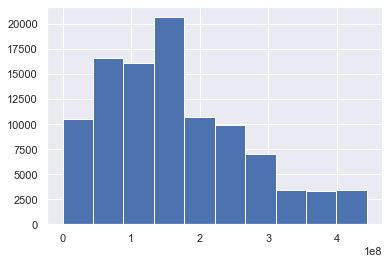

DATOS DE LA COLUMNA patient_nbr
88785891     0.000393
43140906     0.000275
23199021     0.000226
1660293      0.000226
88227540     0.000226
               ...   
71081460     0.000010
30060018     0.000010
67443444     0.000010
141344240    0.000010
93251151     0.000010
Name: patient_nbr, Length: 71518, dtype: float64


DATOS DE LA COLUMNA race
Caucasian          0.764868
AfricanAmerican    0.193079
Hispanic           0.020474
Other              0.015137
Asian              0.006443
Name: race, dtype: float64


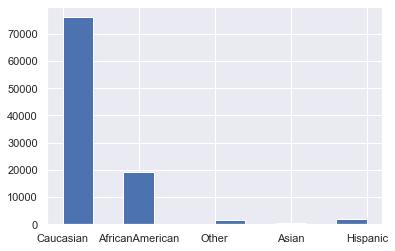

DATOS DE LA COLUMNA gender
Female    0.537602
Male      0.462398
Name: gender, dtype: float64


DATOS DE LA COLUMNA age
[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: age, dtype: float64


DATOS DE LA COLUMNA weight
[75-100)     0.417892
[50-75)      0.280576
[100-125)    0.195496
[125-150)    0.045355
[25-50)      0.030341
[0-25)       0.015014
[150-175)    0.010948
[175-200)    0.003441
>200         0.000938
Name: weight, dtype: float64


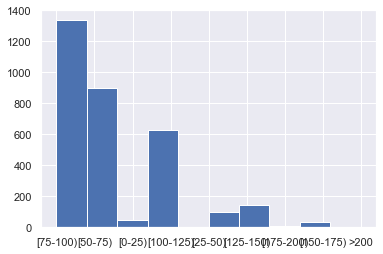

DATOS DE LA COLUMNA admission_type_id
1    0.530531
3    0.185416
2    0.181593
6    0.051992
5    0.047020
8    0.003144
7    0.000206
4    0.000098
Name: admission_type_id, dtype: float64


DATOS DE LA COLUMNA discharge_disposition_id
1     0.591887
3     0.137118
6     0.126781
18    0.036269
2     0.020911
22    0.019584
11    0.016135
5     0.011635
25    0.009718
4     0.008009
7     0.006122
23    0.004049
13    0.003921
14    0.003655
28    0.001366
8     0.001061
15    0.000619
24    0.000472
9     0.000206
17    0.000138
16    0.000108
19    0.000079
10    0.000059
27    0.000049
12    0.000029
20    0.000020
Name: discharge_disposition_id, dtype: float64


DATOS DE LA COLUMNA admission_source_id
7     0.564963
1     0.290519
17    0.066633
4     0.031317
6     0.022247
2     0.010848
5     0.008402
3     0.001838
20    0.001582
9     0.001228
8     0.000157
22    0.000118
10    0.000079
11    0.000020
14    0.000020
25    0.000020
13    0.000010
Name: admission_source_id, dtype: float64


DATOS DE LA COLUMNA time_in_hospital
3     0.174479
2     0.169251
1     0.139614
4     0.136824
5     0.097931
6     0.074082
7     0.057573
8     0.043148
9     0.029499
10    0.023014
11    0.018228
12    0.014229
13    0.011890
14    0.010239
Name: time_in_hospital, dtype: float64


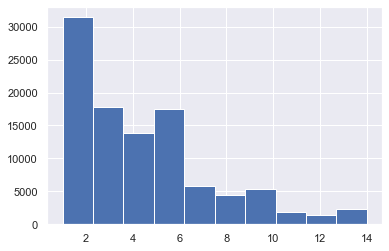

DATOS DE LA COLUMNA payer_code
MC    0.527378
HM    0.102000
SP    0.081401
BC    0.075679
MD    0.057422
CP    0.041180
UN    0.039798
CM    0.031491
OG    0.016794
PO    0.009624
DM    0.008925
CH    0.002374
WC    0.002195
OT    0.001544
MP    0.001284
SI    0.000894
FR    0.000016
Name: payer_code, dtype: float64


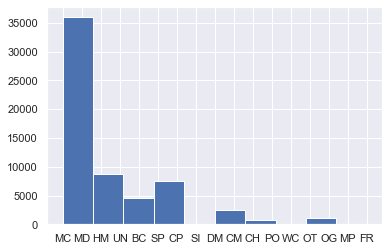

DATOS DE LA COLUMNA medical_specialty
InternalMedicine                    0.282436
Emergency/Trauma                    0.145995
Family/GeneralPractice              0.143582
Cardiology                          0.103287
Surgery-General                     0.059807
                                      ...   
Dermatology                         0.000019
Surgery-PlasticwithinHeadandNeck    0.000019
Psychiatry-Addictive                0.000019
Pediatrics-InfectiousDiseases       0.000019
Neurophysiology                     0.000019
Name: medical_specialty, Length: 72, dtype: float64


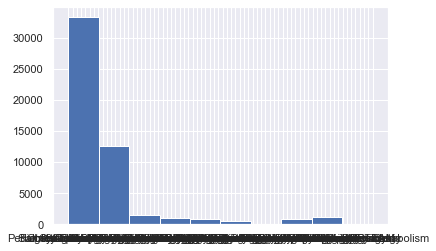

DATOS DE LA COLUMNA num_lab_procedures
1      0.031523
43     0.027553
44     0.024527
45     0.023348
38     0.021746
         ...   
107    0.000010
118    0.000010
129    0.000010
120    0.000010
121    0.000010
Name: num_lab_procedures, Length: 118, dtype: float64


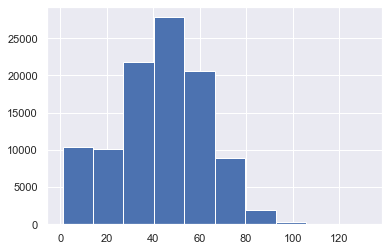

DATOS DE LA COLUMNA num_procedures
0    0.458424
1    0.203821
2    0.124963
3    0.092791
6    0.048680
4    0.041075
5    0.030246
Name: num_procedures, dtype: float64


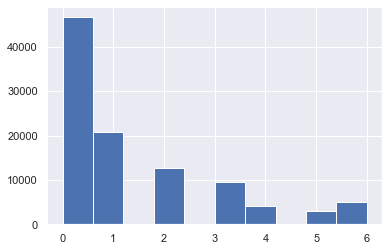

DATOS DE LA COLUMNA num_medications
13    0.059804
12    0.058998
11    0.056944
15    0.056915
14    0.056080
        ...   
70    0.000020
75    0.000020
74    0.000010
79    0.000010
81    0.000010
Name: num_medications, Length: 75, dtype: float64


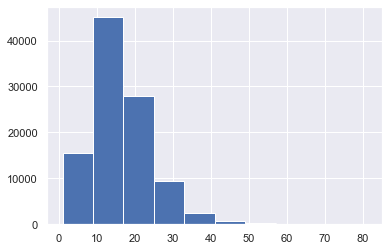

DATOS DE LA COLUMNA number_outpatient
0     0.835515
1     0.083987
2     0.035316
3     0.020066
4     0.010799
5     0.005238
6     0.002977
7     0.001523
8     0.000963
9     0.000816
10    0.000560
11    0.000413
13    0.000305
12    0.000295
14    0.000275
15    0.000197
16    0.000147
17    0.000079
21    0.000069
20    0.000069
22    0.000049
18    0.000049
19    0.000029
24    0.000029
27    0.000029
23    0.000020
25    0.000020
26    0.000020
29    0.000020
33    0.000020
35    0.000020
36    0.000020
40    0.000010
28    0.000010
34    0.000010
37    0.000010
38    0.000010
39    0.000010
42    0.000010
Name: number_outpatient, dtype: float64


DATOS DE LA COLUMNA number_emergency
0     0.888145
1     0.075438
2     0.020066
3     0.007124
4     0.003675
5     0.001887
6     0.000924
7     0.000717
8     0.000491
10    0.000334
9     0.000324
11    0.000226
13    0.000118
12    0.000098
22    0.000059
18    0.000049
16    0.000049
19    0.000039
20    0.000039
14    0.000029
15    0.000029
21    0.000020
25    0.000020
76    0.000010
54    0.000010
24    0.000010
28    0.000010
29    0.000010
37    0.000010
42    0.000010
46    0.000010
64    0.000010
63    0.000010
Name: number_emergency, dtype: float64


DATOS DE LA COLUMNA number_inpatient
0     0.664564
1     0.191822
2     0.074347
3     0.033518
4     0.015939
5     0.007979
6     0.004717
7     0.002633
8     0.001484
9     0.001091
10    0.000599
11    0.000481
12    0.000334
13    0.000197
14    0.000098
15    0.000088
16    0.000059
19    0.000020
17    0.000010
18    0.000010
21    0.000010
Name: number_inpatient, dtype: float64


DATOS DE LA COLUMNA diag_1
428     0.067443
414     0.064681
786     0.039471
410     0.035520
486     0.034478
          ...   
347     0.000010
E909    0.000010
839     0.000010
471     0.000010
325     0.000010
Name: diag_1, Length: 716, dtype: float64


DATOS DE LA COLUMNA diag_2
276     0.066583
428     0.065695
250     0.059867
427     0.049661
401     0.036841
          ...   
884     0.000010
E850    0.000010
917     0.000010
832     0.000010
948     0.000010
Name: diag_2, Length: 748, dtype: float64


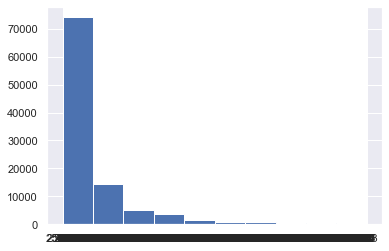

DATOS DE LA COLUMNA diag_3
250    0.115155
401    0.082607
276    0.051573
428    0.045614
427    0.039415
         ...   
381    0.000010
395    0.000010
195    0.000010
877    0.000010
757    0.000010
Name: diag_3, Length: 789, dtype: float64


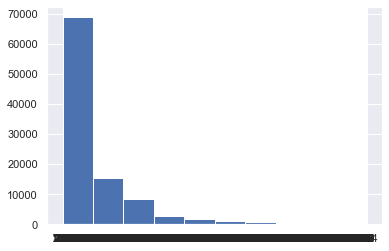

DATOS DE LA COLUMNA number_diagnoses
9     0.486155
5     0.111953
8     0.104318
7     0.102126
6     0.099847
4     0.054409
3     0.027858
2     0.010052
1     0.002152
16    0.000442
10    0.000167
13    0.000157
11    0.000108
15    0.000098
12    0.000088
14    0.000069
Name: number_diagnoses, dtype: float64


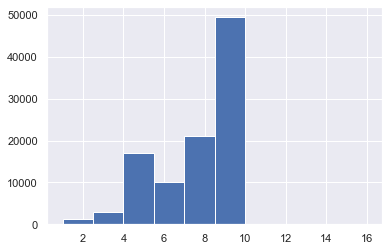

DATOS DE LA COLUMNA max_glu_serum
None    0.947468
Norm    0.025519
>200    0.014592
>300    0.012421
Name: max_glu_serum, dtype: float64


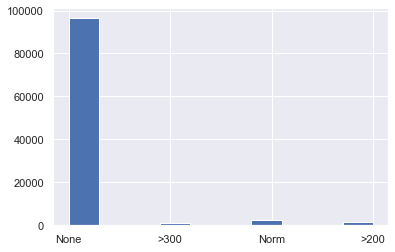

DATOS DE LA COLUMNA A1Cresult
None    0.832773
>8      0.080734
Norm    0.049034
>7      0.037458
Name: A1Cresult, dtype: float64


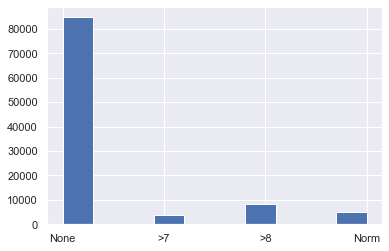

DATOS DE LA COLUMNA metformin
No        0.803589
Steady    0.180276
Up        0.010485
Down      0.005650
Name: metformin, dtype: float64


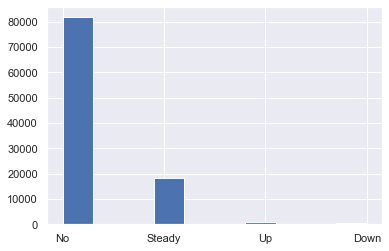

DATOS DE LA COLUMNA repaglinide
No        0.984877
Steady    0.013600
Up        0.001081
Down      0.000442
Name: repaglinide, dtype: float64


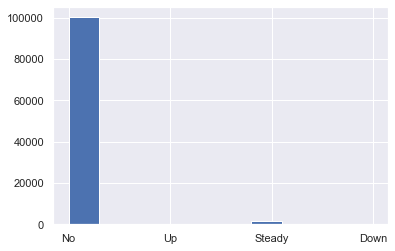

DATOS DE LA COLUMNA nateglinide
No        0.993092
Steady    0.006564
Up        0.000236
Down      0.000108
Name: nateglinide, dtype: float64


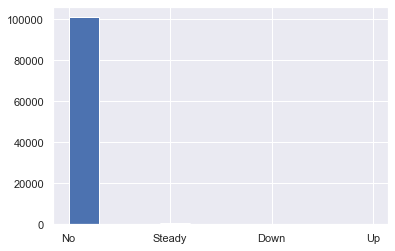

DATOS DE LA COLUMNA chlorpropamide
No        0.999155
Steady    0.000776
Up        0.000059
Down      0.000010
Name: chlorpropamide, dtype: float64


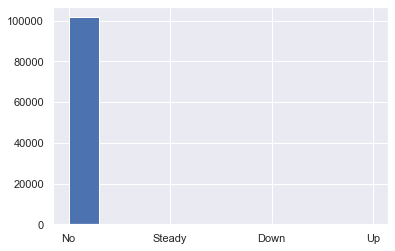

DATOS DE LA COLUMNA glimepiride
No        0.948991
Steady    0.045890
Up        0.003213
Down      0.001906
Name: glimepiride, dtype: float64


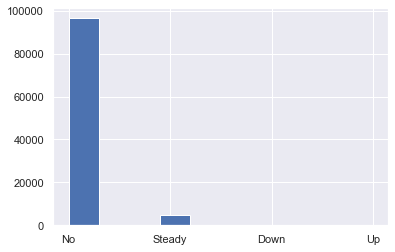

DATOS DE LA COLUMNA acetohexamide
No        0.99999
Steady    0.00001
Name: acetohexamide, dtype: float64


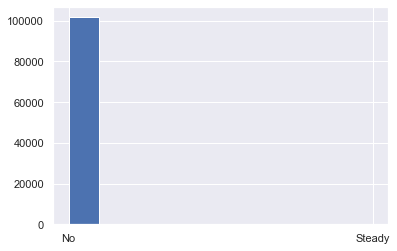

DATOS DE LA COLUMNA glipizide
No        0.875341
Steady    0.111589
Up        0.007566
Down      0.005503
Name: glipizide, dtype: float64


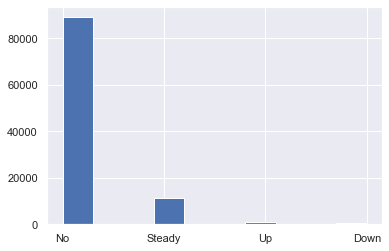

DATOS DE LA COLUMNA glyburide
No        0.895348
Steady    0.091131
Up        0.007979
Down      0.005542
Name: glyburide, dtype: float64


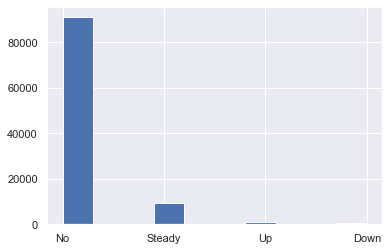

DATOS DE LA COLUMNA tolbutamide
No        0.999774
Steady    0.000226
Name: tolbutamide, dtype: float64


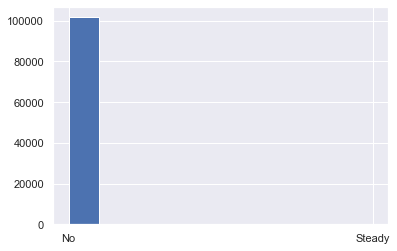

DATOS DE LA COLUMNA pioglitazone
No        0.927992
Steady    0.068549
Up        0.002299
Down      0.001160
Name: pioglitazone, dtype: float64


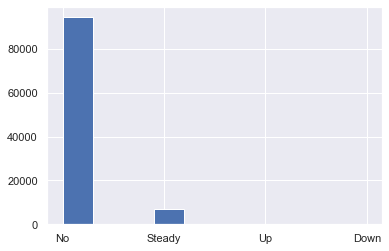

DATOS DE LA COLUMNA rosiglitazone
No        0.937455
Steady    0.059941
Up        0.001749
Down      0.000855
Name: rosiglitazone, dtype: float64


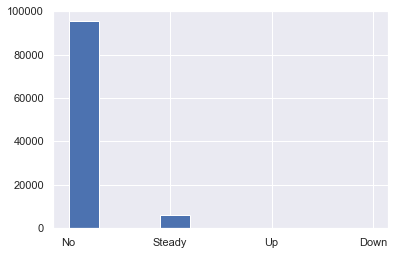

DATOS DE LA COLUMNA acarbose
No        0.996973
Steady    0.002899
Up        0.000098
Down      0.000029
Name: acarbose, dtype: float64


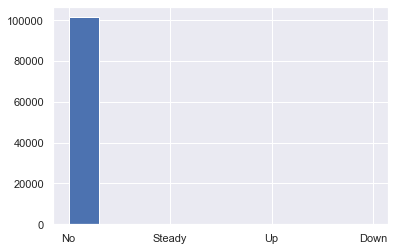

DATOS DE LA COLUMNA miglitol
No        0.999627
Steady    0.000305
Down      0.000049
Up        0.000020
Name: miglitol, dtype: float64


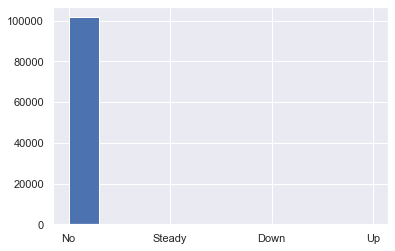

DATOS DE LA COLUMNA troglitazone
No        0.999971
Steady    0.000029
Name: troglitazone, dtype: float64


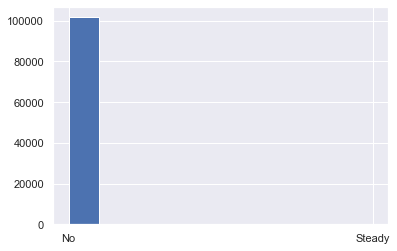

DATOS DE LA COLUMNA tolazamide
No        0.999617
Steady    0.000373
Up        0.000010
Name: tolazamide, dtype: float64


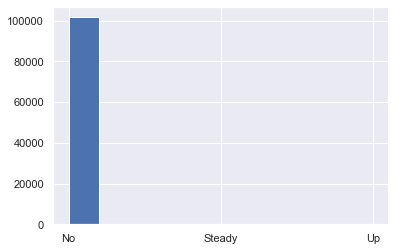

DATOS DE LA COLUMNA examide
No    1.0
Name: examide, dtype: float64


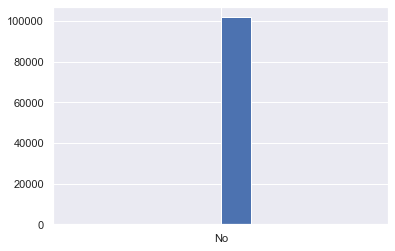

DATOS DE LA COLUMNA citoglipton
No    1.0
Name: citoglipton, dtype: float64


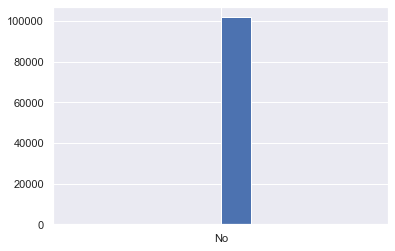

DATOS DE LA COLUMNA insulin
No        0.465607
Steady    0.303137
Down      0.120060
Up        0.111196
Name: insulin, dtype: float64


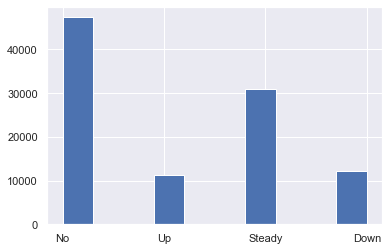

DATOS DE LA COLUMNA glyburide_metformin
No        0.993063
Steady    0.006800
Up        0.000079
Down      0.000059
Name: glyburide_metformin, dtype: float64


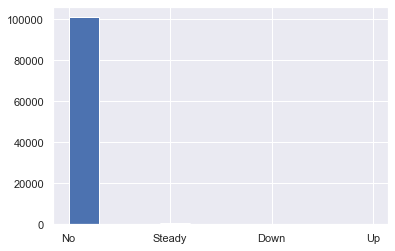

DATOS DE LA COLUMNA glipizide_metformin
No        0.999872
Steady    0.000128
Name: glipizide_metformin, dtype: float64


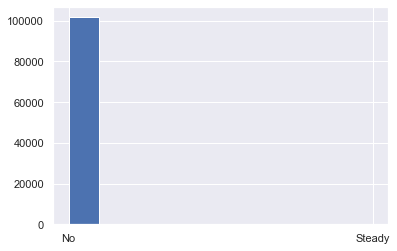

DATOS DE LA COLUMNA glimepiride_pioglitazone
No        0.99999
Steady    0.00001
Name: glimepiride_pioglitazone, dtype: float64


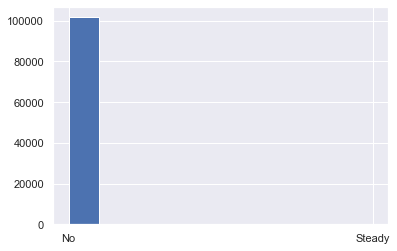

DATOS DE LA COLUMNA metformin_rosiglitazone
No        0.99998
Steady    0.00002
Name: metformin_rosiglitazone, dtype: float64


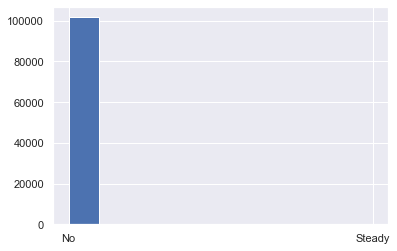

DATOS DE LA COLUMNA metformin_pioglitazone
No        0.99999
Steady    0.00001
Name: metformin_pioglitazone, dtype: float64


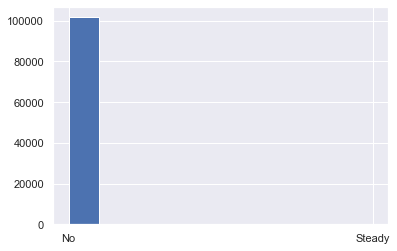

DATOS DE LA COLUMNA change
No    0.538048
Ch    0.461952
Name: change, dtype: float64


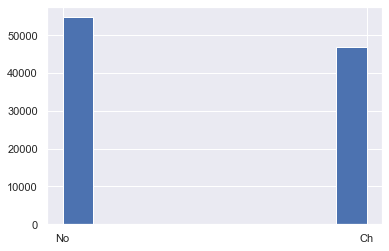

DATOS DE LA COLUMNA diabetesMed
Yes    0.770031
No     0.229969
Name: diabetesMed, dtype: float64


DATOS DE LA COLUMNA readmitted
NO     0.539119
>30    0.349282
<30    0.111599
Name: readmitted, dtype: float64


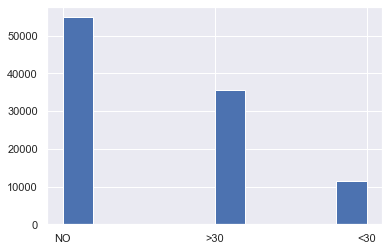

DATOS DE LA COLUMNA admission_source_desc
 Court/Law Enforcement                                        0.564974
Clinic Referral                                               0.290525
Readmission to Same Home Health Agency                        0.066635
 Transfer from a Skilled Nursing Facility (SNF)               0.031318
 Emergency Room                                               0.022248
HMO Referral                                                  0.010849
 Transfer from another health care facility                   0.008402
Transfer from a hospital                                      0.001838
 Transfer from hospital inpt/same fac reslt in a sep claim    0.001582
 Transfer from critial access hospital                        0.001228
 Not Available                                                0.000157
 Born outside this hospital                                   0.000118
Normal Delivery                                               0.000079
 Premature Delivery                

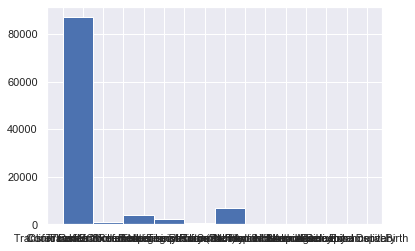

DATOS DE LA COLUMNA admission_type_desc
Urgent           0.532204
Newborn          0.186000
Elective         0.182166
Trauma Center    0.052156
None             0.047168
Not Mapped       0.000207
Not Available    0.000099
Name: admission_type_desc, dtype: float64


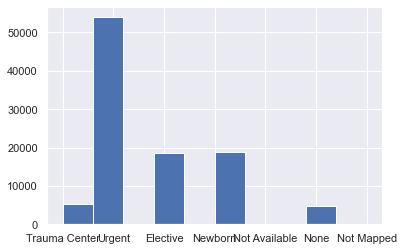

DATOS DE LA COLUMNA discharge_disposition_desc
Discharged/transferred to another short term hospital                                                        0.591887
Discharged/transferred to ICF                                                                                0.137118
Left AMA                                                                                                     0.126781
Expired at home. Medicaid only, hospice.                                                                     0.036269
Discharged/transferred to SNF                                                                                0.020911
Discharged/transferred to a long term care hospital.                                                         0.019584
Still patient or expected to return for outpatient services                                                  0.016135
Discharged/transferred to home with home health service                                                      0.011635
Unknown/I

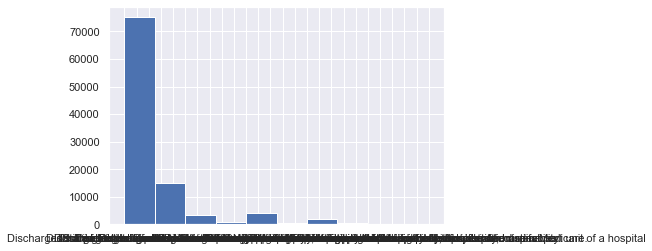

In [22]:

for col in data.columns:
    print(f'DATOS DE LA COLUMNA {col}')
    #print(data[col].value_counts())
    #imprime el porcentaje de datos que tiene cada valor
    print(data[col].value_counts(normalize = True))
    data[col].hist()
    plt.show()

In [56]:
#eliminamos las columnas con datos con un solo tipo
data.drop([
    'miglitol',
        'nateglinide',
        'glimepiride', 
        'glyburide',
        'acarbose',
        'miglitol',
        'troglitazone',
        'tolazamide',
        'examide',
        'citoglipton',
        'glyburide_metformin',
        'glipizide_metformin',
        'glimepiride_pioglitazone',
        'metformin_pioglitazone',
        'metformin_rosiglitazone',
        'admission_type_id',
        'admission_source_id','weight'
],axis=1,inplace=True)

#Eliminamos columnas altenativas
#data.drop(['glimepiride','repaglinide','nateglinide', 'pioglitazone','rosiglitazone'],axis=1)

In [ ]:
#Eliminamos las columnas no necesarias
#data.drop(['encounter_id', 'patient_nbr','admission_type_id', 'discharge_disposition_id', 'admission_source_id'],axis=1,inplace=True)



### estudiar los nulos en el dataset

In [57]:
data=data.replace('?',np.NaN)
data.isnull().any()

encounter_id                  False
patient_nbr                   False
race                          True 
gender                        True 
age                           False
discharge_disposition_id      False
time_in_hospital              False
payer_code                    True 
medical_specialty             True 
num_lab_procedures            False
num_procedures                False
num_medications               False
number_outpatient             False
number_emergency              False
number_inpatient              False
diag_1                        True 
diag_2                        True 
diag_3                        True 
number_diagnoses              False
max_glu_serum                 False
A1Cresult                     False
metformin                     False
repaglinide                   False
chlorpropamide                False
acetohexamide                 False
glipizide                     False
tolbutamide                   False
pioglitazone                

In [58]:
cols_na = [j for j in list (data.columns) if data[j].isnull().any()]
[data[i].fillna(data[i].mode()[0],inplace=True) for i in cols_na]
data.isnull().any()

encounter_id                  False
patient_nbr                   False
race                          False
gender                        False
age                           False
discharge_disposition_id      False
time_in_hospital              False
payer_code                    False
medical_specialty             False
num_lab_procedures            False
num_procedures                False
num_medications               False
number_outpatient             False
number_emergency              False
number_inpatient              False
diag_1                        False
diag_2                        False
diag_3                        False
number_diagnoses              False
max_glu_serum                 False
A1Cresult                     False
metformin                     False
repaglinide                   False
chlorpropamide                False
acetohexamide                 False
glipizide                     False
tolbutamide                   False
pioglitazone                



### estudiar los outliers

In [59]:
data.describe()

encounter_id   patient_nbr  discharge_disposition_id  time_in_hospital  \
count  1.017660e+05  1.017660e+05  101766.000000             101766.000000      
mean   1.652016e+08  5.433040e+07  3.715642                  4.395987           
std    1.026403e+08  3.869636e+07  5.280166                  2.985108           
min    1.252200e+04  1.350000e+02  1.000000                  1.000000           
25%    8.496119e+07  2.341322e+07  1.000000                  2.000000           
50%    1.523890e+08  4.550514e+07  1.000000                  4.000000           
75%    2.302709e+08  8.754595e+07  4.000000                  6.000000           
max    4.438672e+08  1.895026e+08  28.000000                 14.000000          

       num_lab_procedures  num_procedures  num_medications  number_outpatient  \
count  101766.000000       101766.000000   101766.000000    101766.000000       
mean   43.095641           1.339730        16.021844        0.369357            
std    19.674362           1.705807        8.127566         1.267265            
min    1.000000            0.000000        1.000000         0.000000            
25%    31.000000           0.000000        10.000000        0.000000            
50%    44.000000           1.000000        15.000000        0.000000            
75%    57.000000           2.000000        20.000000        0.000000            
max    132.000000          6.000000        81.000000        42.000000           

       number_emergency  number_inpatient  number_diagnoses  
count  101766.000000     101766.000000     101766.000000     
mean   0.197836          0.635566          7.422607          
std    0.930472          1.262863          1.933600          
min    0.000000          0.000000          1.000000          
25%    0.000000          0.000000          6.000000          
50%    0.000000          0.000000          8.000000          
75%    0.000000          1.000000          9.000000          
max    76.000000         21.000000         16.000000

In [60]:
data_numeric= data.select_dtypes(include = ['float64', 'int64'])
data_numeric.head()

encounter_id  patient_nbr  discharge_disposition_id  time_in_hospital  \
0  2278392       8222157      25                        1                  
1  149190        55629189     1                         3                  
2  64410         86047875     1                         2                  
3  500364        82442376     1                         2                  
4  16680         42519267     1                         1                  

   num_lab_procedures  num_procedures  num_medications  number_outpatient  \
0  41                  0               1                0                   
1  59                  0               18               0                   
2  11                  5               13               2                   
3  44                  1               16               0                   
4  51                  0               8                0                   

   number_emergency  number_inpatient  number_diagnoses  
0  0                 0                 1                 
1  0                 0                 9                 
2  0                 1                 6                 
3  0                 0                 7                 
4  0                 0                 5



### crear variables dummy en caso que sea conveniente

In [61]:
data_numeric.columns

Index(['encounter_id', 'patient_nbr', 'discharge_disposition_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses'],
      dtype='object')

In [62]:
data_numeric = ['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']

In [ ]:
"""medicamento = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
    'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone',
    'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide',
    'examide', 'citoglipton', 'insulin', 'glyburide_metformin', 'glipizide_metformin',
    'glimepiride_pioglitazone', 'metformin_rosiglitazone', 'metformin_pioglitazone']
"""

In [ ]:
#medicamento = ['metformin', 'repaglinide', 'nateglinide',  'glimepiride', 'glipizide', 'glyburide', 'pioglitazone','rosiglitazone','insulin' ]

In [ ]:
data[medicamento]



### estudiar que todas las variables ahora sí tengan el formato y contenido adecuado. si todavía no, arreglarlas.

In [63]:
missing_values = ['nan', 'Not Available', 'Not Mapped','None']
data.admission_type_desc = data.admission_type_desc.replace(missing_values, np.nan)

In [64]:
data.admission_type_desc.value_counts()

Urgent           54310
Newborn          18869
Elective         18480
Trauma Center    5291 
Name: admission_type_desc, dtype: int64

In [32]:
sns.countplot(x='admission_type_desc', data=data, palette='magma')
plt.xlabel('type of hospital admission')
plt.show()

In [33]:
sns.countplot(x='time_in_hospital', data=data, palette='magma')
plt.xlabel('type of hospital admission')
plt.show()

In [86]:
#modificamos la variable de genero
data.gender = np.where((data.gender == 'Female') , 0, 1)

 ### *************Numero de pacientes*************

In [65]:
n_admissions = data['encounter_id'].nunique()
num_pacientes = data['patient_nbr'].nunique()

print(f"Numero de admiciones en el Hospital: {n_admissions:,}")
print(f"Total de pasientes: {num_pacientes:,}")

Numero de admiciones en el Hospital: 101,766
Total de pasientes: 71,518


In [66]:
admision_x_paciente = data['patient_nbr'].value_counts().reset_index()
admision_x_paciente.columns = ['patient_nbr', 'count']
multiple_admision = admision_x_paciente[admision_x_paciente['count'] > 1]

In [67]:
print(f"% de pasientes con multiples admisiones : {multiple_admision['patient_nbr'].nunique()/num_pacientes:.2%}")
print(f" maximo numero de admisiones por pasiente: {multiple_admision['count'].max()}")

% de pasientes con multiples admisiones : 23.45%
 maximo numero de admisiones por pasiente: 40


In [68]:
# eliminamos los regisytros de pacientes que fallecieron o fueron a un Hospicio
#deacuerdo a la UCI estos pacientes ya no van a regresar

data = data.loc[~data.discharge_disposition_id.isin([11,19,20,21])]

In [79]:
#eliminamos la columna discharge_disposition_id
data.drop(['discharge_disposition_id'],axis=1,inplace=True)

In [69]:

num_paciente_muerto = data['patient_nbr'].nunique()
print(f"Total de pasientes originales: {num_pacientes:,}")
print(f"Total de Fallecidos : {num_pacientes-num_paciente_muerto:,}")
print(f"Pacientes restantes: {num_paciente_muerto:,}")

Total de pasientes originales: 71,518
Total de Fallecidos : 1,079
Pacientes restantes: 70,439


In [70]:
plt.figure(figsize=(8,6))
sns.countplot(data.time_in_hospital, palette='viridis')
plt.xlabel("Dias en el Hospital")
plt.title("Tiempo de estancia en el Hospital")
plt.show()

C:\Users\MB83982\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning




### antes de estudiar el comportamiento de las variables, veremos si hay alguna variable derivada a crear

In [81]:
#MODIFICAMOS LAS VARIABLES DE DIAGNOSTICO
diag_cols = ['diag_1','diag_2','diag_3']
for col in diag_cols:
    data[col] = data[col].str.replace('E','-')
    data[col] = data[col].str.replace('V','-')
    condition = data[col].str.contains('250')
    data.loc[condition,col] = '250'

data[diag_cols] = data[diag_cols].astype(float)

In [82]:
data[diag_cols]

diag_1  diag_2  diag_3
0       250.0   276.0   250.0 
1       276.0   250.0   255.0 
2       648.0   250.0  -27.0  
3       8.0     250.0   403.0 
4       197.0   157.0   250.0 
...       ...     ...     ... 
101761  250.0   291.0   458.0 
101762  560.0   276.0   787.0 
101763  38.0    590.0   296.0 
101764  996.0   285.0   998.0 
101765  530.0   530.0   787.0 

[100114 rows x 3 columns]

In [83]:
#deacuerdo a los datos de http://icd9.chrisendres.com/index.php?action=contents se categorizan los valores de los diagnosticos
def diagnostico(d1):
    if 390<=d1<=459 or d1==785:
         return 'circulatory'
    elif 520<d1<579 or d1==787:
         return 'digestive'
    elif 580<=d1<=629 or d1==788:
        return 'genitourinary'
    elif 800<=d1<=999:
        return 'injury'
    elif 710<=d1<=739:
        return 'musculoskeletal'
    elif 140<=d1<=239:
        return 'neoplasms'
    elif d1==250:
        return 'diabetes'
    else:
        return 'others'

In [84]:
#aplicamos las modificaciones
data['diag_1']=data['diag_1'].apply(diagnostico)
data['diag_2']=data['diag_2'].apply(diagnostico)
data['diag_3']=data['diag_3'].apply(diagnostico)

In [88]:
data

encounter_id  patient_nbr             race  gender      age  \
0       2278392       8222157      Caucasian        0       [0-10)    
1       149190        55629189     Caucasian        0       [10-20)   
2       64410         86047875     AfricanAmerican  0       [20-30)   
3       500364        82442376     Caucasian        1       [30-40)   
4       16680         42519267     Caucasian        1       [40-50)   
...       ...              ...           ...       ..           ...   
101761  443847548     100162476    AfricanAmerican  1       [70-80)   
101762  443847782     74694222     AfricanAmerican  0       [80-90)   
101763  443854148     41088789     Caucasian        1       [70-80)   
101764  443857166     31693671     Caucasian        0       [80-90)   
101765  443867222     175429310    Caucasian        1       [70-80)   

        time_in_hospital payer_code         medical_specialty  \
0       1                 MC         Pediatrics-Endocrinology   
1       3                 MC         InternalMedicine           
2       2                 MC         InternalMedicine           
3       2                 MC         InternalMedicine           
4       1                 MC         InternalMedicine           
...    ..                 ..                      ...           
101761  3                 MC         InternalMedicine           
101762  5                 MC         InternalMedicine           
101763  1                 MC         InternalMedicine           
101764  10                MC         Surgery-General            
101765  6                 MC         InternalMedicine           

        num_lab_procedures  num_procedures  num_medications  \
0       41                  0               1                 
1       59                  0               18                
2       11                  5               13                
3       44                  1               16                
4       51                  0               8                 
...     ..                 ..              ..                 
101761  51                  0               16                
101762  33                  3               18                
101763  53                  0               9                 
101764  45                  2               21                
101765  13                  3               3                 

        number_outpatient  number_emergency  number_inpatient     diag_1  \
0       0                  0                 0                 diabetes    
1       0                  0                 0                 others      
2       2                  0                 1                 others      
3       0                  0                 0                 others      
4       0                  0                 0                 neoplasms   
...    ..                 ..                ..                       ...   
101761  0                  0                 0                 diabetes    
101762  0                  0                 1                 digestive   
101763  1                  0                 0                 others      
101764  0                  0                 1                 injury      
101765  0                  0                 0                 digestive   

               diag_2       diag_3  number_diagnoses max_glu_serum A1Cresult  \
0       others         diabetes     1                 None          None       
1       diabetes       others       9                 None          None       
2       diabetes       others       6                 None          None       
3       diabetes       circulatory  7                 None          None       
4       neoplasms      diabetes     5                 None          None       
...           ...           ...    ..                  ...           ...       
101761  others         circulatory  9                 None          >8         
101762  others         digestive    9                 None      

### **** creacion de variable objetivo ***

In [ ]:
data.readmitted.value_counts(normalize=True)

In [96]:
#vamos a predecir si el paciente va a ser readmitido antes de 30 dias despues de su alta
data['target'] = (data.readmitted == '<30').astype('int')



# Exploratory Data Analysis



### crear la matriz de correlación

In [89]:
df_corr = data.corr()
df_corr

encounter_id  patient_nbr    gender  time_in_hospital  \
encounter_id        1.000000      0.512441     0.006200 -0.062534           
patient_nbr         0.512441      1.000000     0.006885 -0.024449           
gender              0.006200      0.006885     1.000000 -0.030466           
time_in_hospital   -0.062534     -0.024449    -0.030466  1.000000           
num_lab_procedures -0.026999      0.013302    -0.003032  0.319754           
num_procedures     -0.014895     -0.016954     0.060509  0.190051           
num_medications     0.076730      0.021186    -0.022642  0.464082           
number_outpatient   0.103965      0.103391    -0.011953 -0.009469           
number_emergency    0.083016      0.063232    -0.021265 -0.009669           
number_inpatient    0.031360      0.013389    -0.015121  0.073949           
number_diagnoses    0.266190      0.227276    -0.003368  0.221034           

                    num_lab_procedures  num_procedures  num_medications  \
encounter_id       -0.026999           -0.014895        0.076730          
patient_nbr         0.013302           -0.016954        0.021186          
gender             -0.003032            0.060509       -0.022642          
time_in_hospital    0.319754            0.190051        0.464082          
num_lab_procedures  1.000000            0.051675        0.265123          
num_procedures      0.051675            1.000000        0.381644          
num_medications     0.265123            0.381644        1.000000          
number_outpatient  -0.007715           -0.025166        0.045736          
number_emergency   -0.001418           -0.038637        0.013971          
number_inpatient    0.039162           -0.067312        0.064889          
number_diagnoses    0.150063            0.069636        0.261036          

                    number_outpatient  number_emergency  number_inpatient  \
encounter_id        0.103965           0.083016          0.031360           
patient_nbr         0.103391           0.063232          0.013389           
gender             -0.011953          -0.021265         -0.015121           
time_in_hospital   -0.009469          -0.009669          0.073949           
num_lab_procedures -0.007715          -0.001418          0.039162           
num_procedures     -0.025166          -0.038637         -0.067312           
num_medications     0.045736           0.013971          0.064889           
number_outpatient   1.000000           0.091798          0.107879           
number_emergency    0.091798           1.000000          0.267015           
number_inpatient    0.107879           0.267015          1.000000           
number_diagnoses    0.094713           0.055909          0.104663           

                    number_diagnoses  
encounter_id        0.266190          
patient_nbr         0.227276          
gender             -0.003368          
time_in_hospital    0.221034          
num_lab_procedures  0.150063          
num_procedures      0.069636          
num_medications     0.261036          
number_outpatient   0.094713          
number_emergency    0.055909          
number_inpatient    0.104663          
number_diagnoses    1.000000



### pintar la matriz de correlación

In [90]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (18, 15)
sns.heatmap(df_corr,annot=True)

<AxesSubplot:>



### determinar qué par de variables están correlacionadas



### estudiar los pares de variables correlacionadas para quedarse solamente con una del par

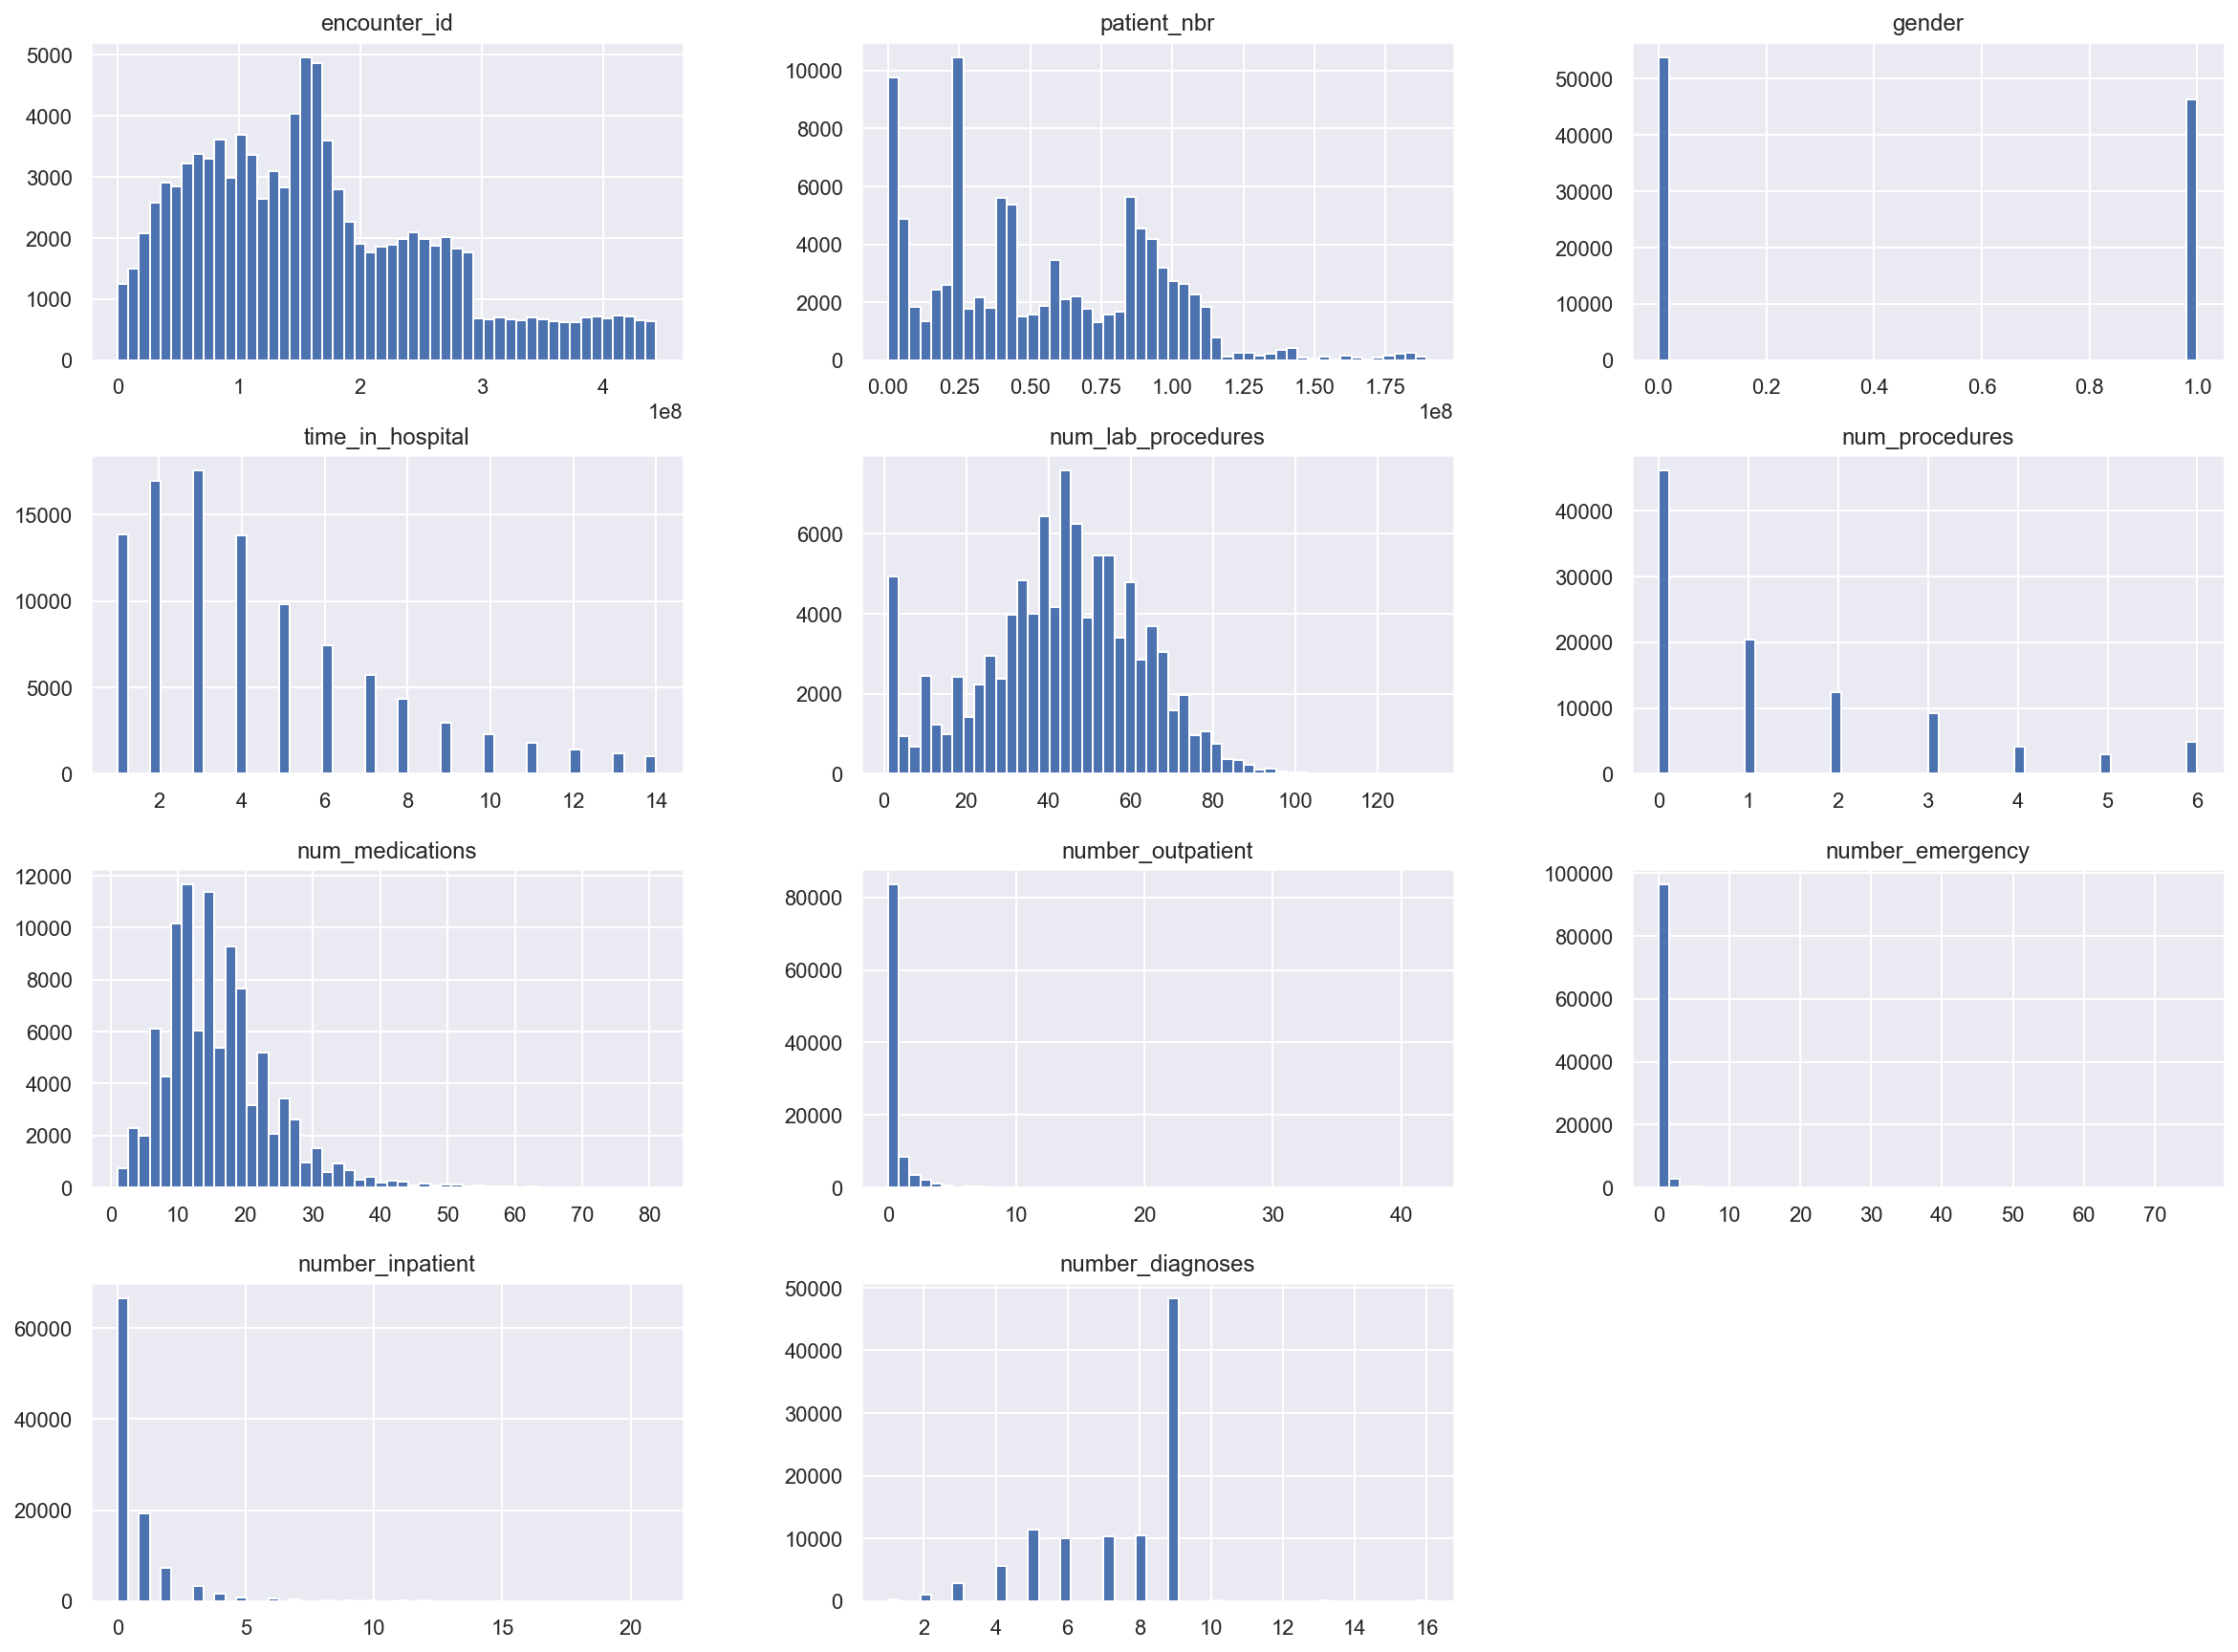

In [91]:

#Plotting the numerical variables in our dataset,
%matplotlib inline
data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#Obtenemos la lista de variables objetivo

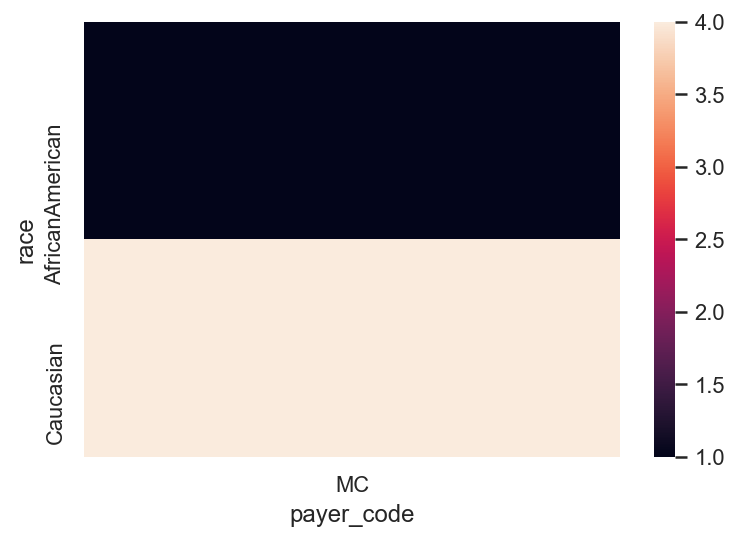

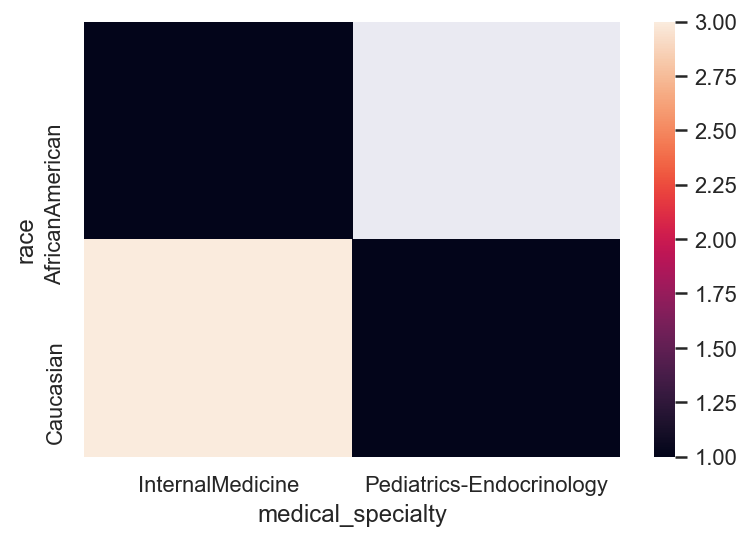

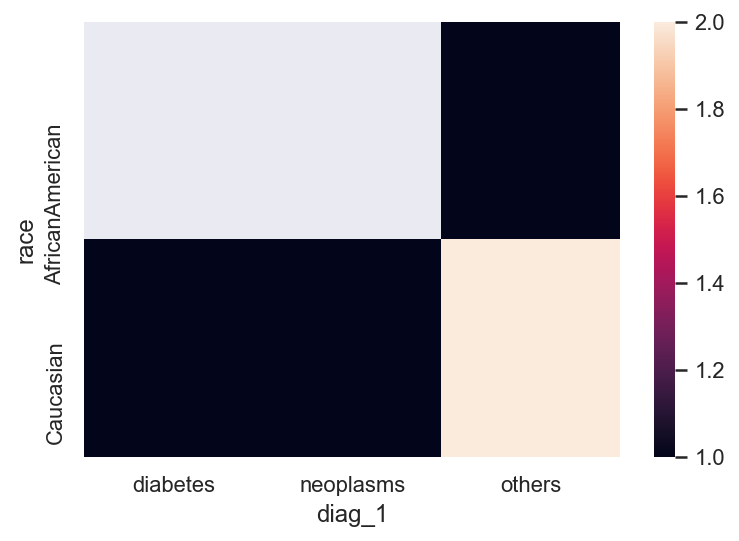

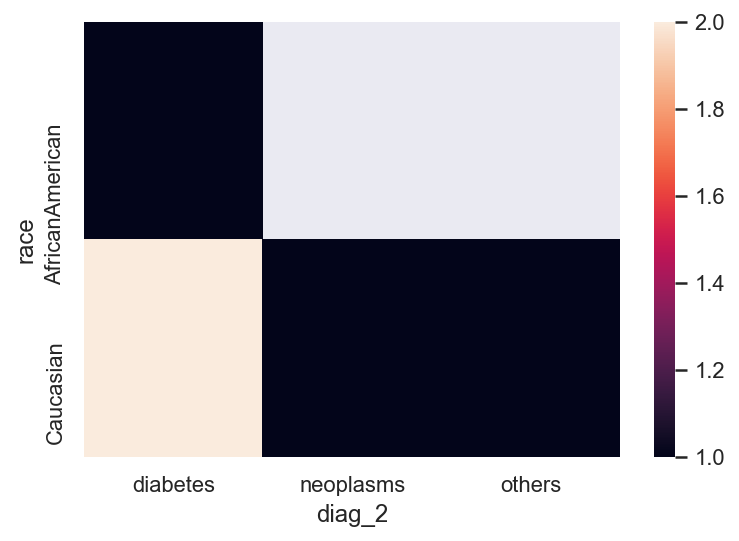

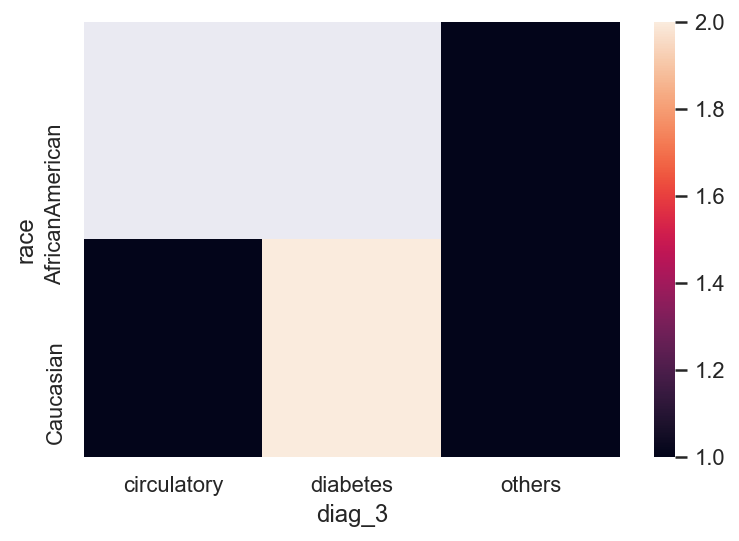

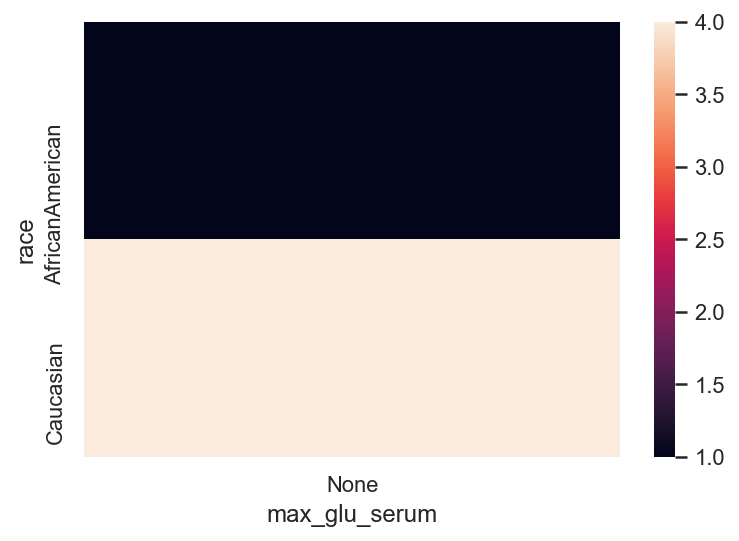

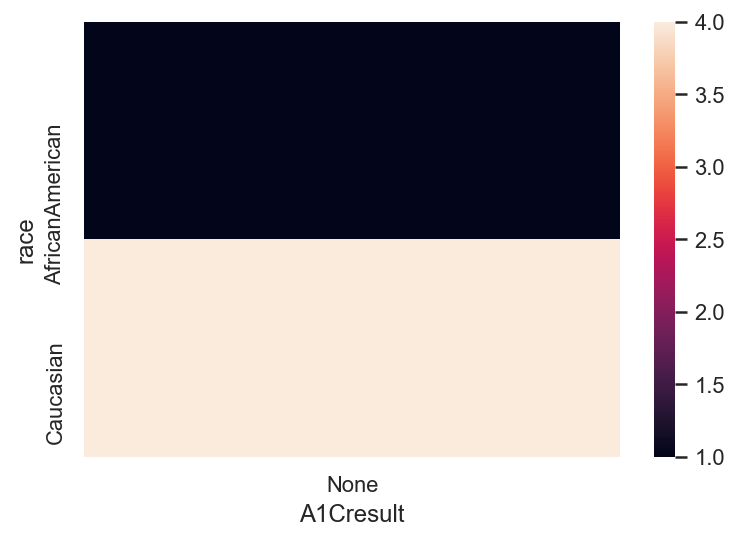

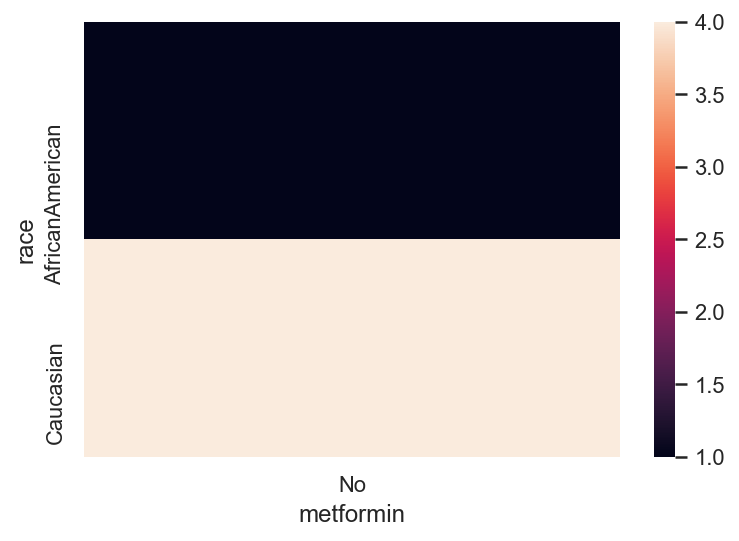

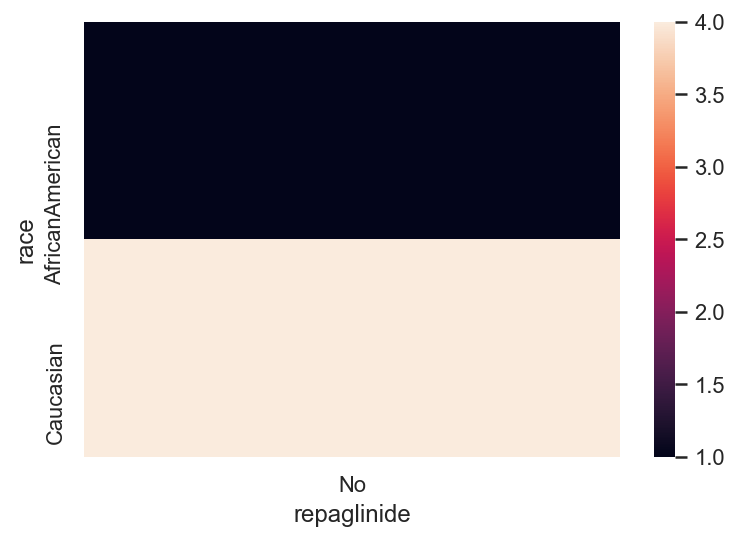

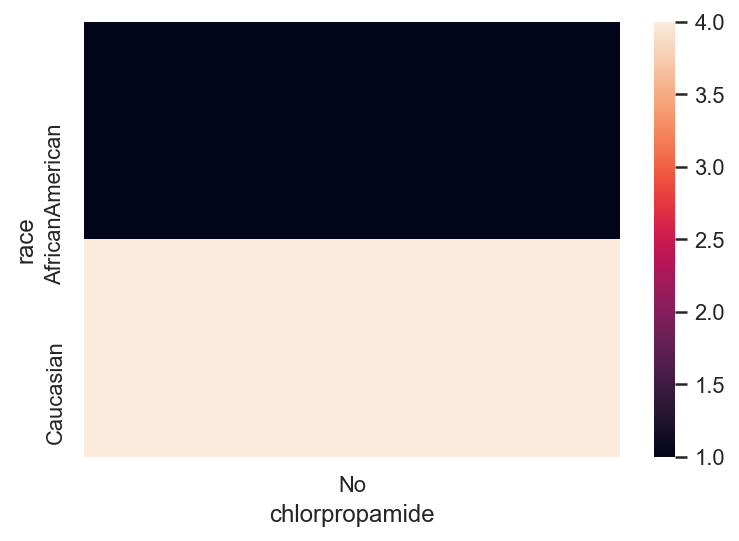

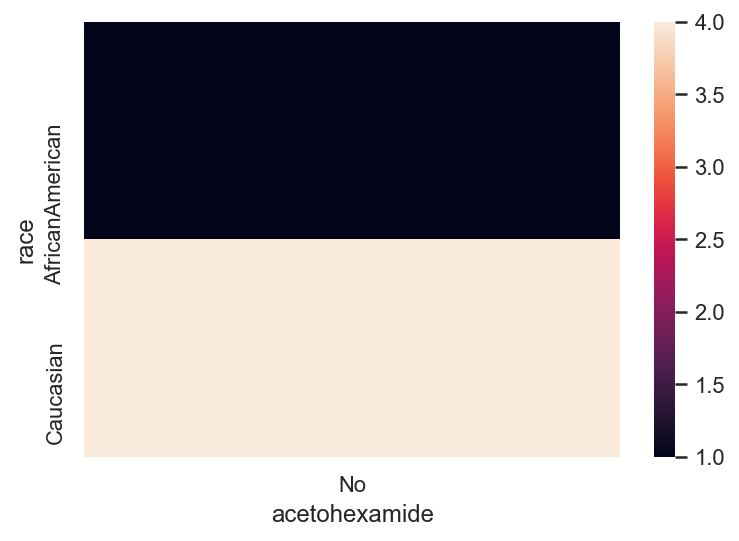

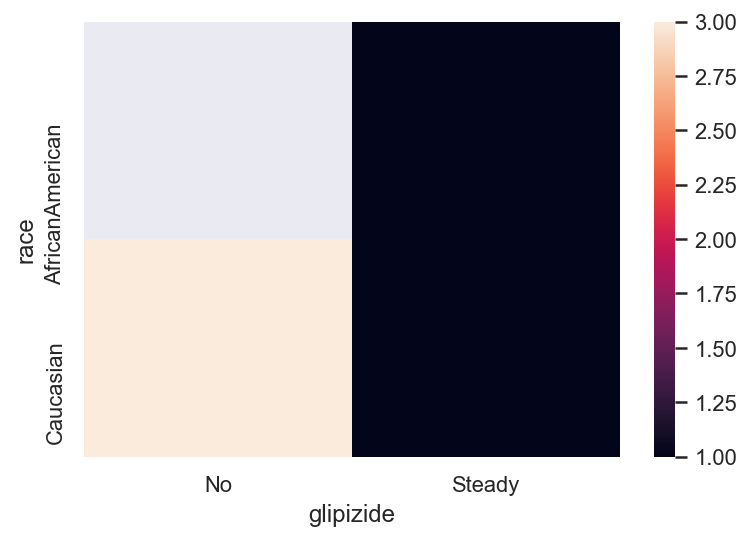

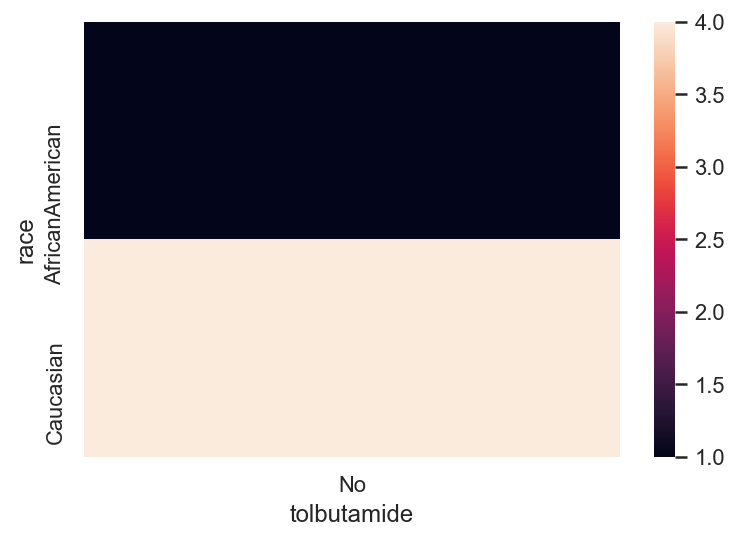

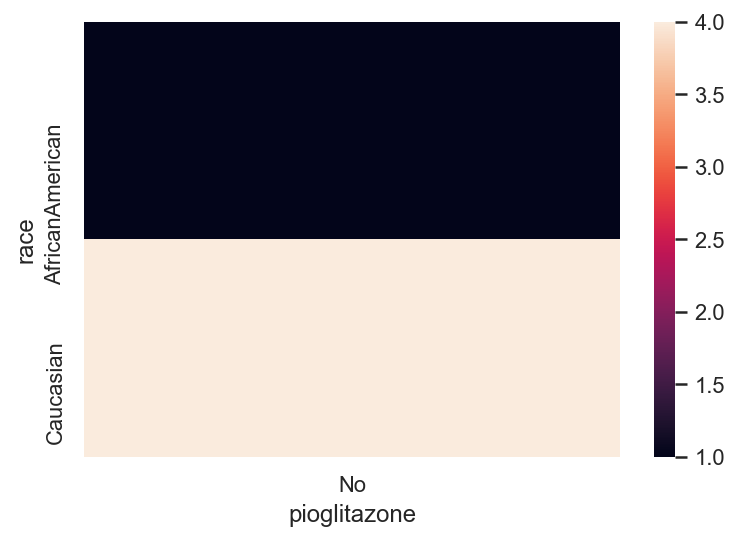

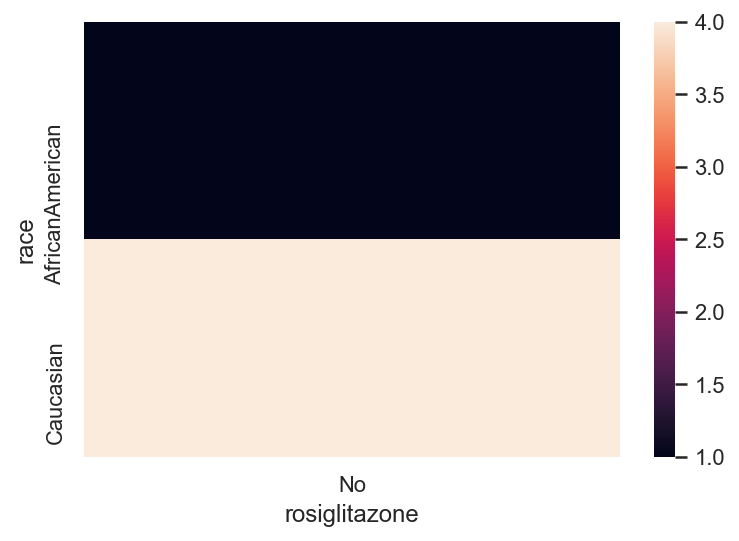

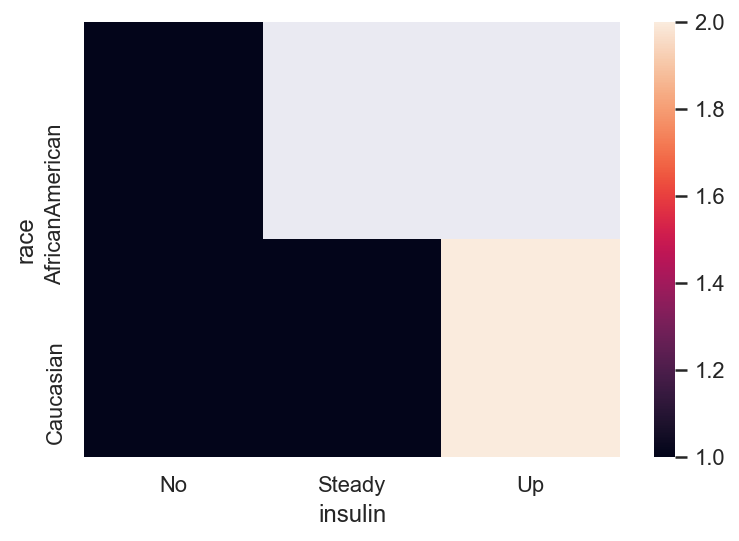

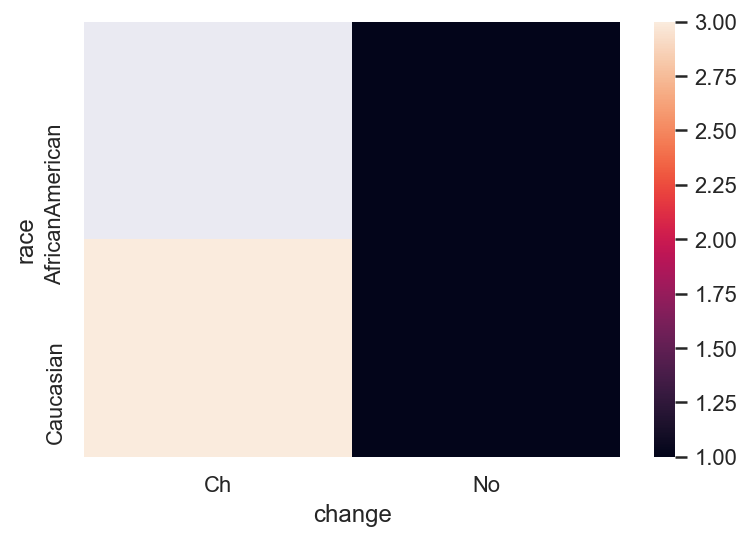

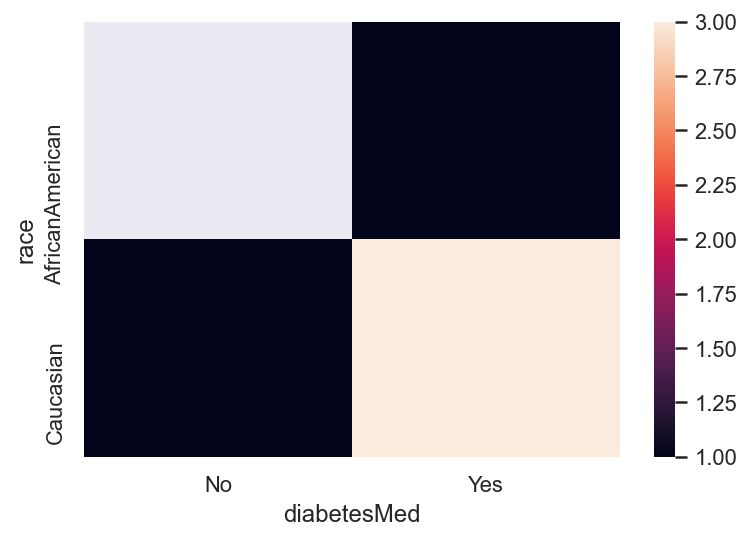

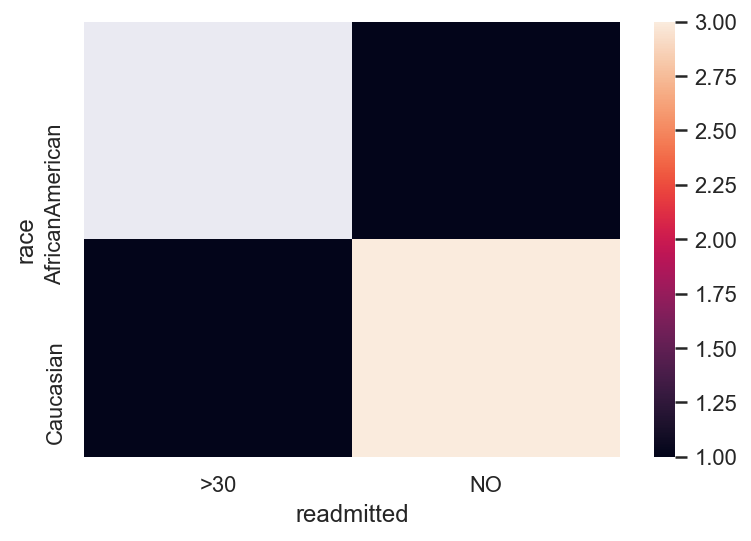

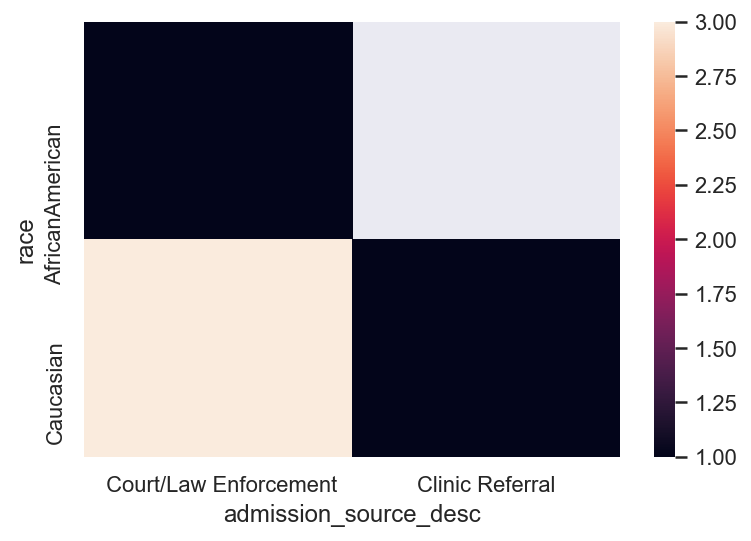

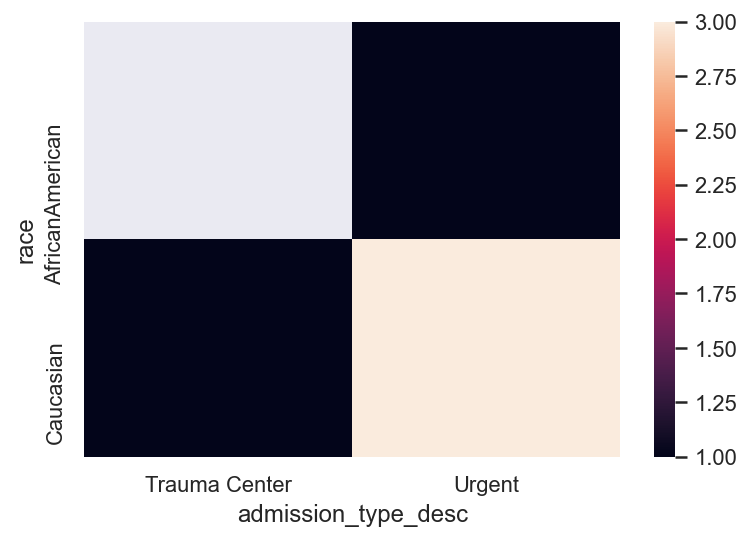

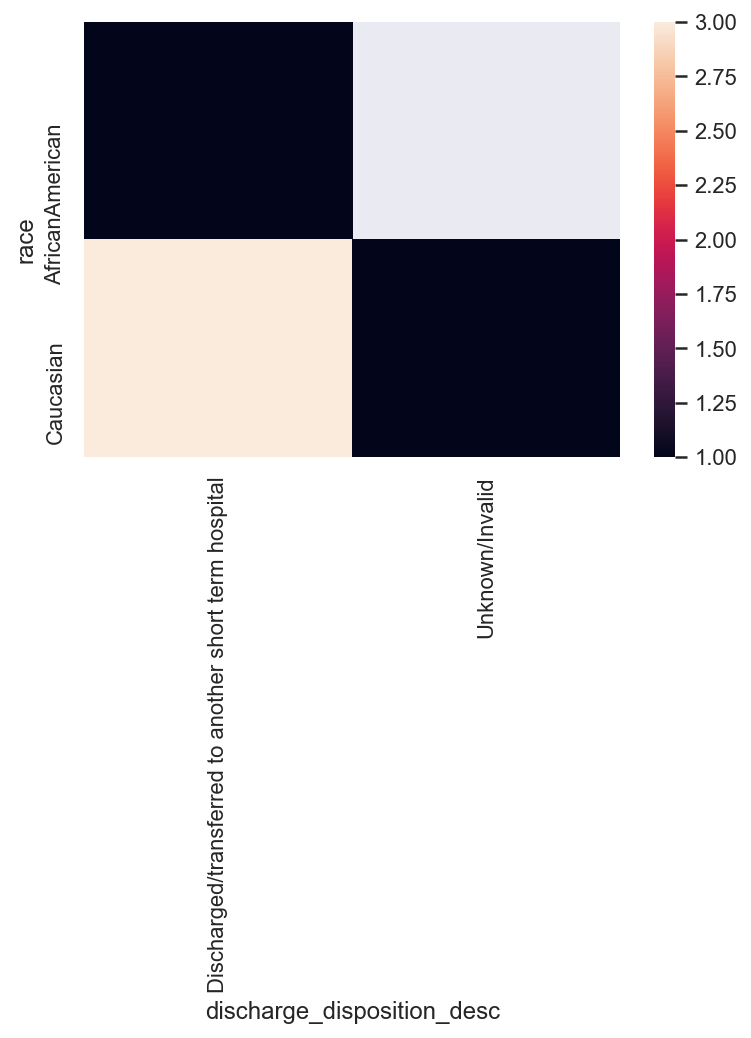

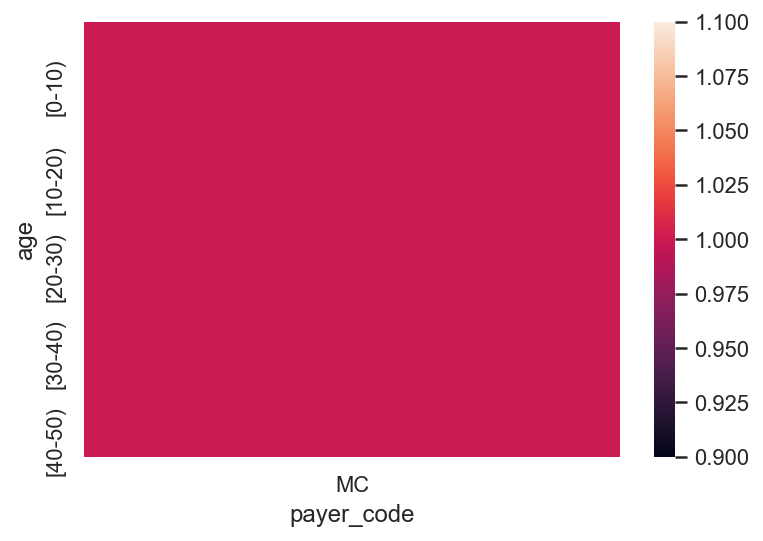

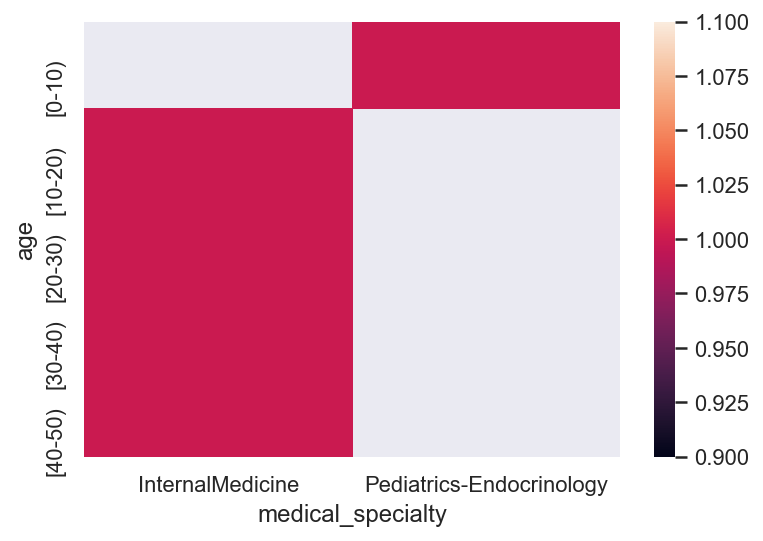

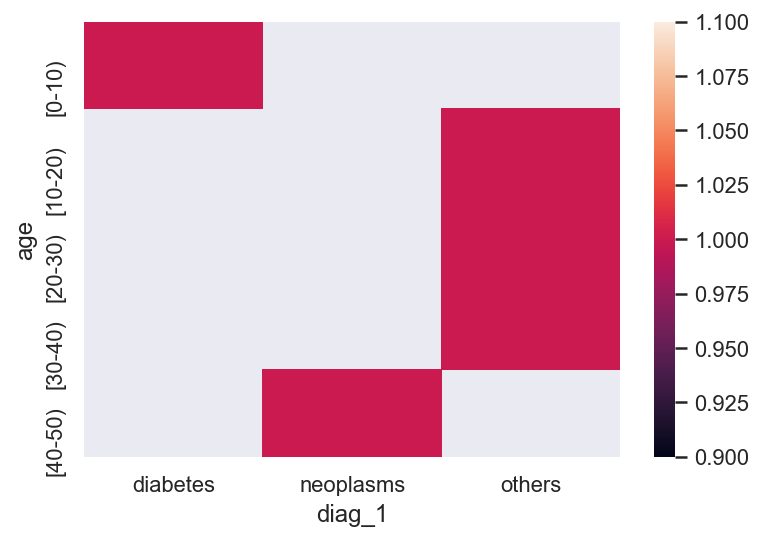

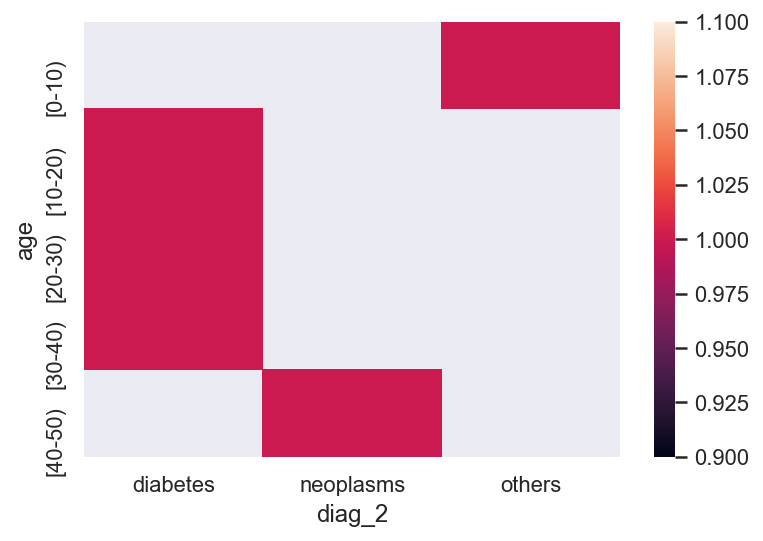

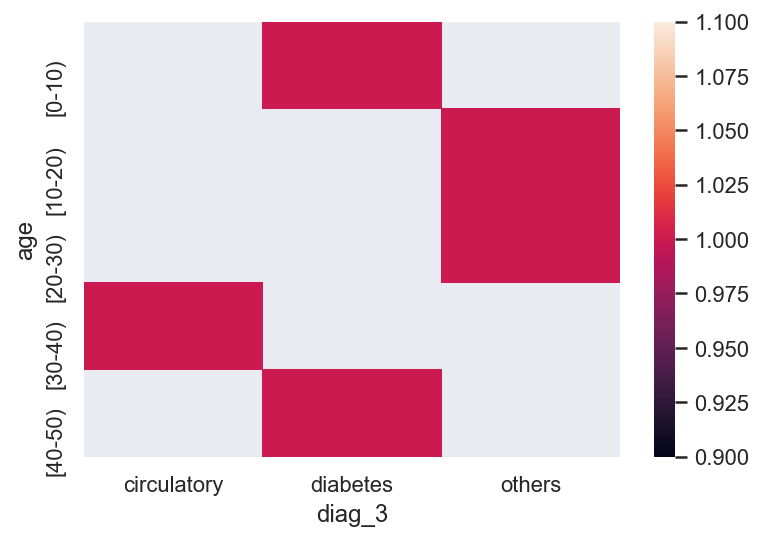

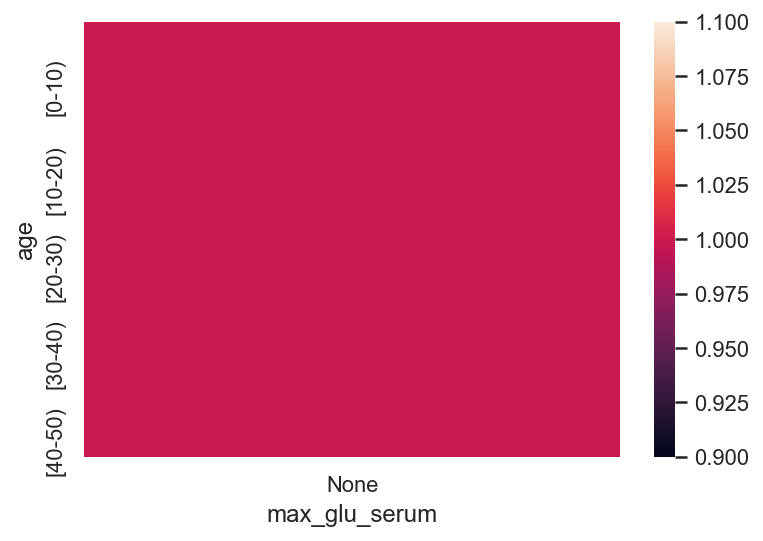

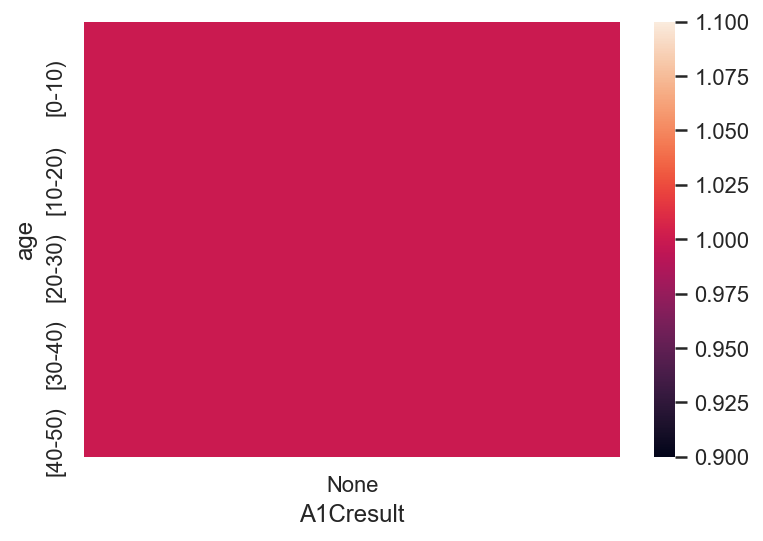

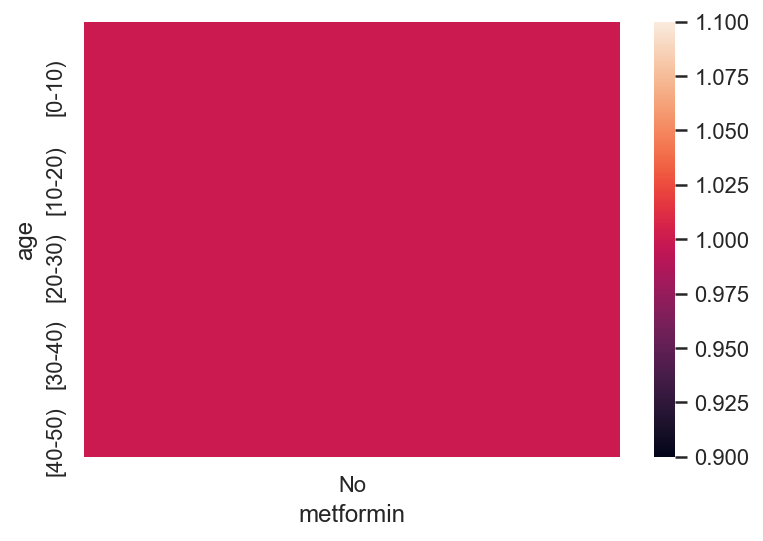

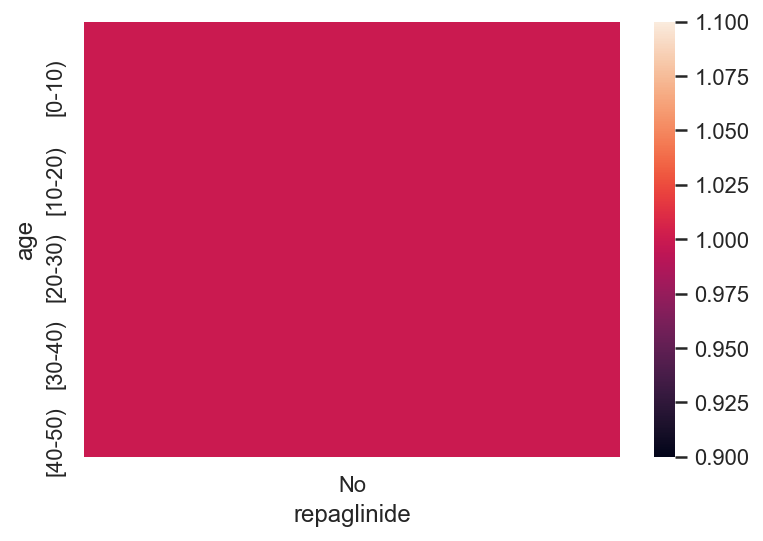

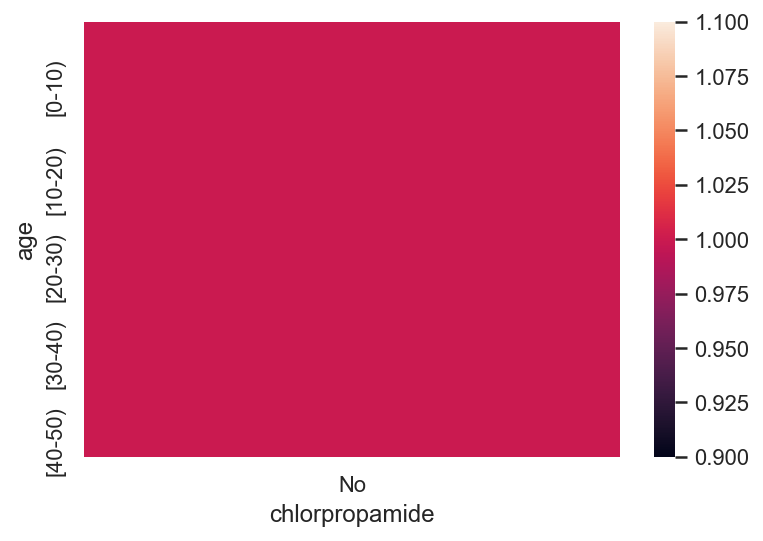

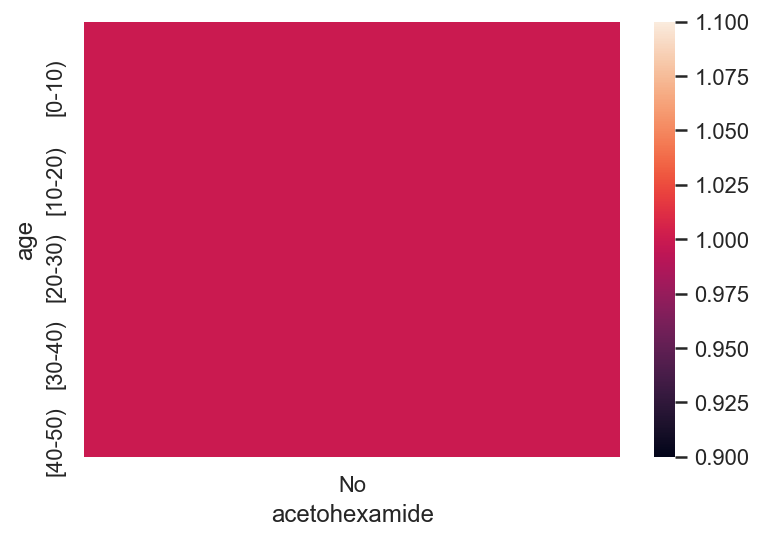

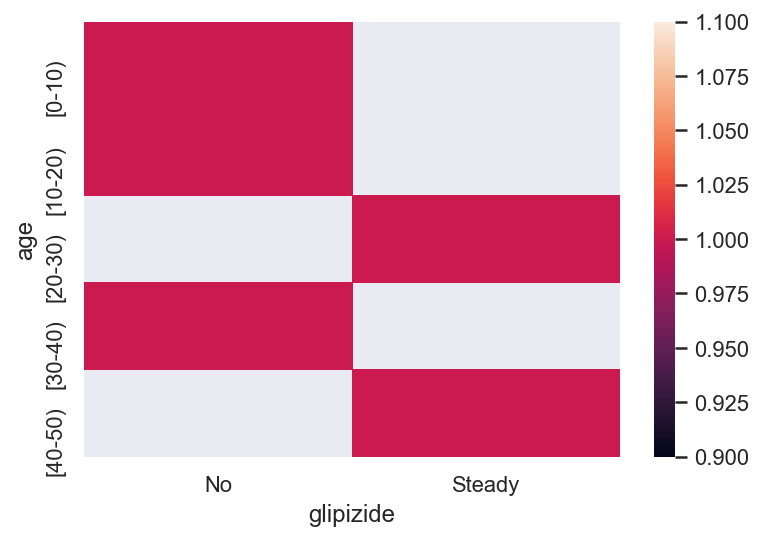

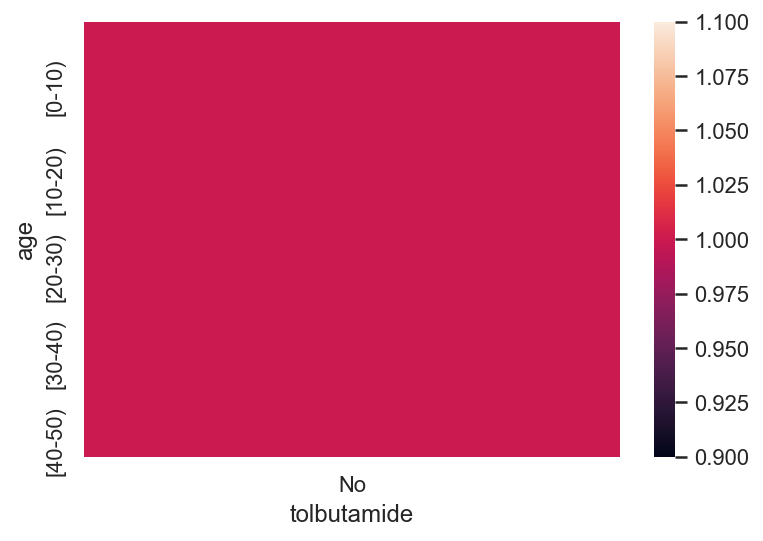

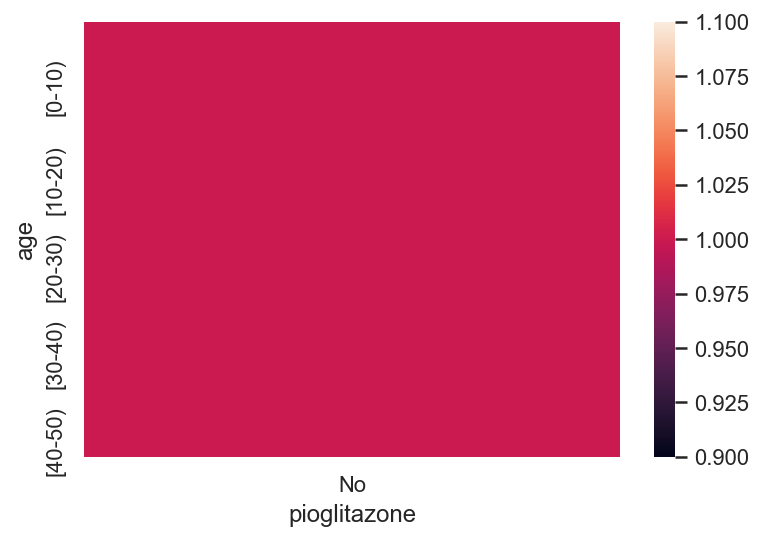

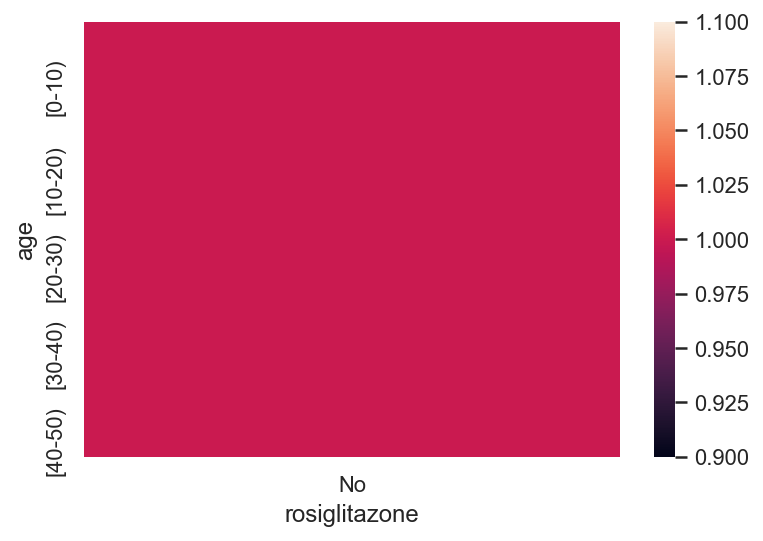

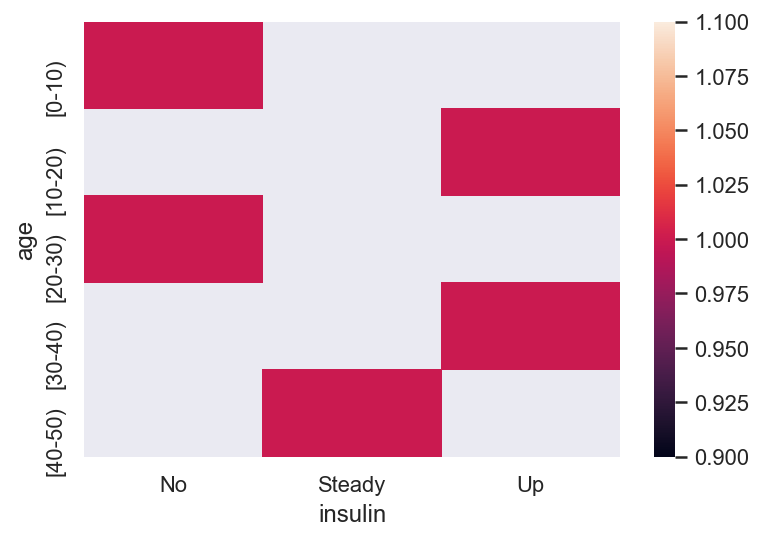

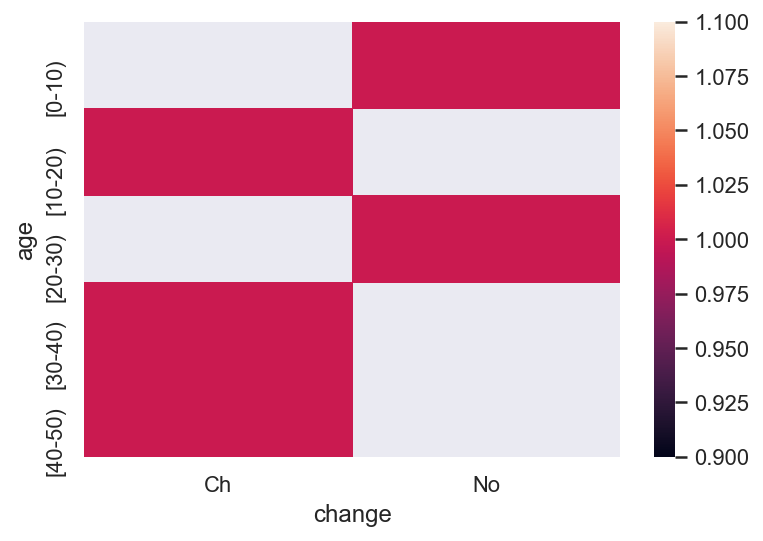

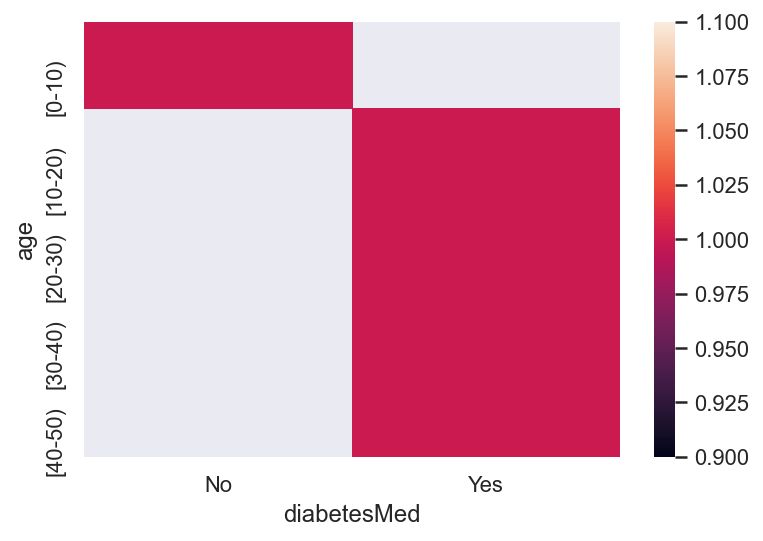

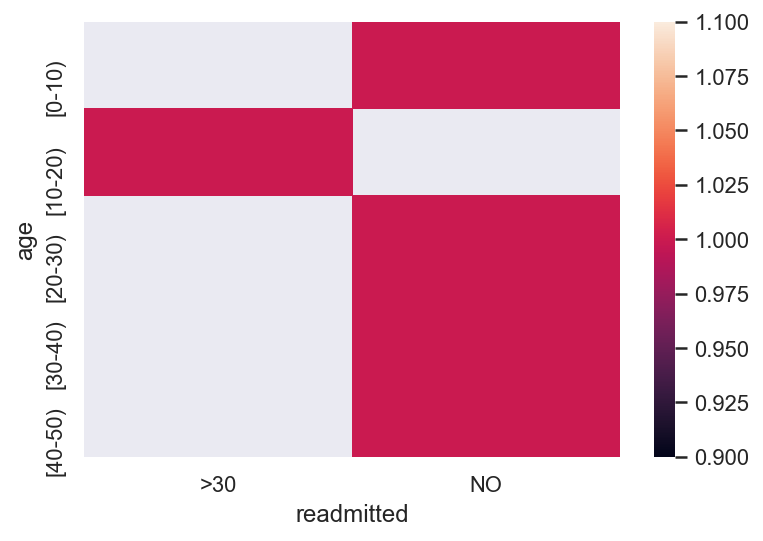

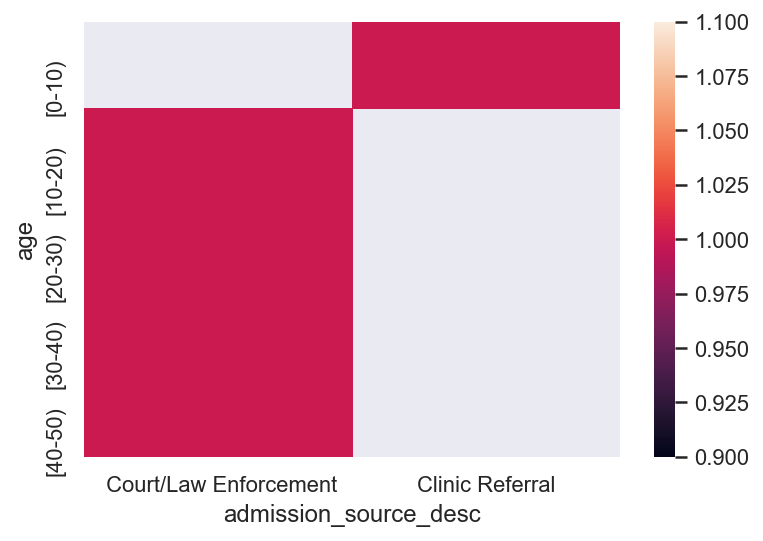

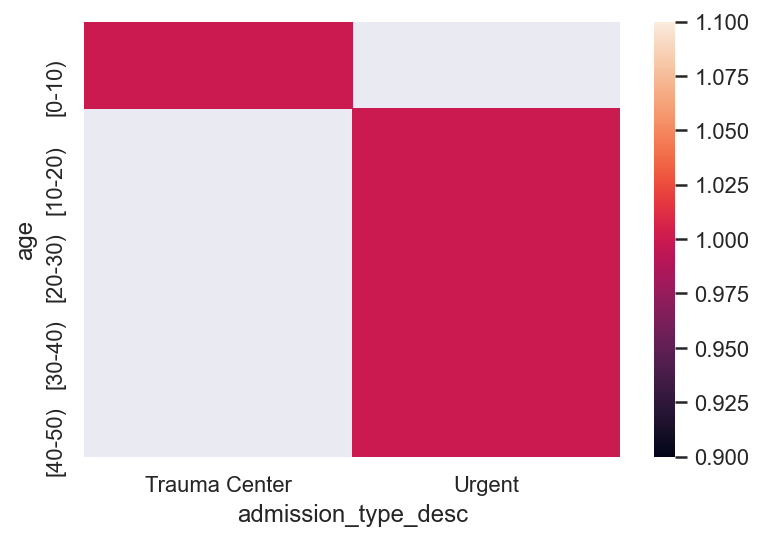

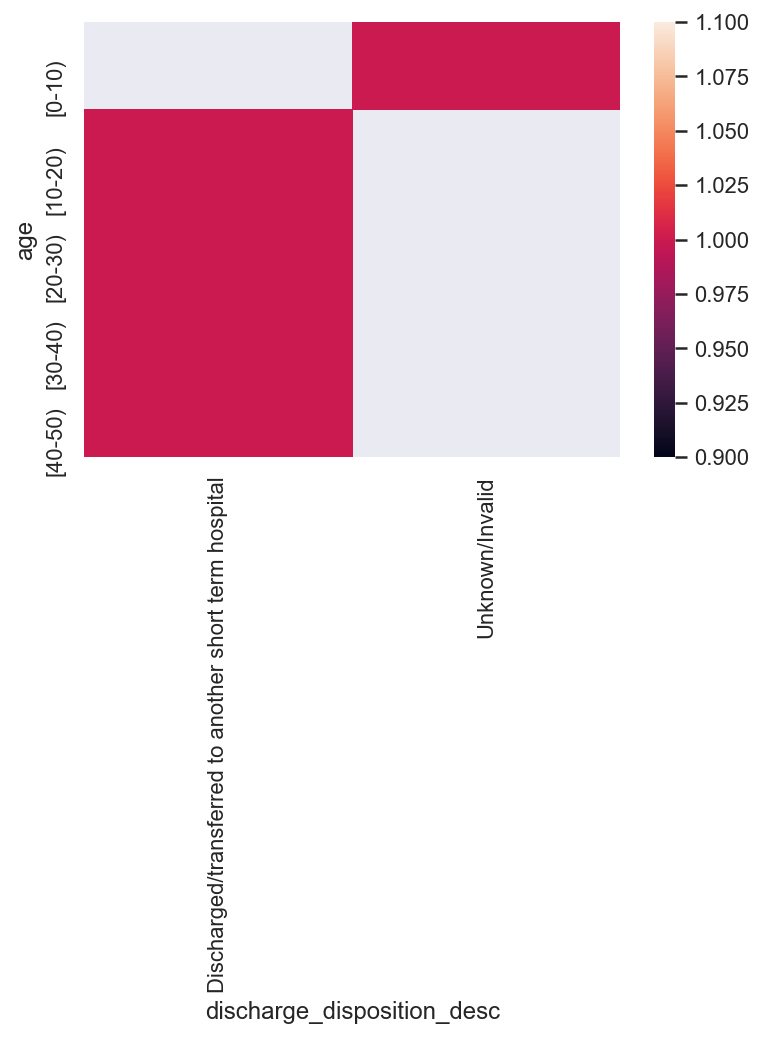

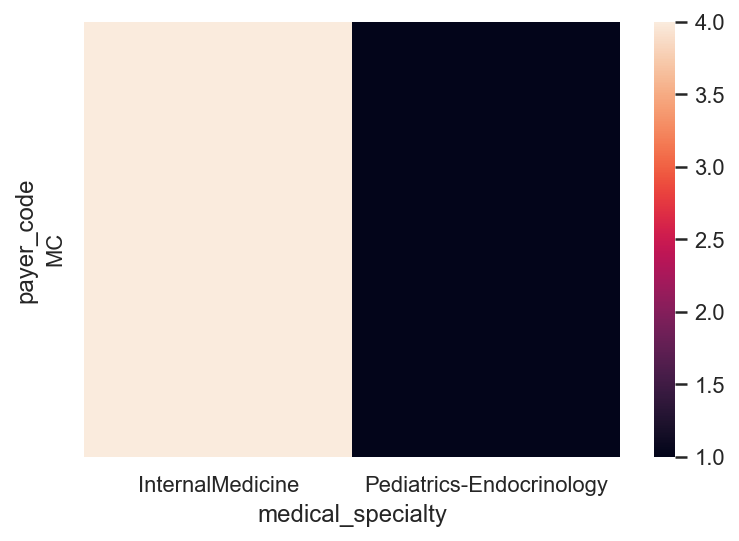

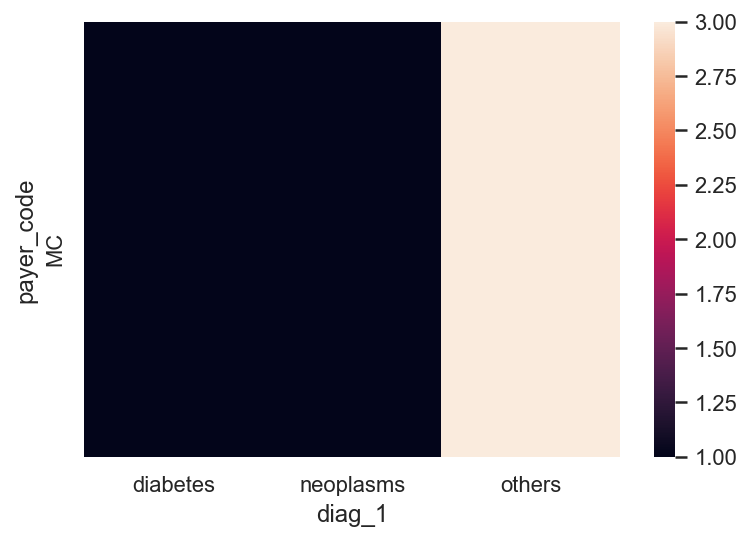

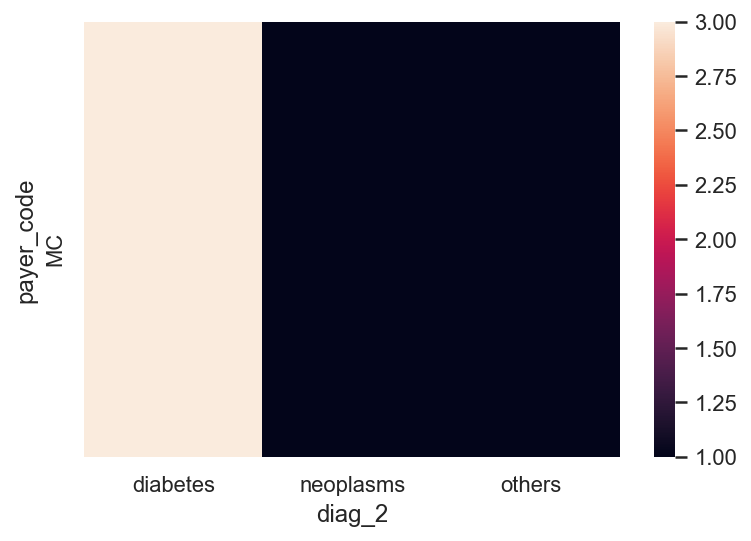

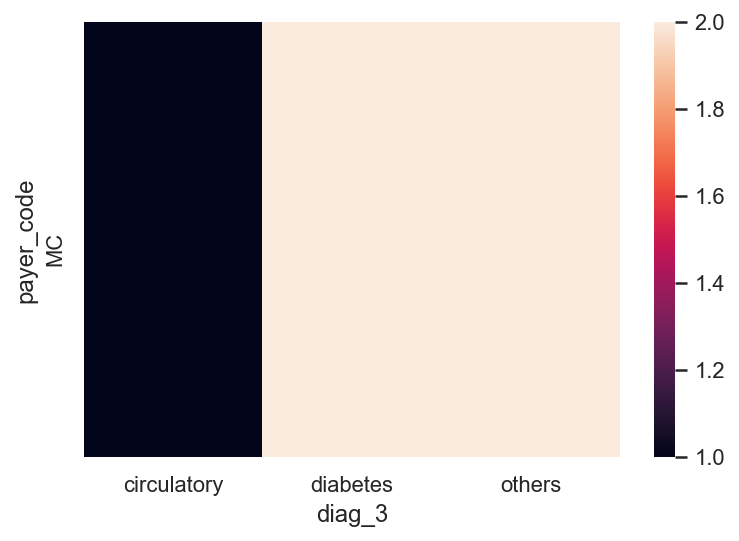

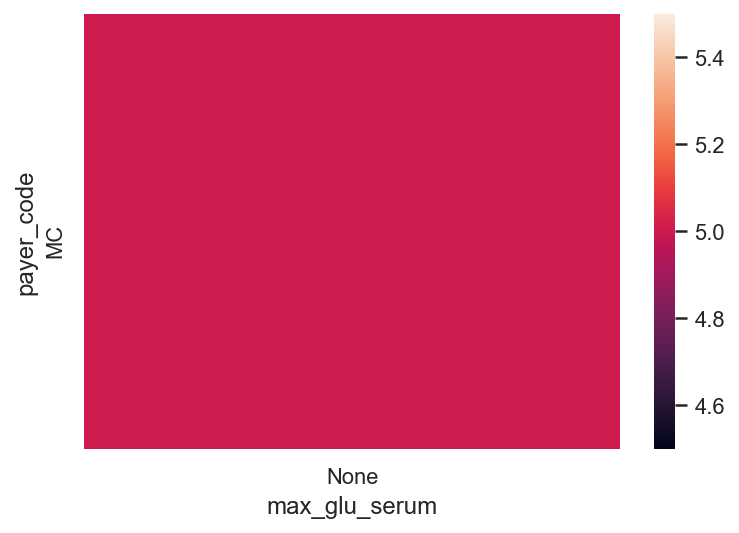

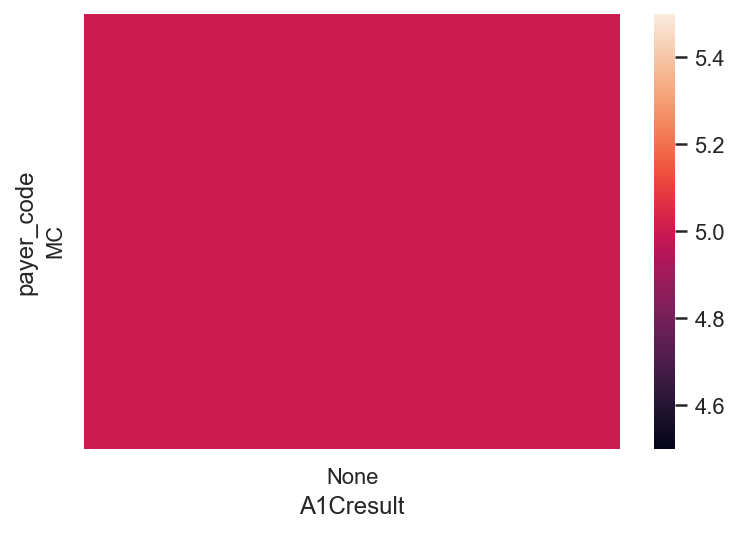

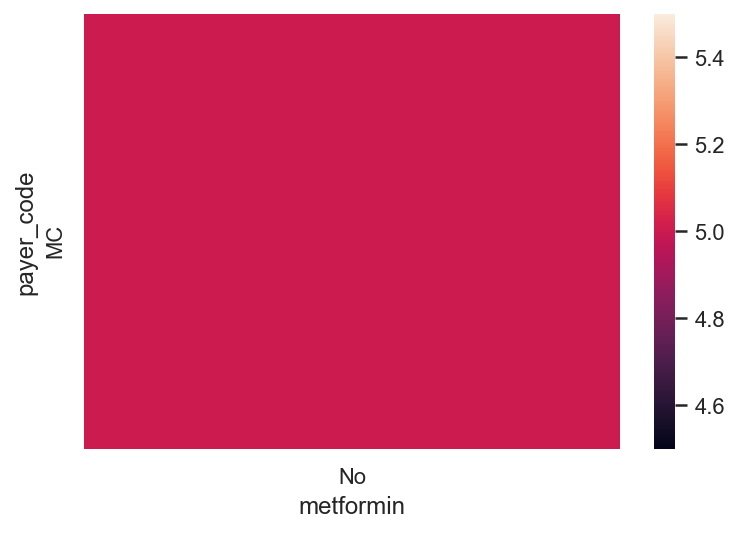

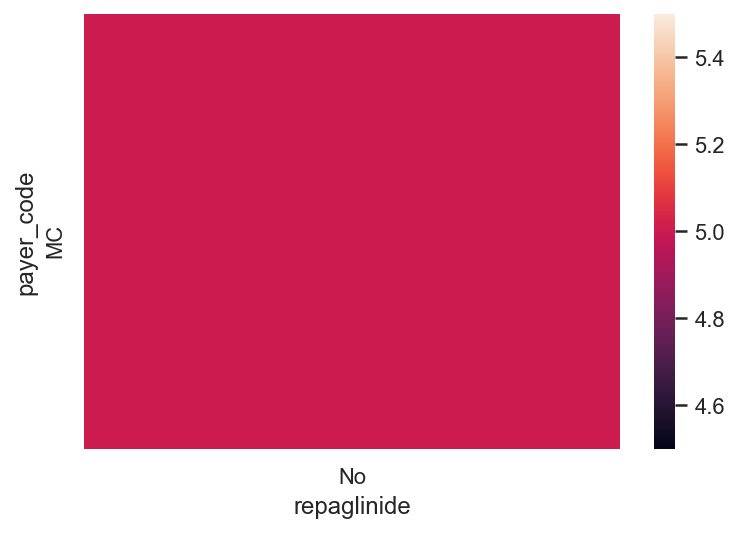

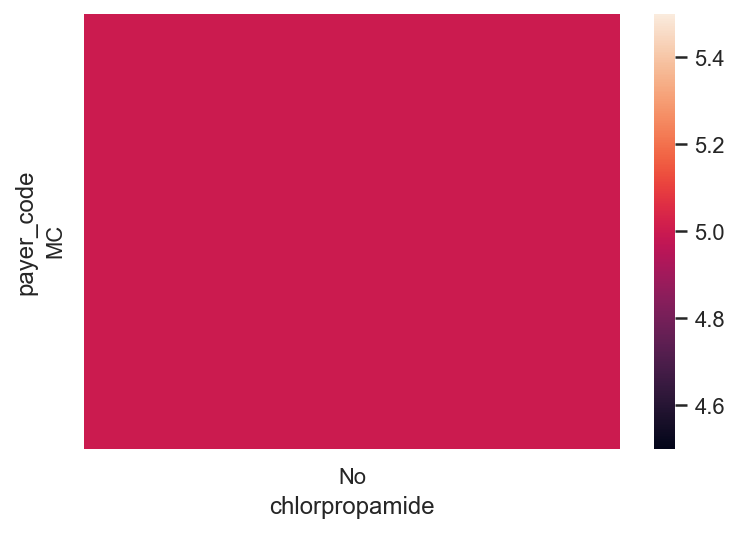

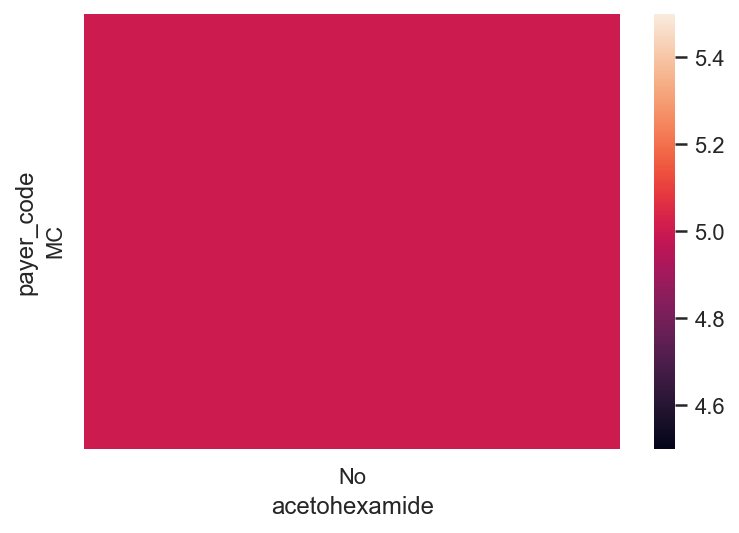

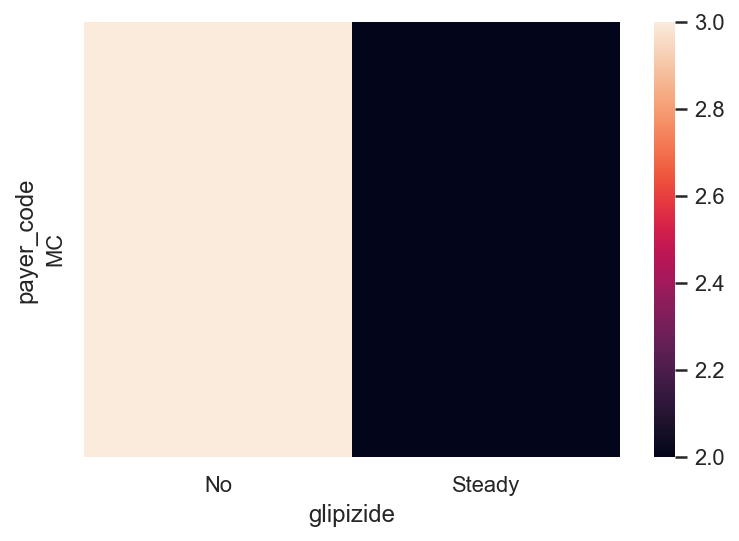

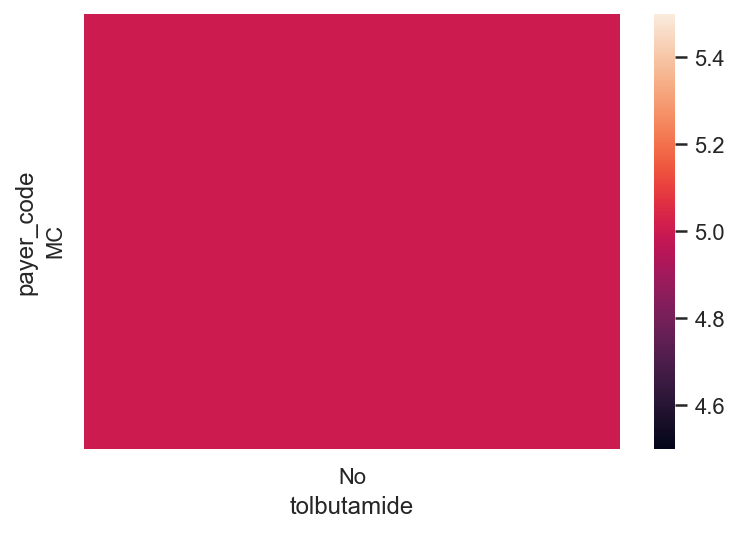

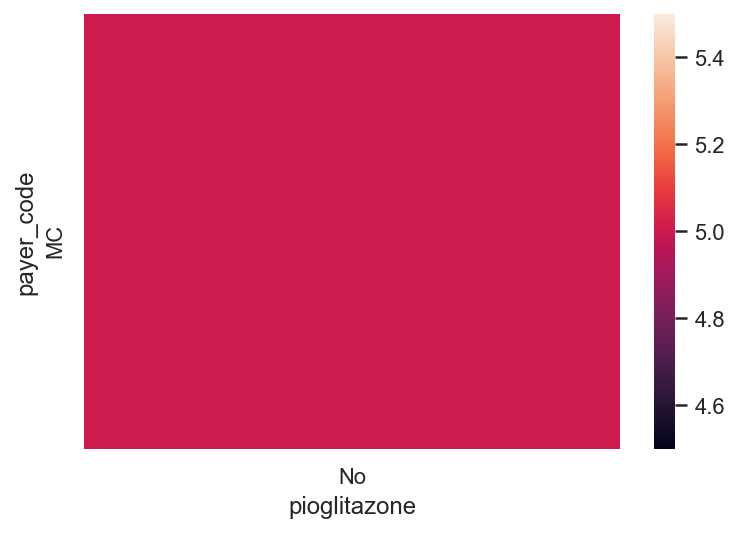

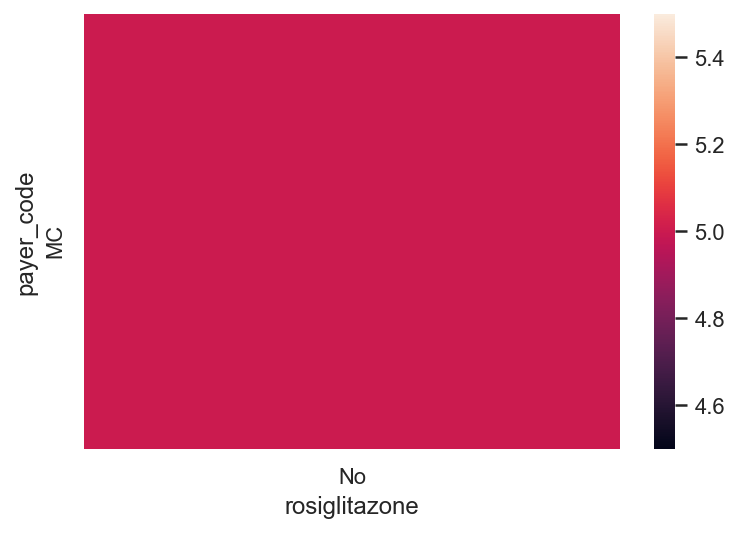

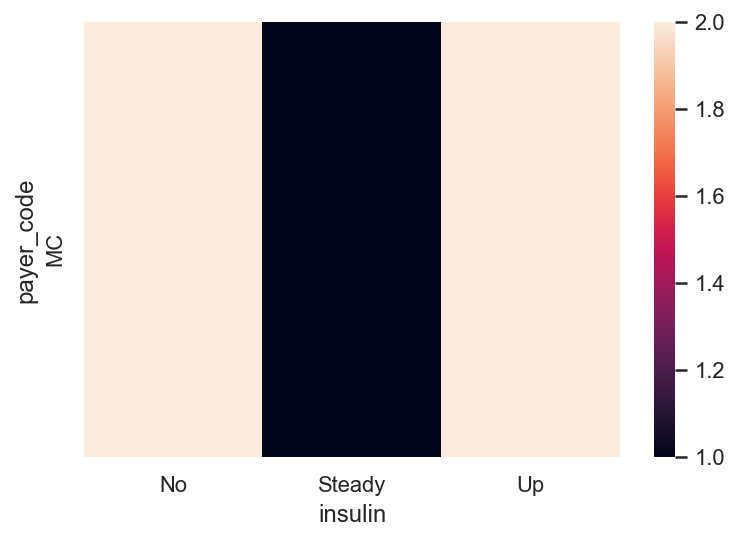

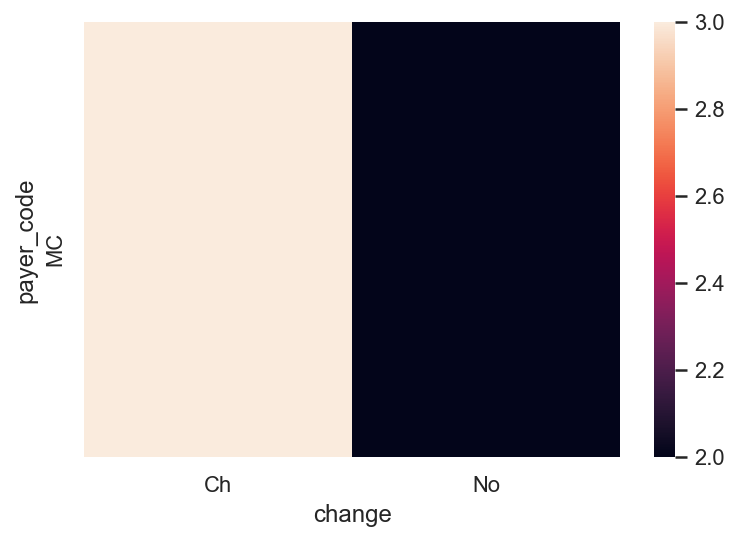

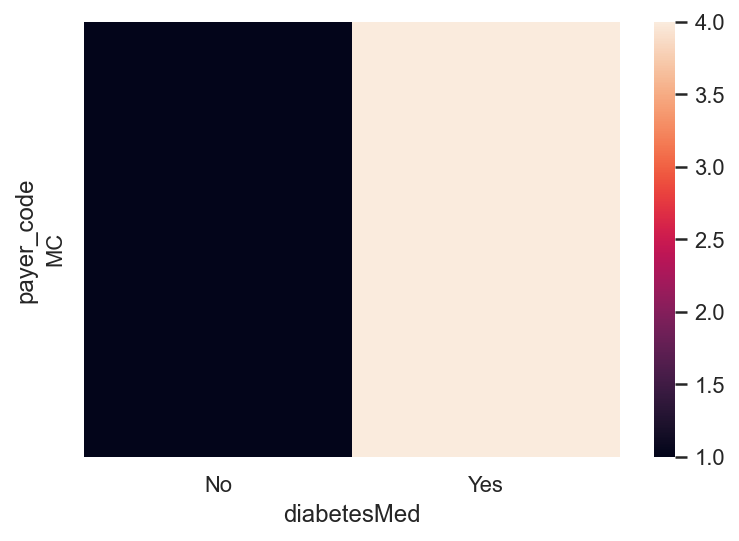

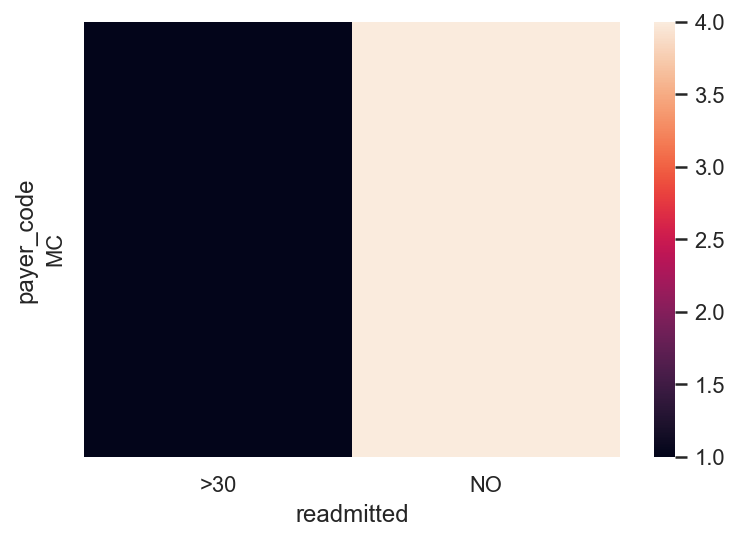

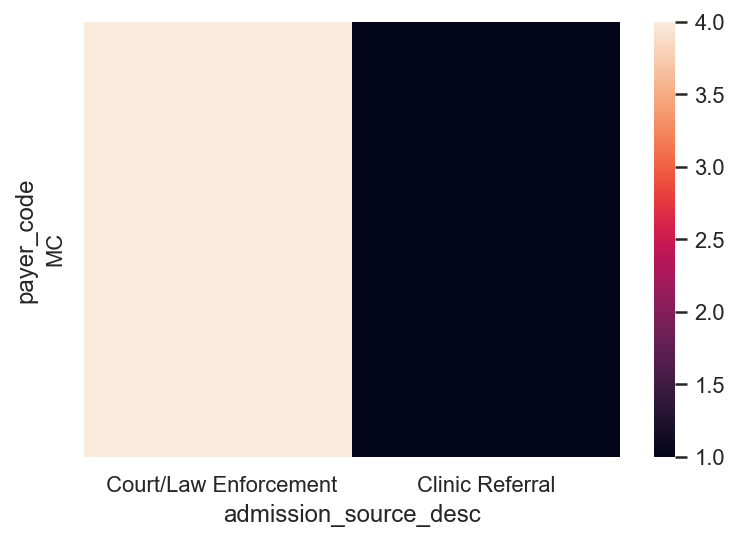

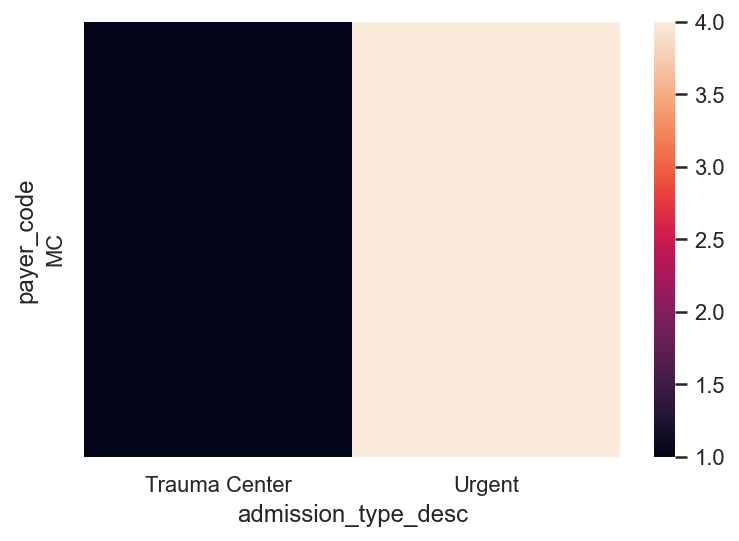

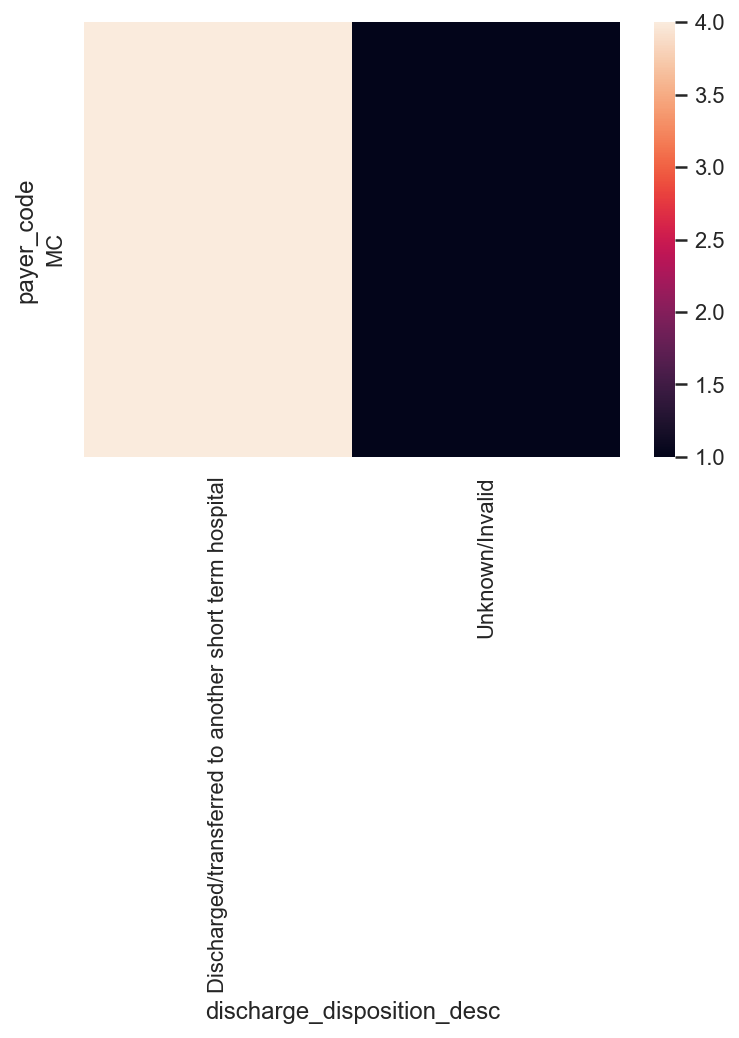

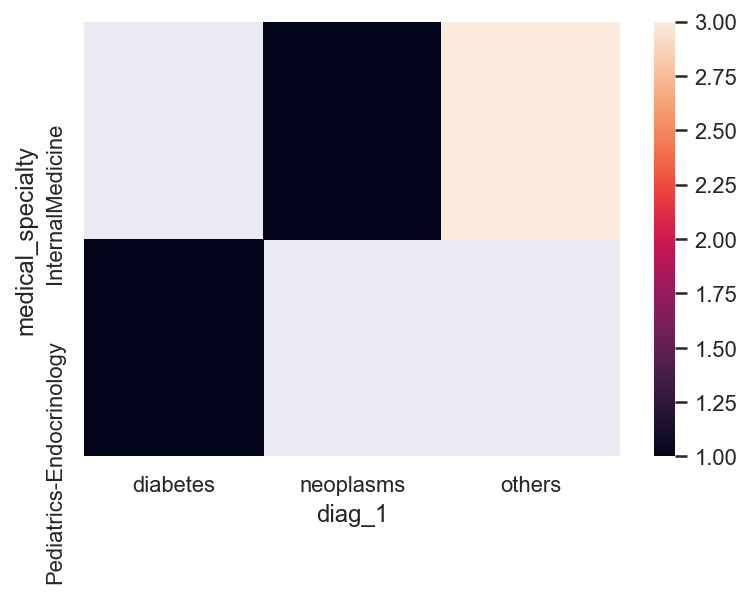

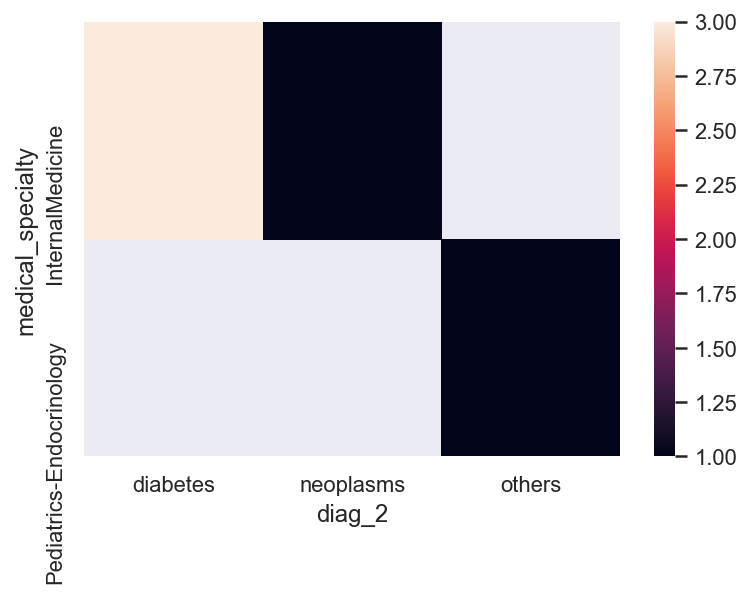

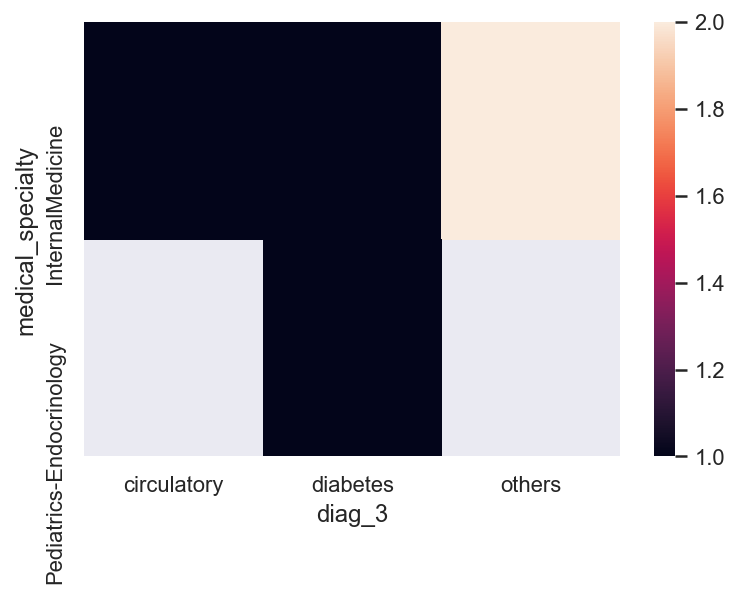

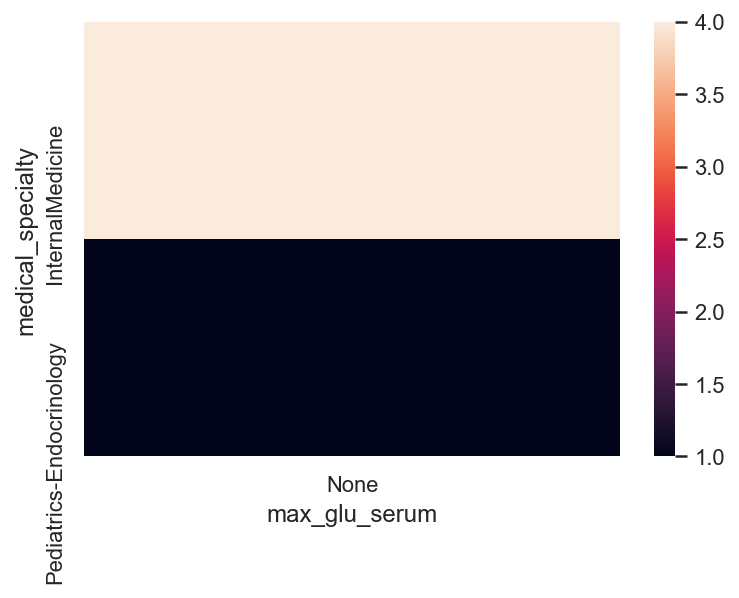

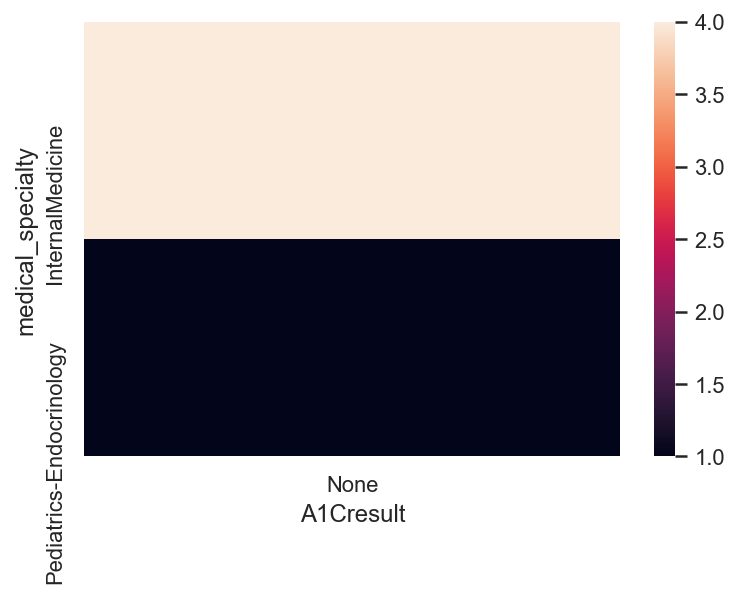

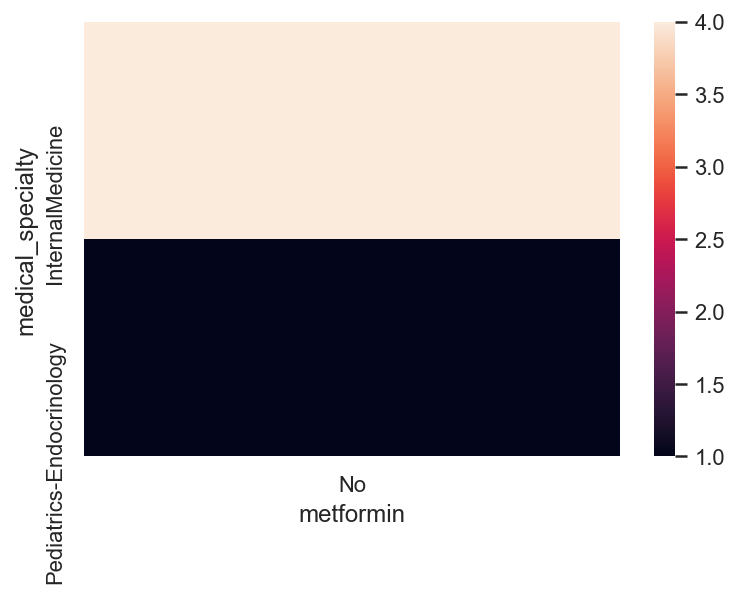

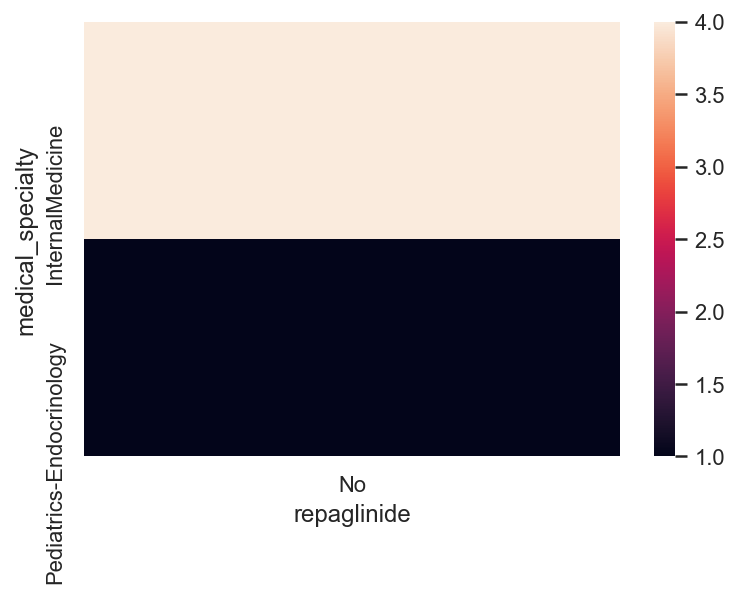

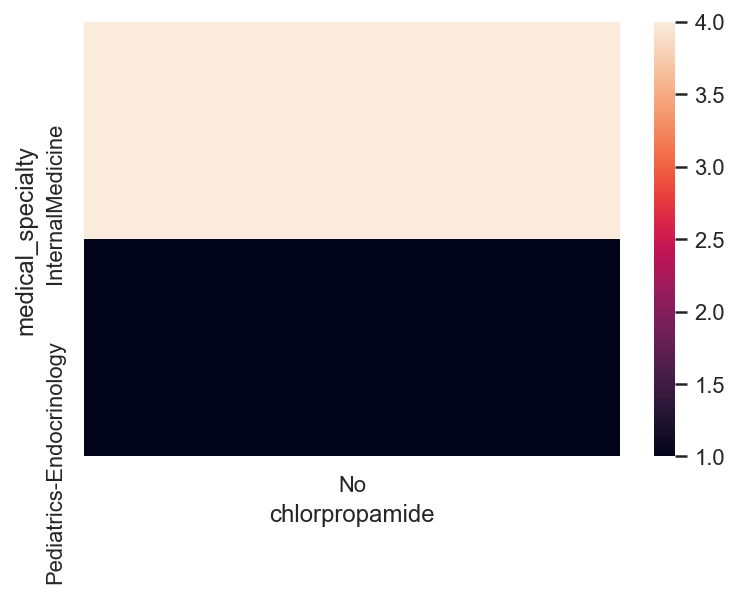

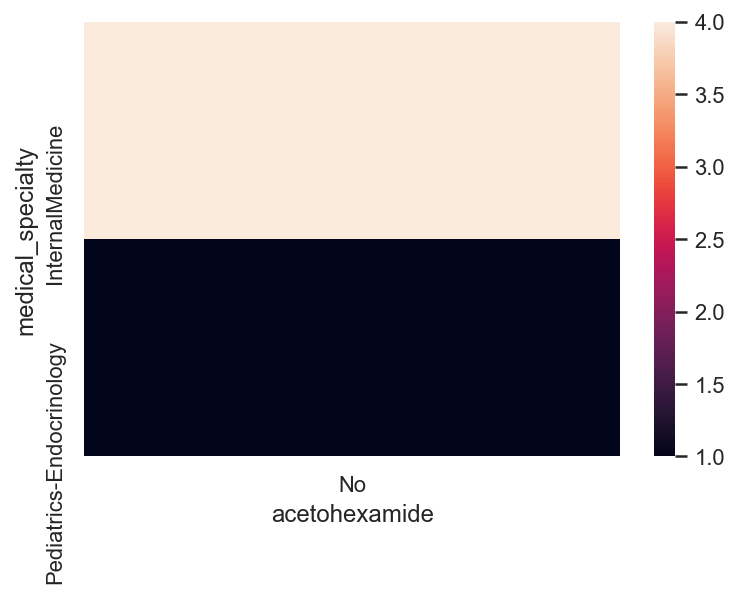

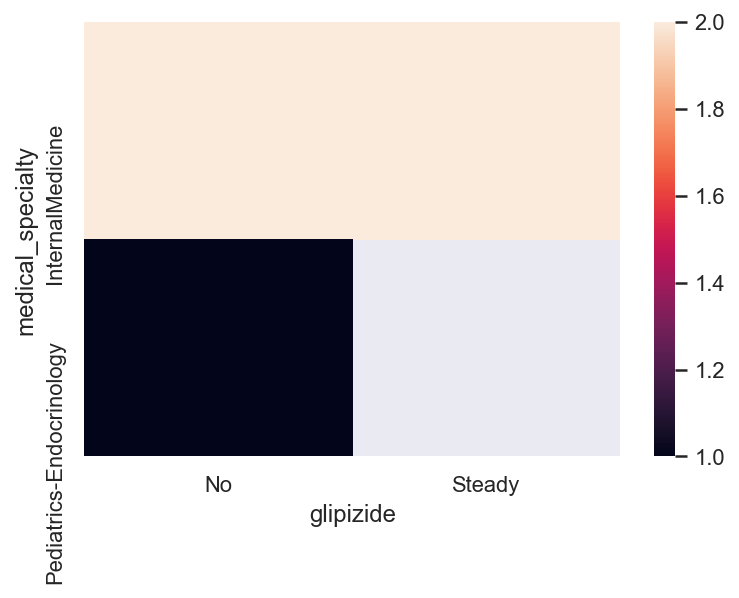

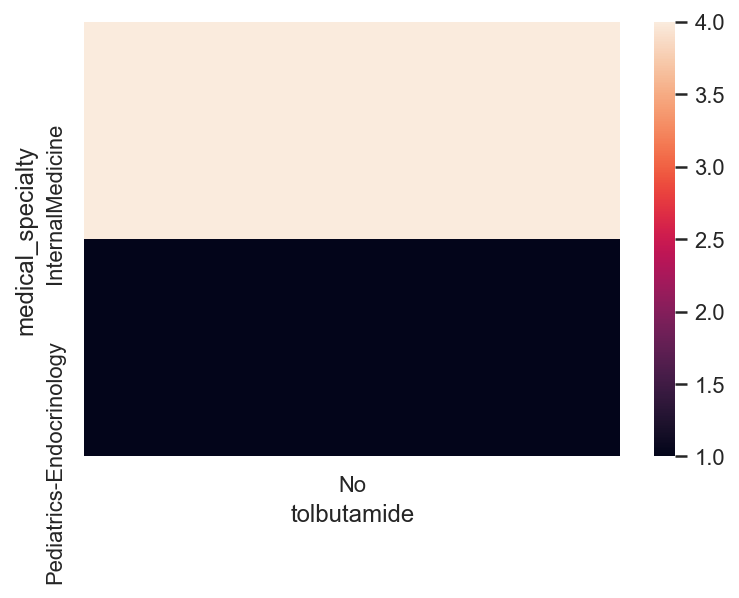

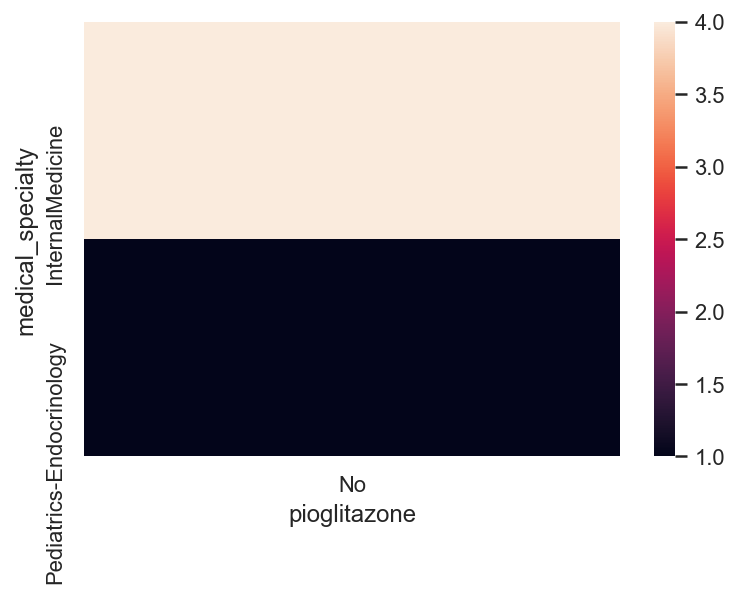

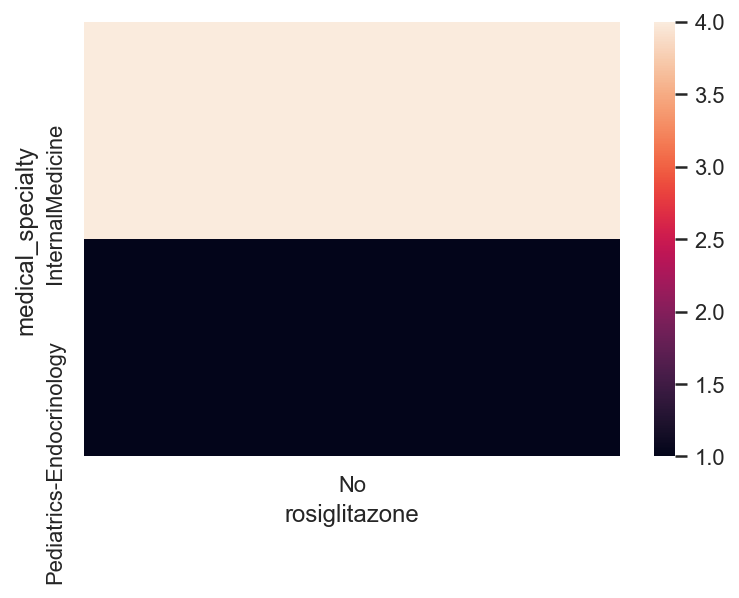

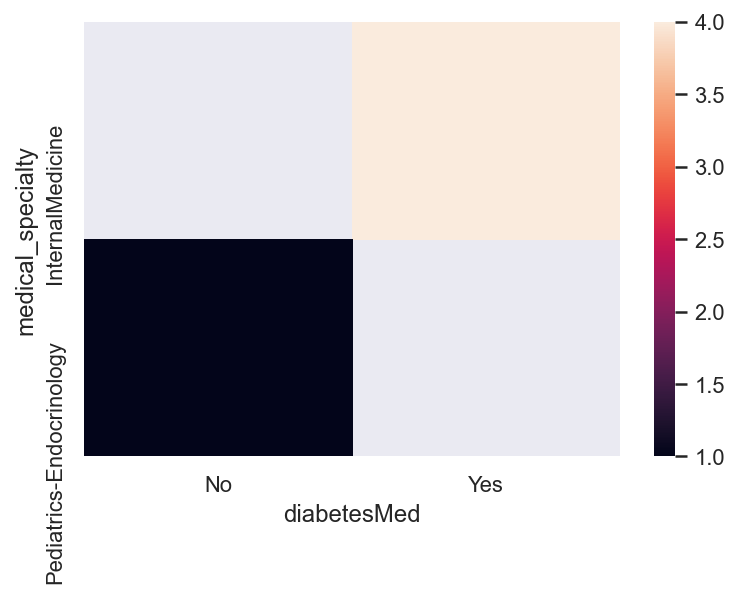

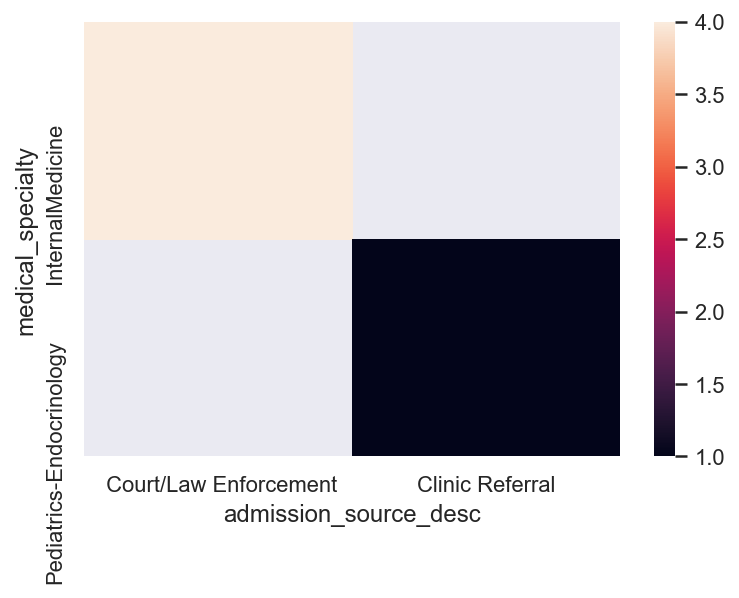

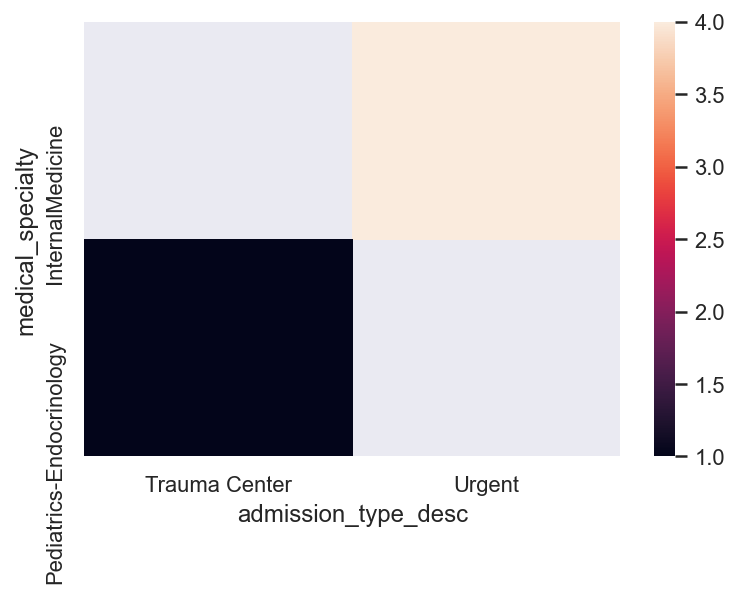

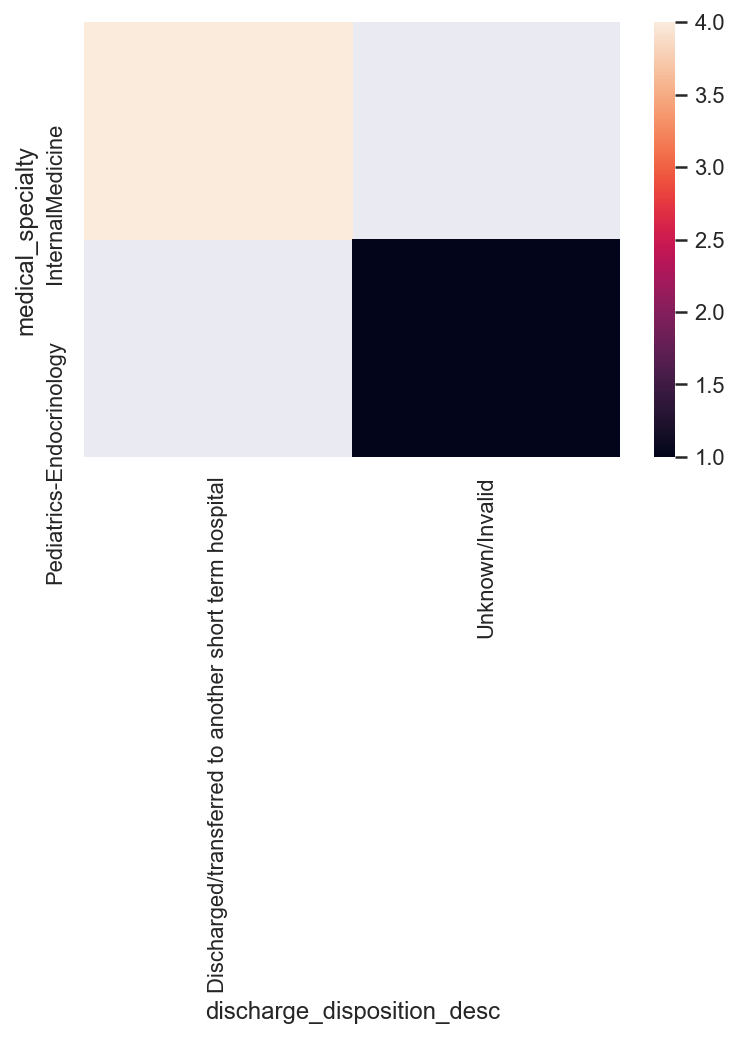

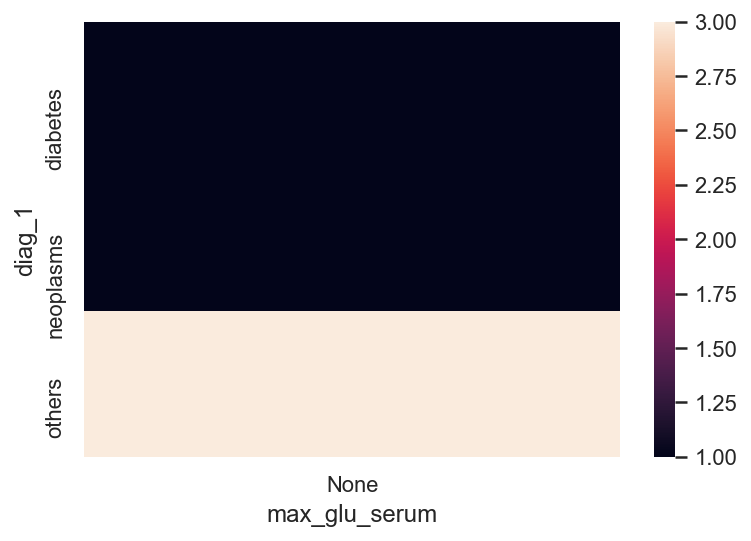

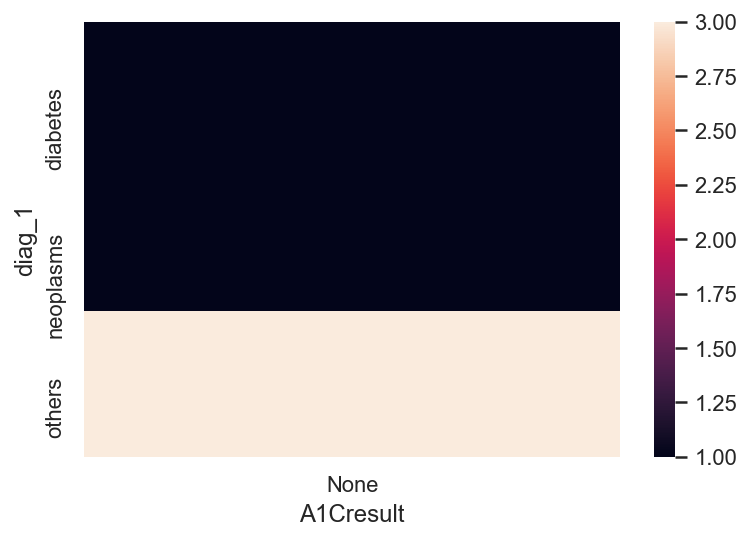

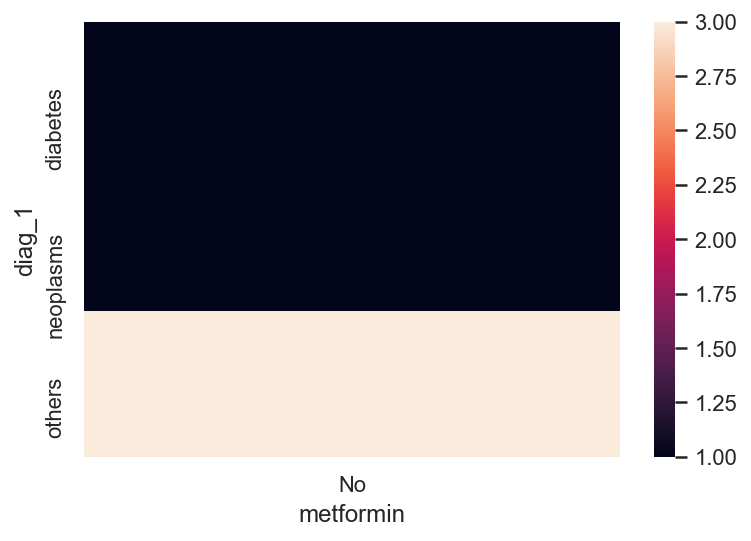

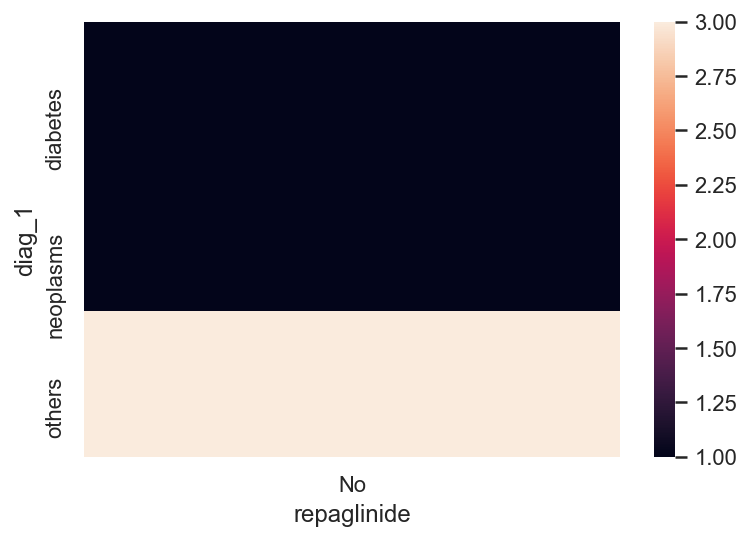

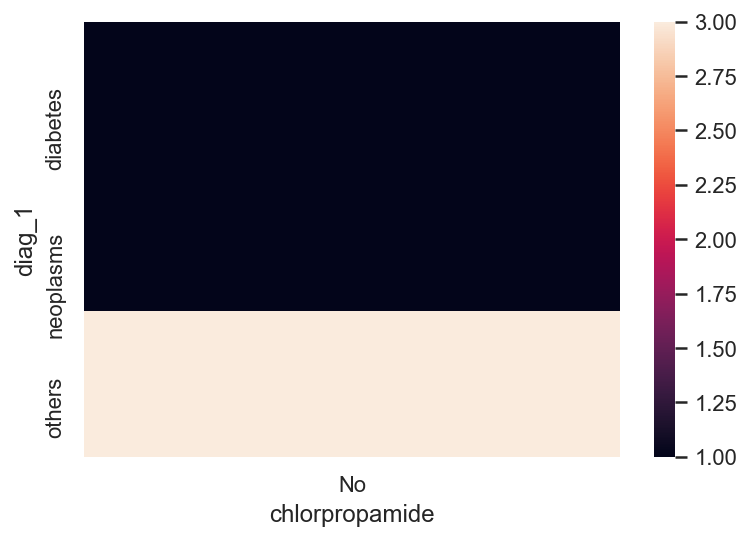

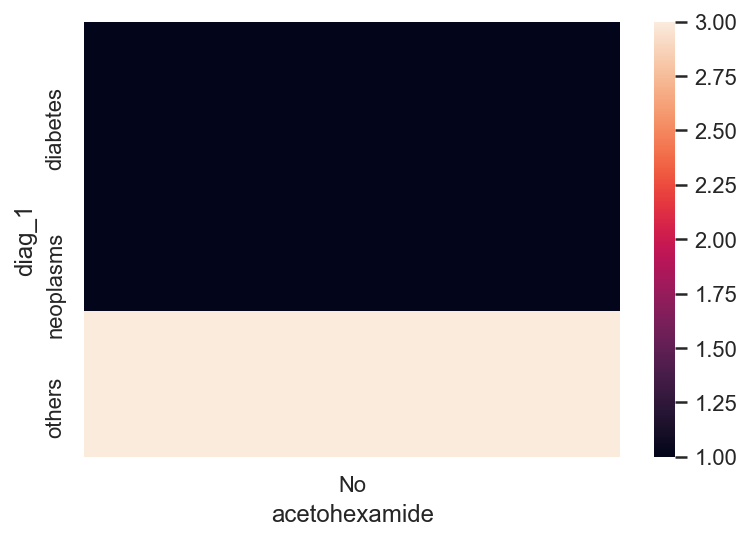

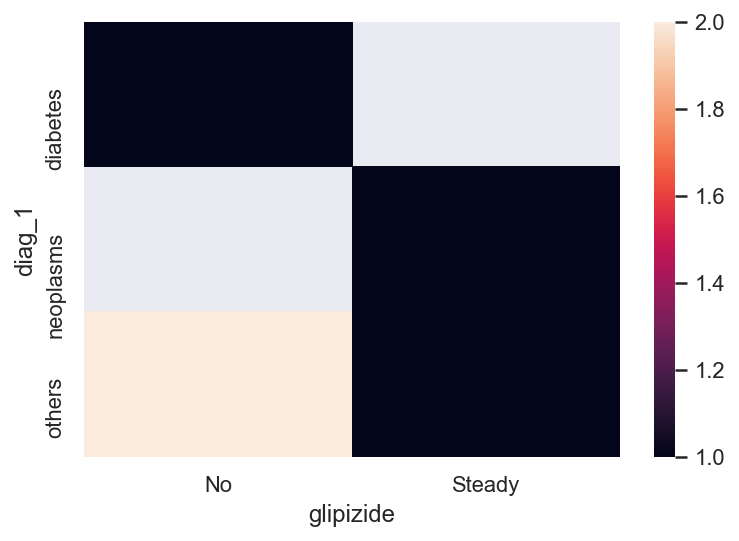

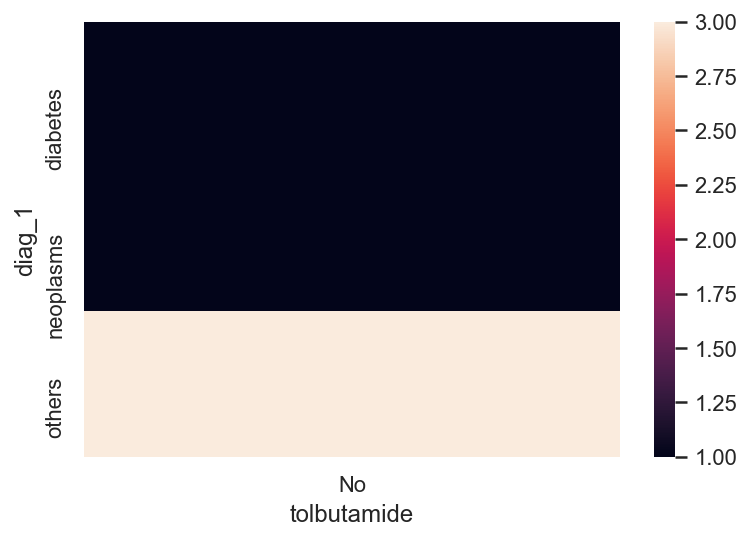

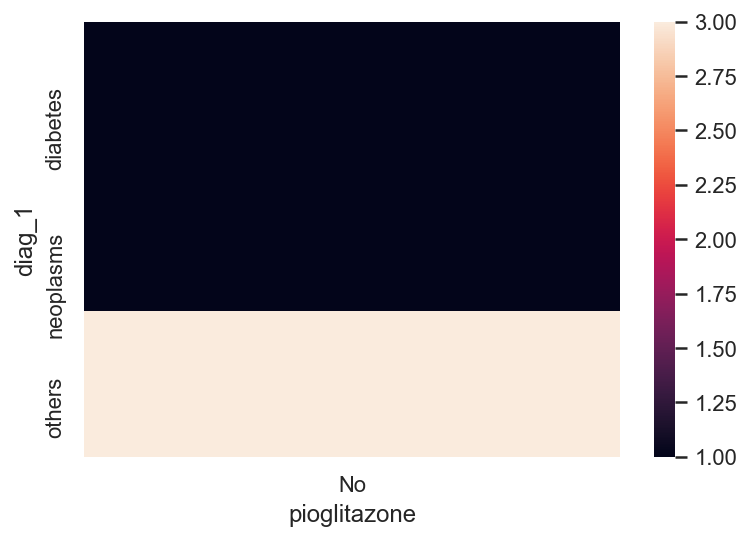

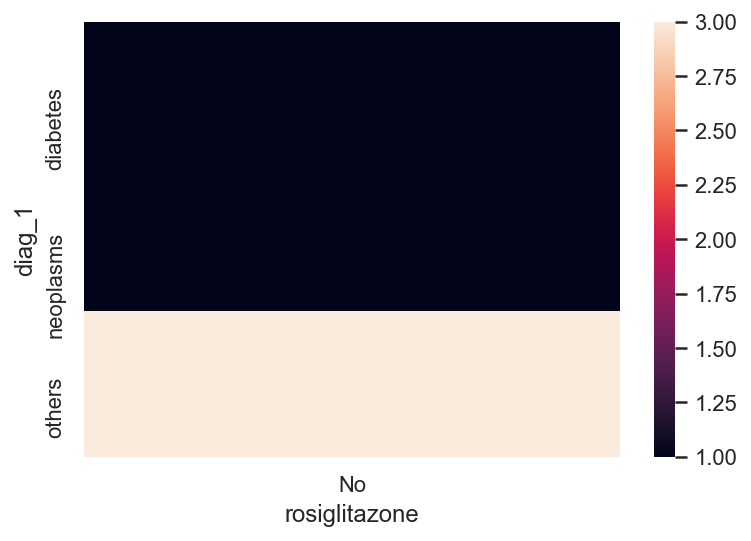

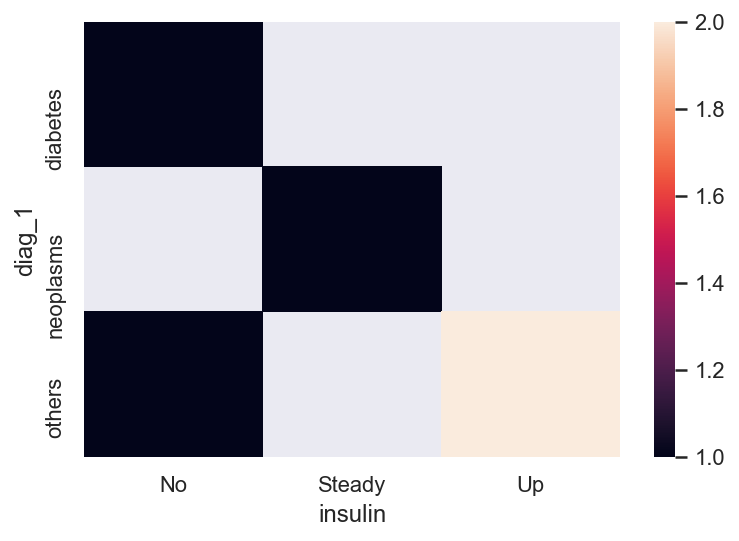

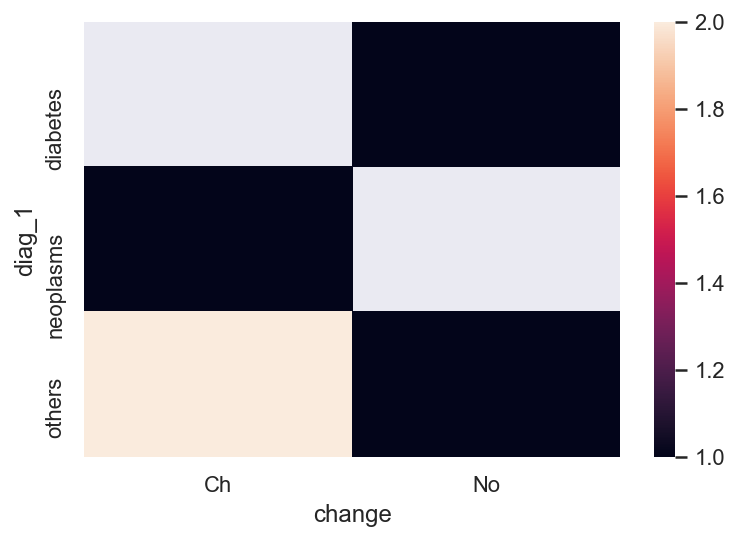

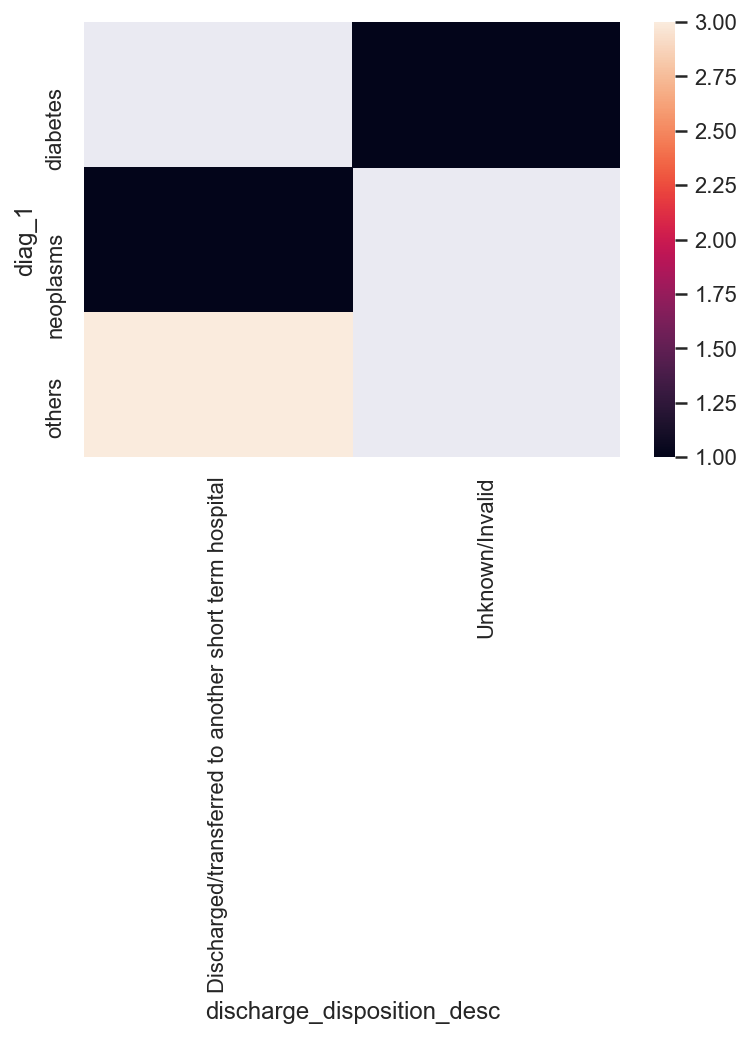

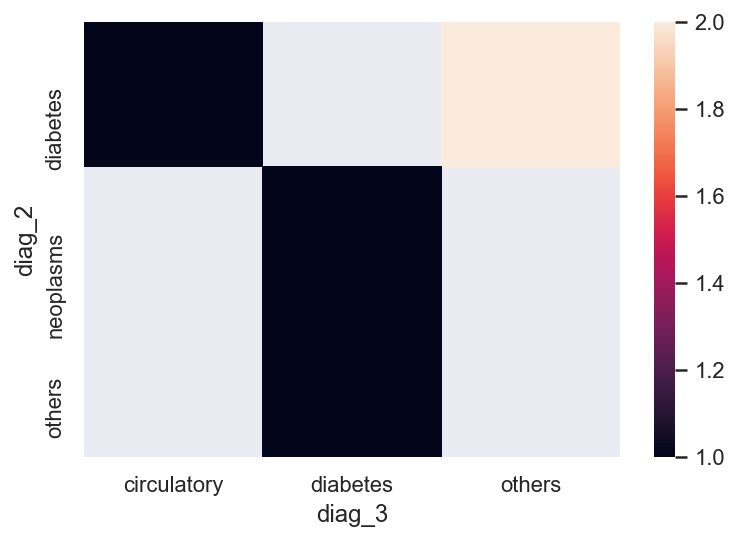

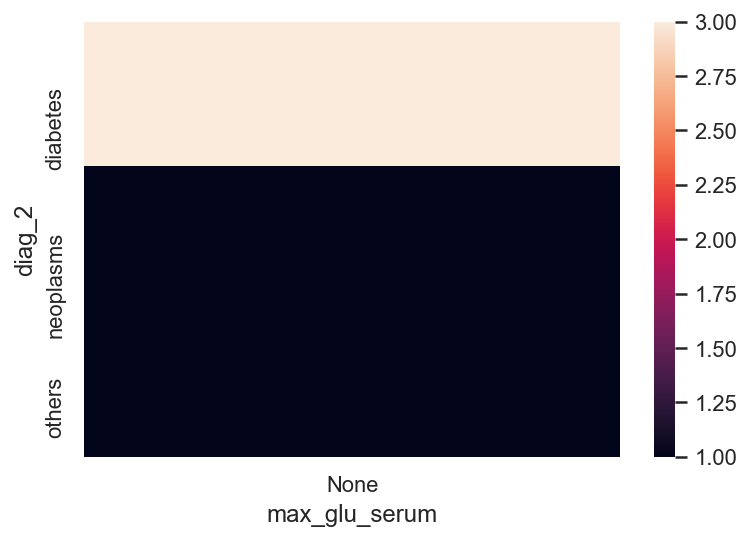

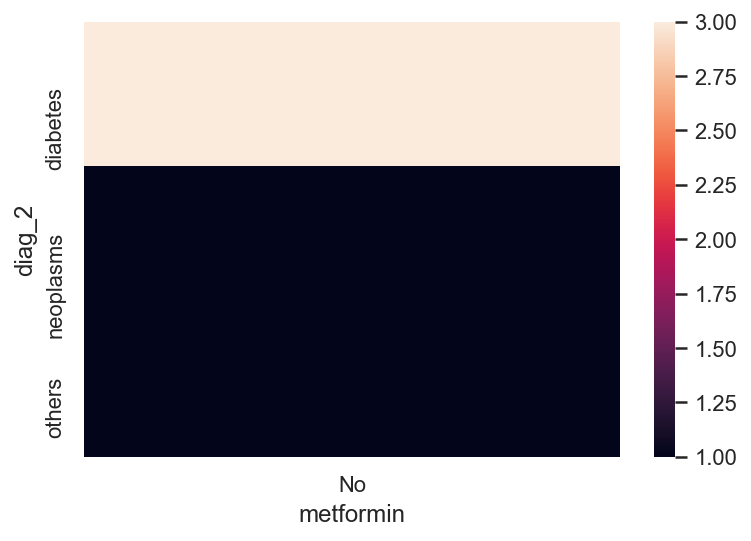

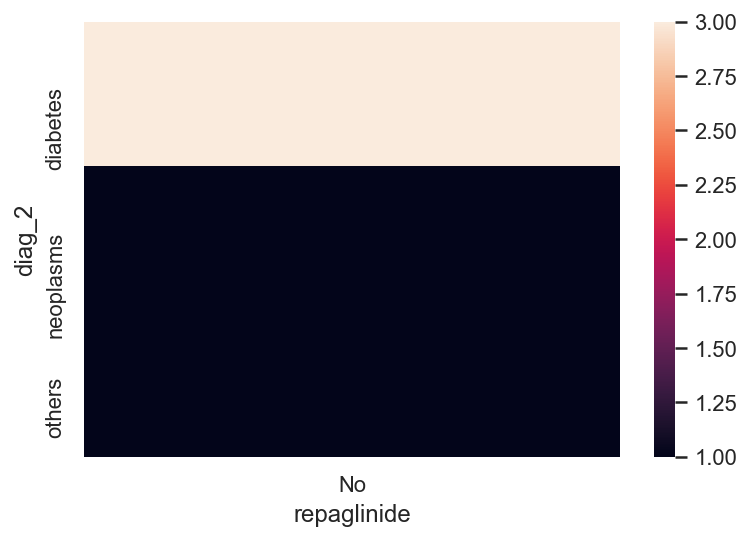

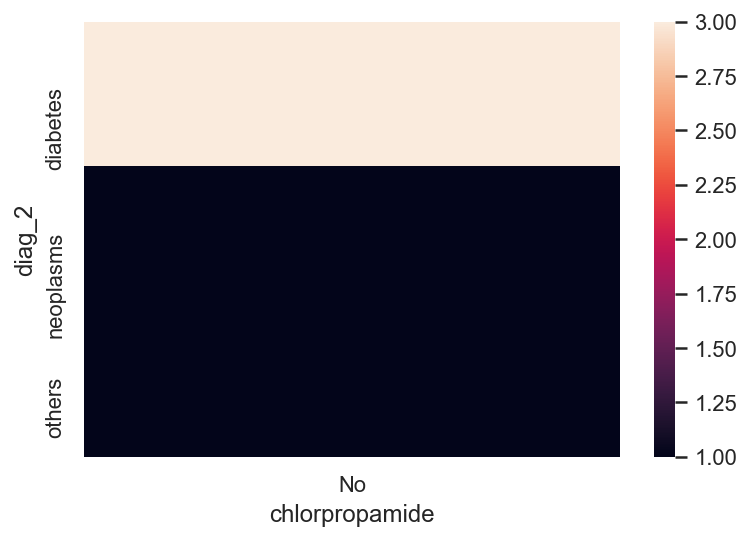

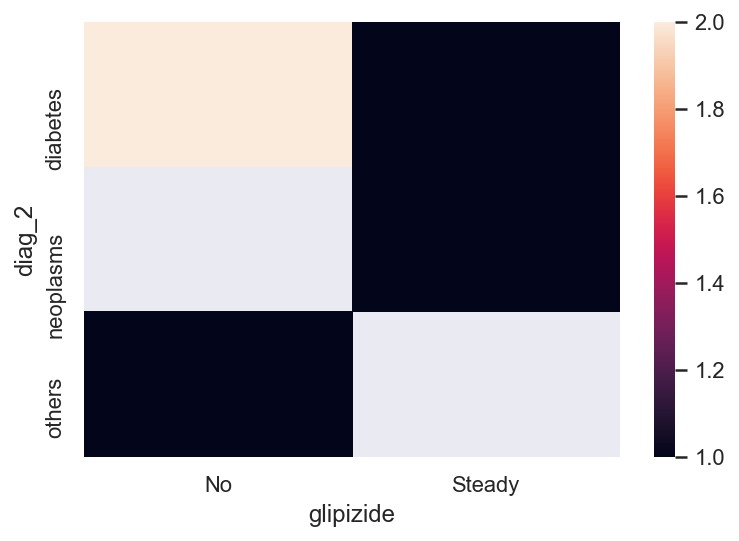

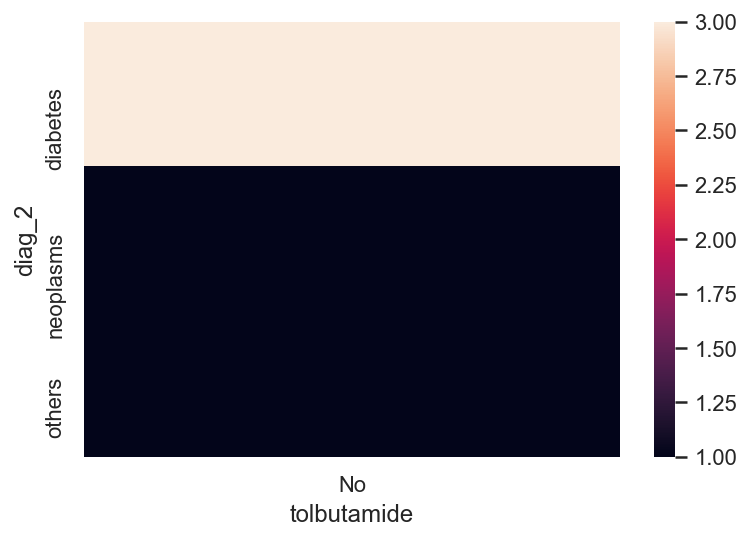

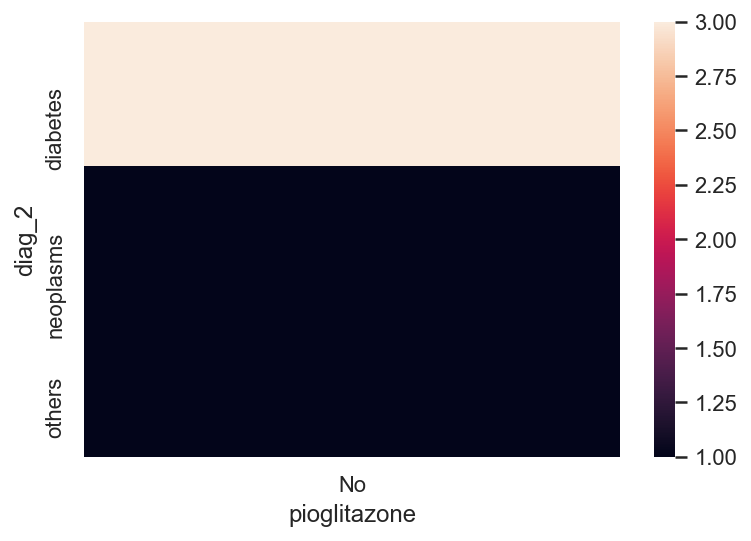

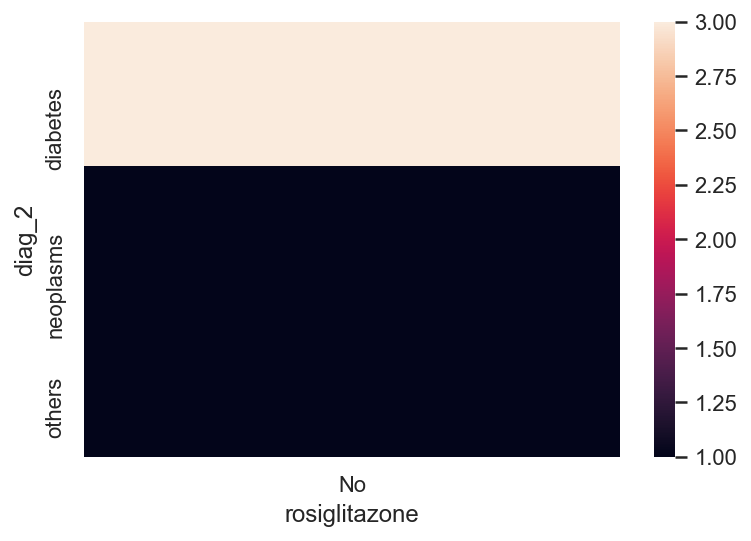

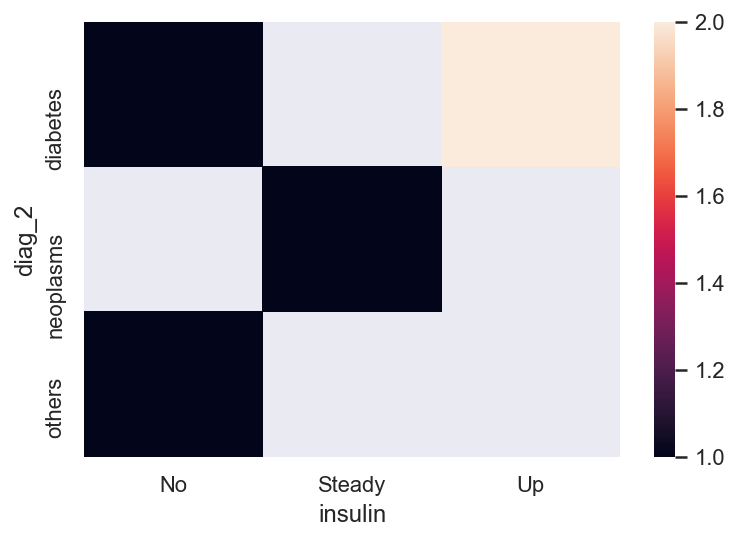

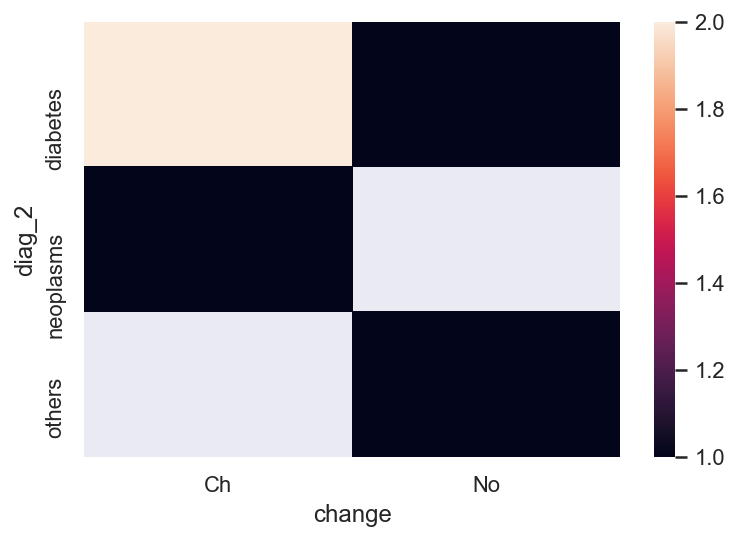

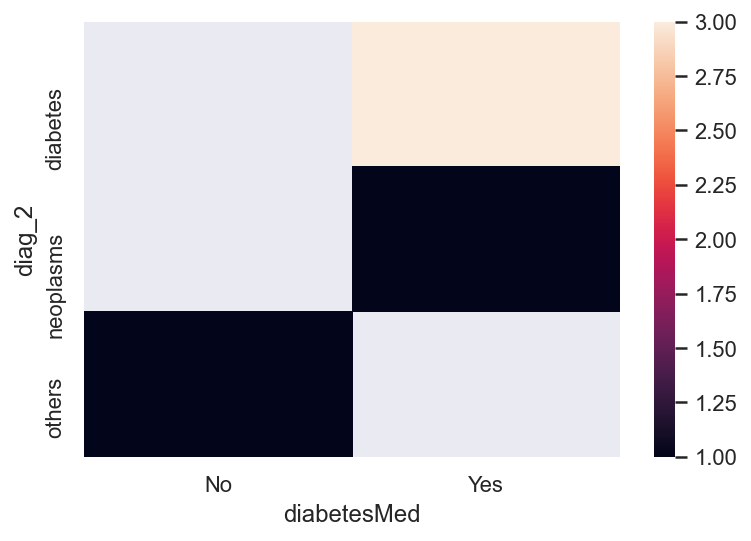

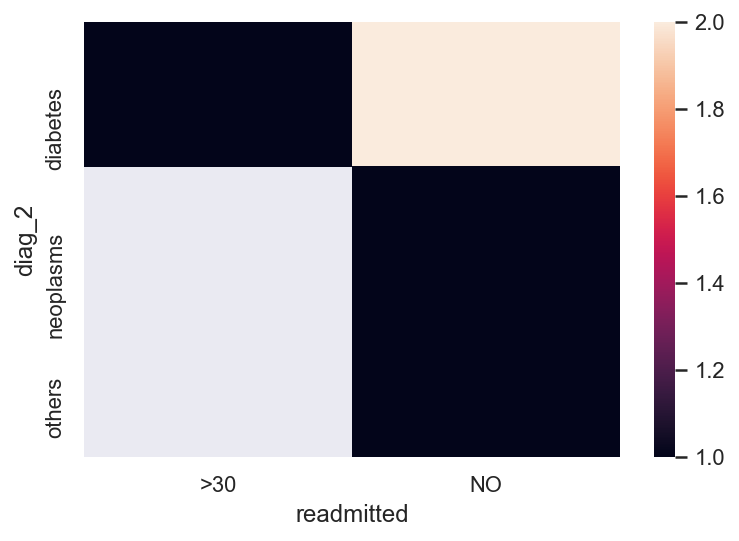

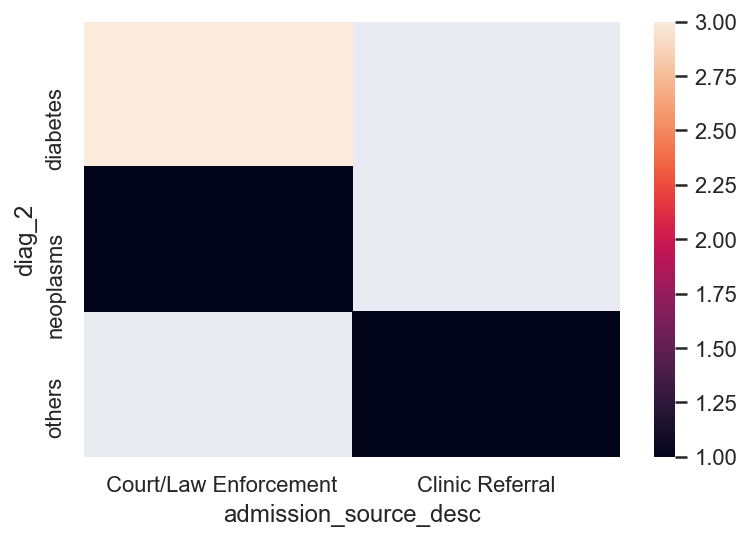

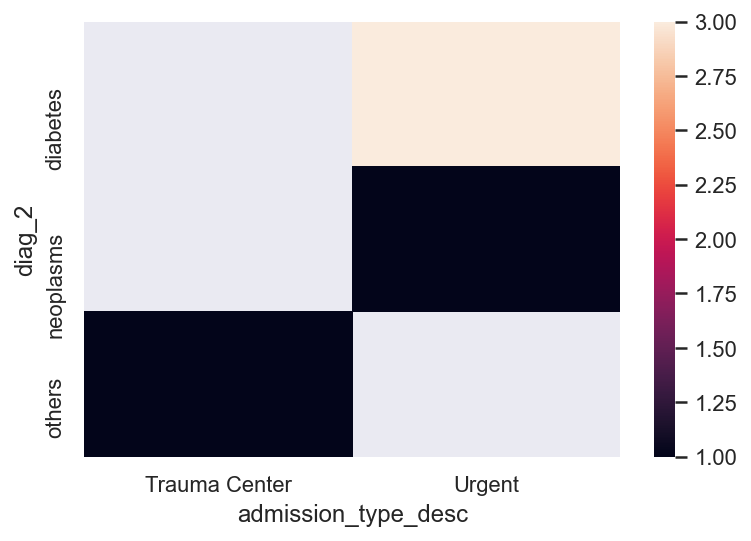

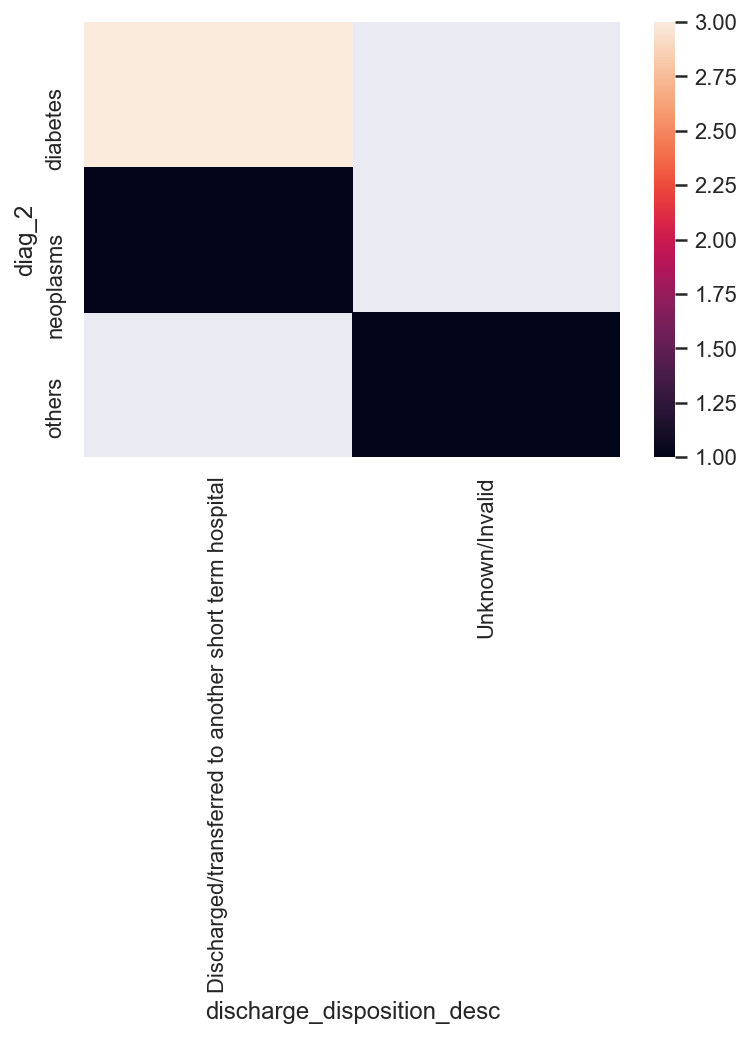

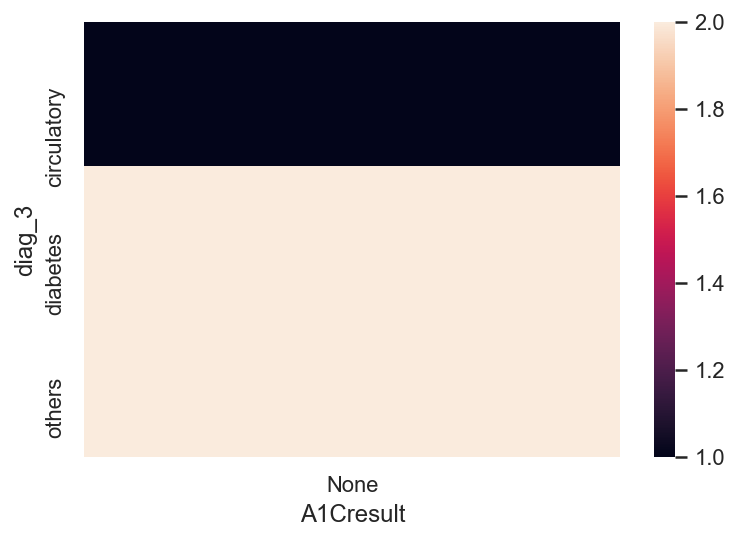

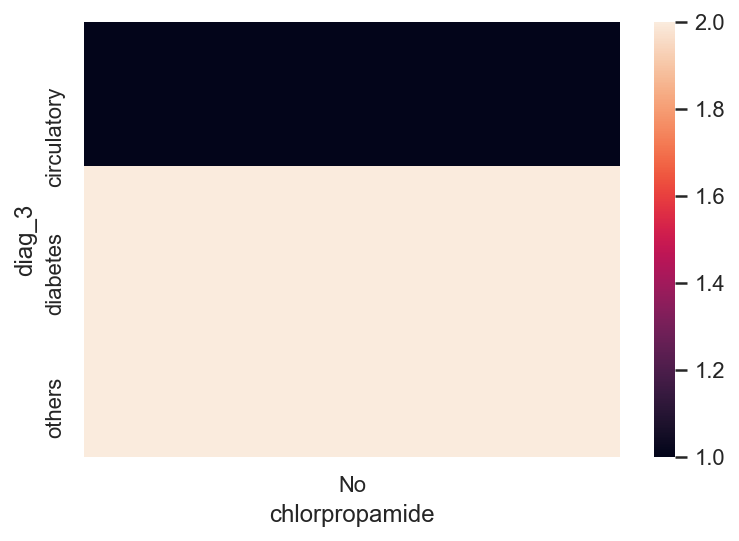

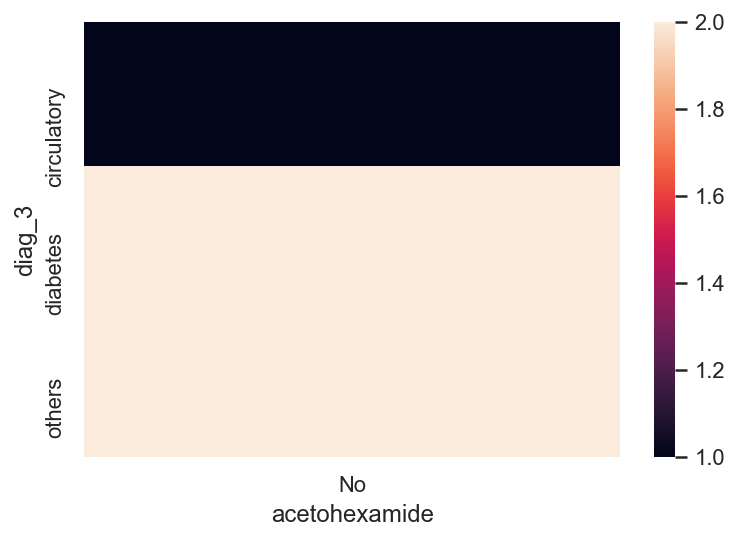

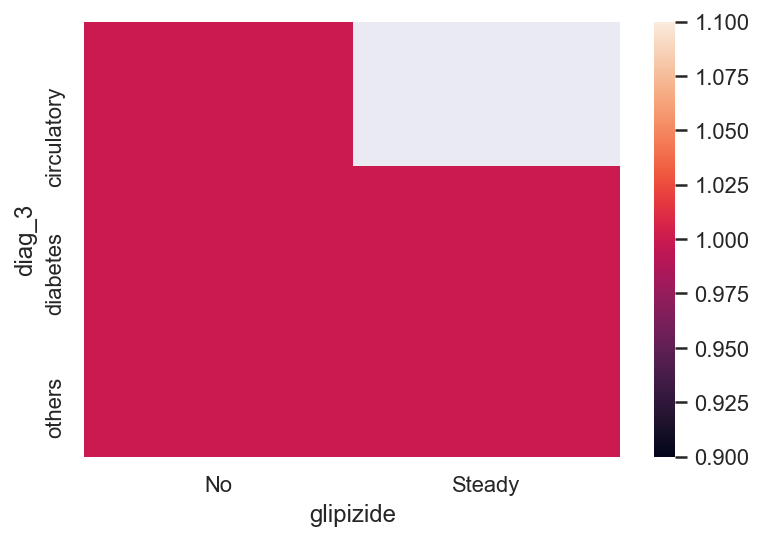

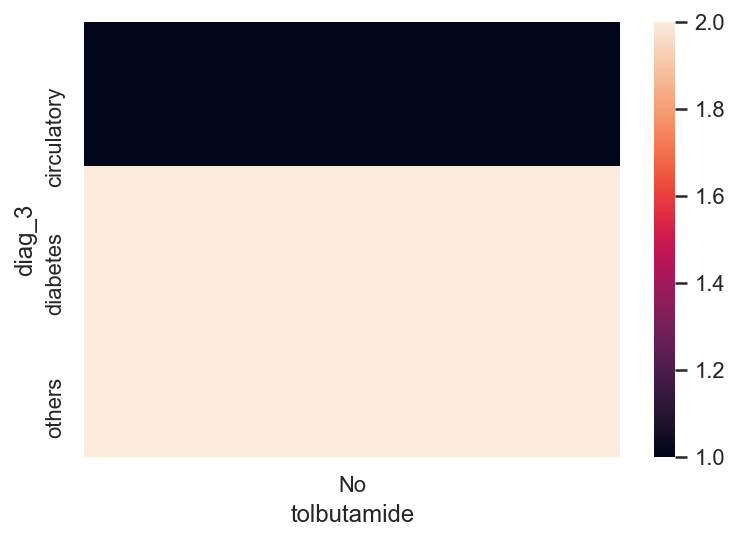

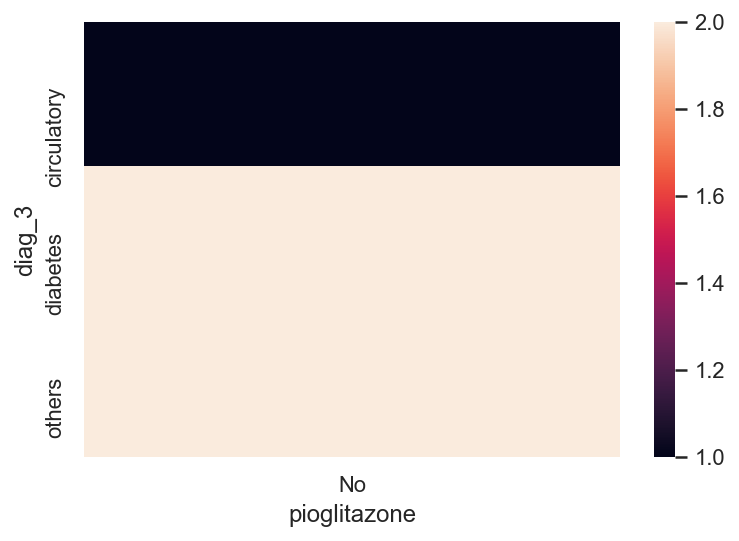

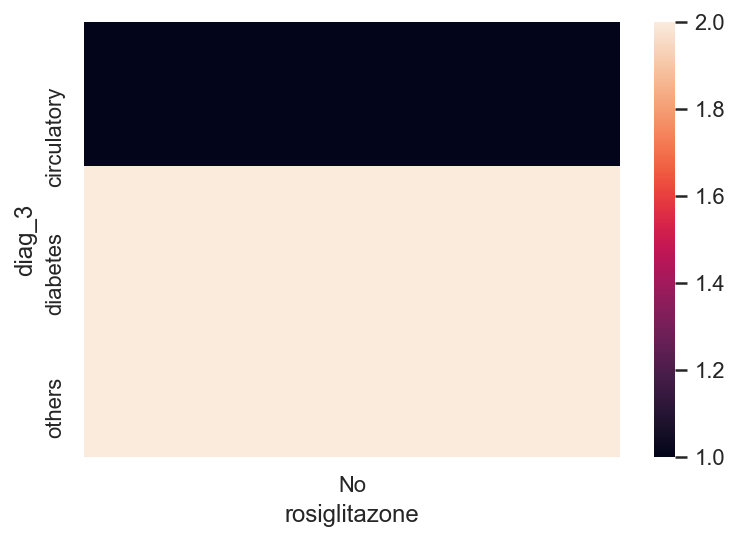

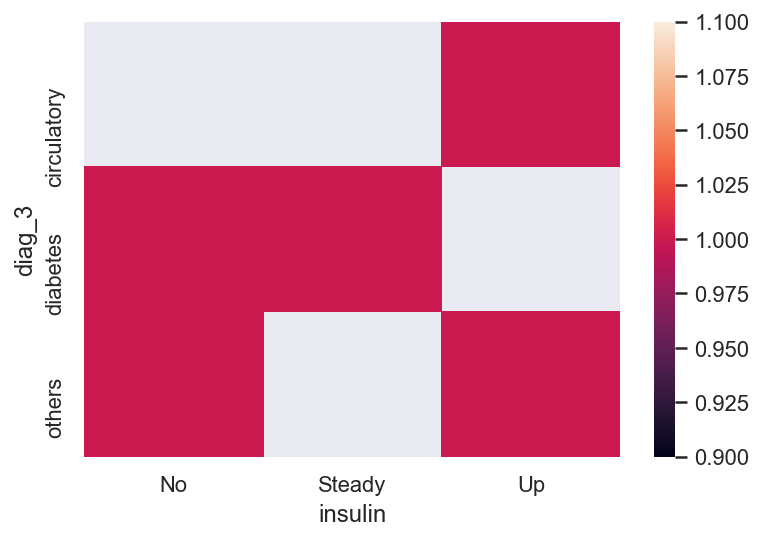

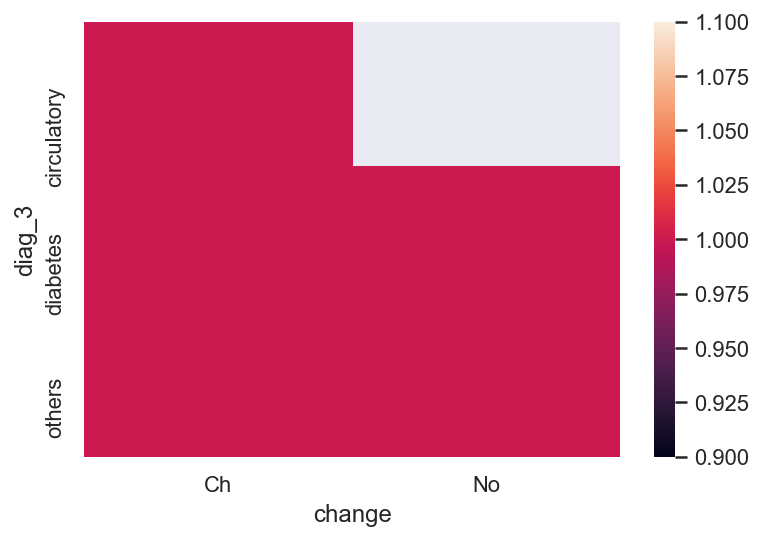

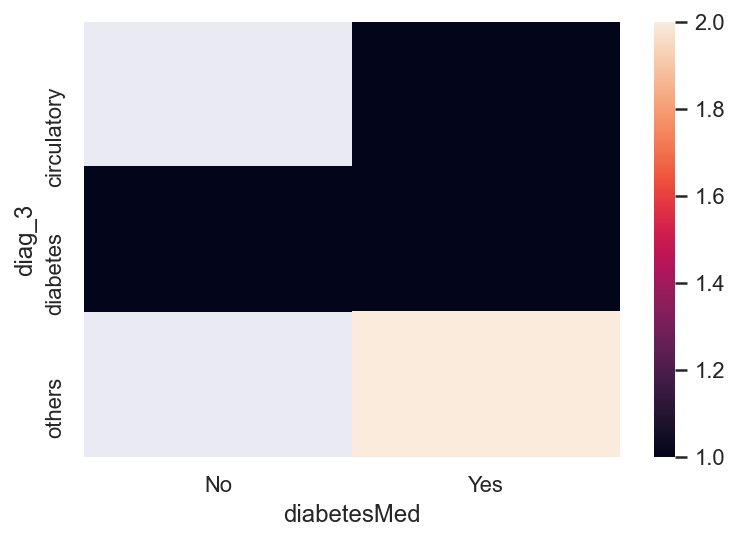

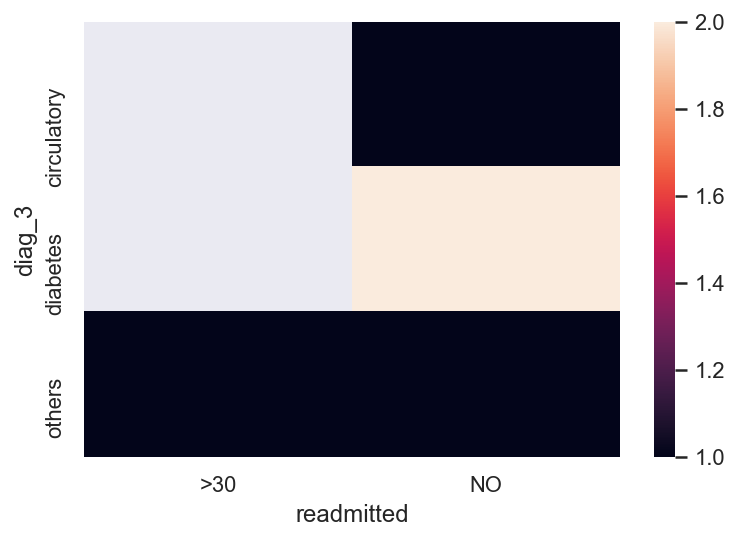

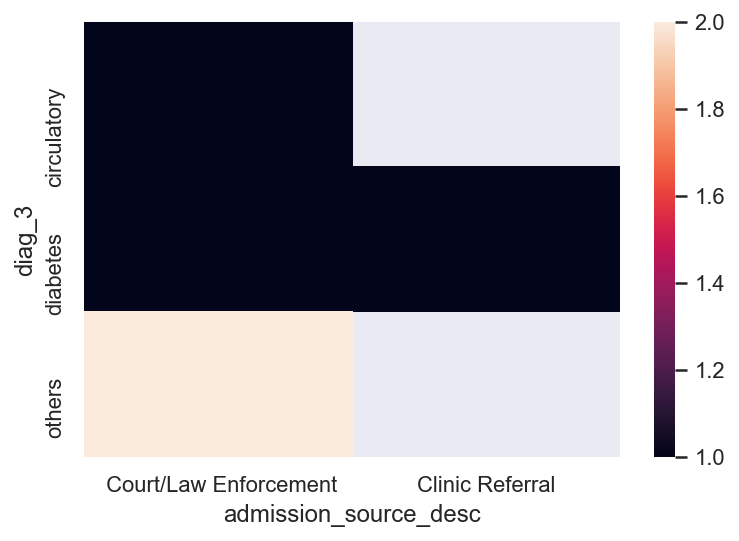

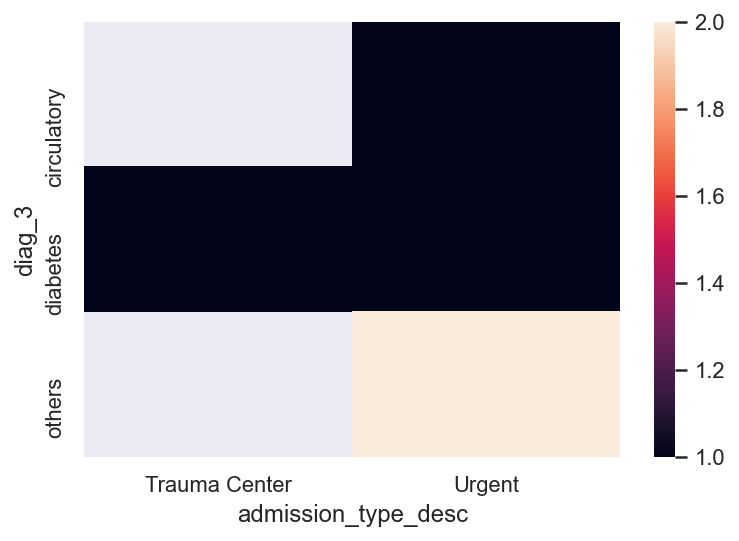

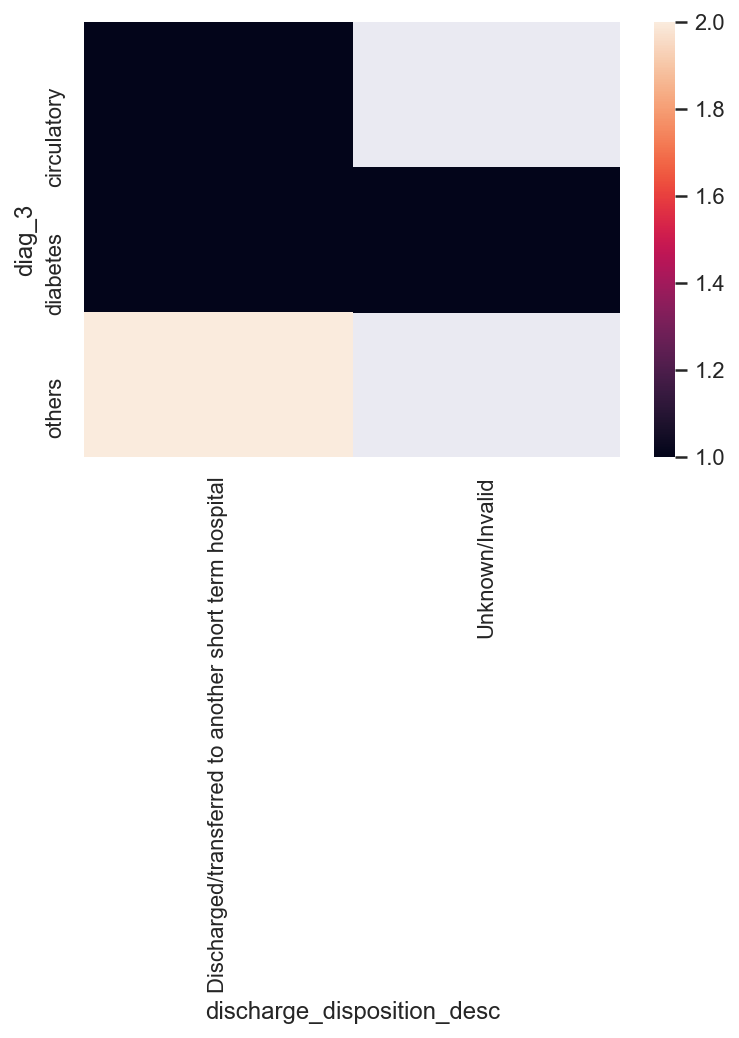

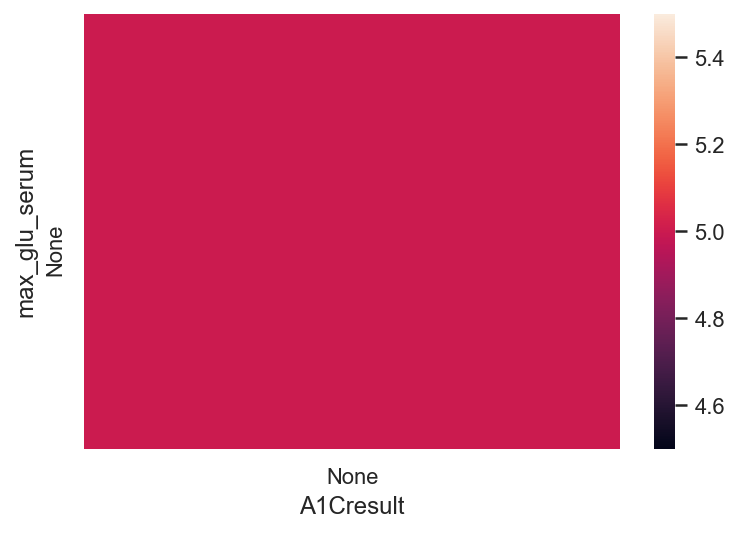

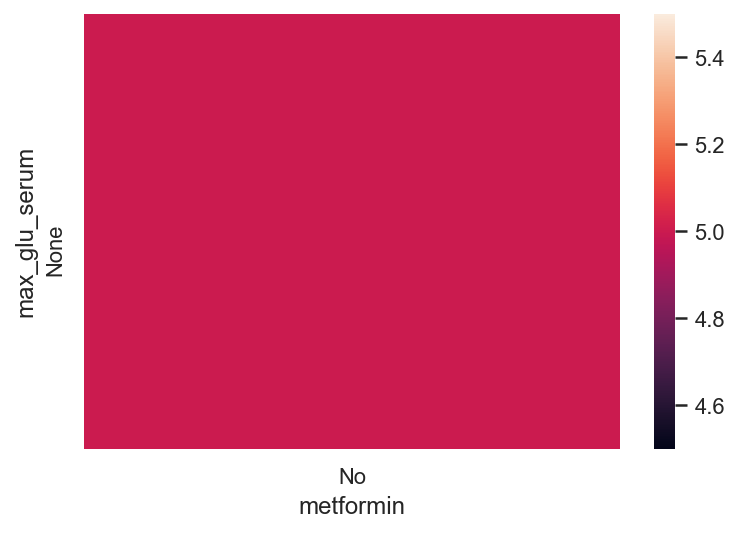

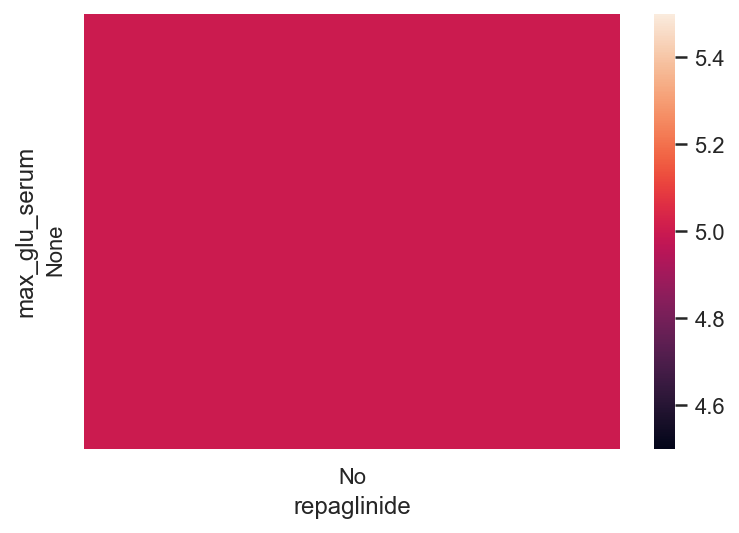

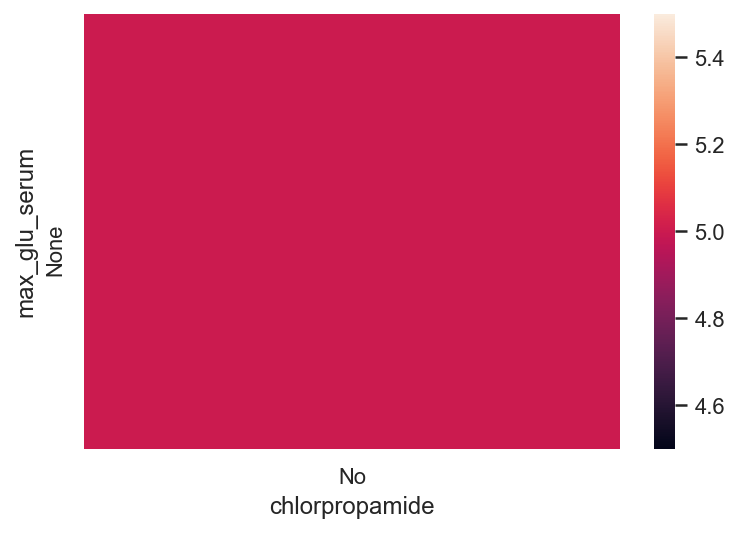

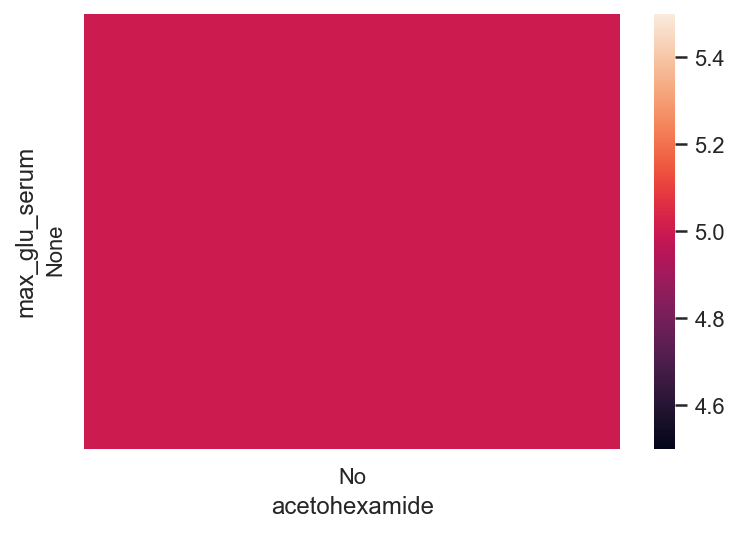

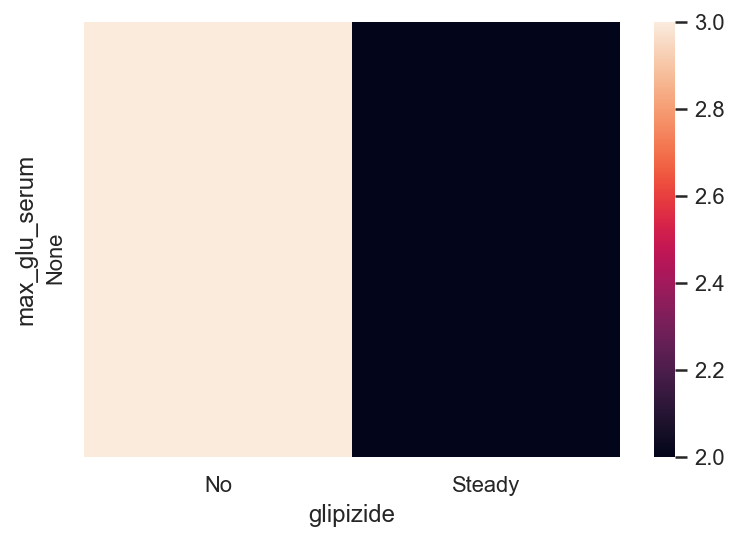

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

In [93]:
from itertools import combinations

columnas=list(combinations([i for i in data.select_dtypes(include = ['O']).columns if i not in ('encounter_id','patient_nbr')],2))
#
for i in range(len(columnas)):
    dbt_prueba=data[list(columnas[i])].head()
    prueba=dbt_prueba[list(columnas[i])].pivot_table(index=list(columnas[i])[0], columns=list(columnas[i])[1],aggfunc=len)
    ax = sns.heatmap(prueba)
    plt.show()



# Modelado



### seleccionar variables

In [97]:
data_var=data[['race', 'gender', 'age', 'time_in_hospital',  'num_lab_procedures', 'num_procedures','num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'readmitted', 'target']]
data_var.head()

race  gender      age  time_in_hospital  num_lab_procedures  \
0  Caucasian        0       [0-10)   1                 41                   
1  Caucasian        0       [10-20)  3                 59                   
2  AfricanAmerican  0       [20-30)  2                 11                   
3  Caucasian        1       [30-40)  2                 44                   
4  Caucasian        1       [40-50)  1                 51                   

   num_procedures  num_medications  number_outpatient  number_emergency  \
0  0               1                0                  0                  
1  0               18               0                  0                  
2  5               13               2                  0                  
3  1               16               0                  0                  
4  0               8                0                  0                  

   number_inpatient readmitted  target  
0  0                 NO         0       
1  0                 >30        0       
2  1                 NO         0       
3  0                 NO         0       
4  0                 NO         0



### estandarizar variables

In [100]:
#obtenemos nuestras variables objetivo
X = np.array(data_var[['time_in_hospital', 'num_procedures', 'num_medications']])
scaler = preprocessing.StandardScaler()
standardized = scaler.fit_transform(X)
X = standardized
X


array([[-1.13956206, -0.78265069, -1.85132852],
       [-0.46718381, -0.78265069,  0.24938977],
       [-0.80337293,  2.15804659, -0.36846855],
       ...,
       [-1.13956206, -0.78265069, -0.86275521],
       [ 1.88614007,  0.39362822,  0.62010476],
       [ 0.54138357,  0.98176768, -1.60418519]])

In [101]:
y = np.array(data_var['target'])
y

array([0, 0, 0, ..., 0, 0, 0])



### lanzar distintos algoritmos

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=8521,
                                                    stratify=y)   

## Decision Tree

In [109]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 10, random_state = 3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=3)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(y_train, tree.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     66567
           1       0.81      0.00      0.01      8518

    accuracy                           0.89     75085
   macro avg       0.85      0.50      0.47     75085
weighted avg       0.88      0.89      0.83     75085



## random forest

In [118]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=5)

In [119]:
from sklearn.metrics import classification_report
print(classification_report(y_train, rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     66567
           1       1.00      0.00      0.00      8518

    accuracy                           0.89     75085
   macro avg       0.94      0.50      0.47     75085
weighted avg       0.90      0.89      0.83     75085



## KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier

params = {'n_neighbors': np.arange(10,50,5)}

knn = GridSearchCV(KNeighborsClassifier(metric= 'euclidean', n_jobs= -1), param_grid= params, cv= 3, scoring= 'roc_auc', n_jobs= -1, verbose= 1)

mdl_knn = knn.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:   12.3s finished


In [129]:
from sklearn.metrics import classification_report
print(classification_report(y_train, knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     66567
           1       0.00      0.00      0.00      8518

    accuracy                           0.89     75085
   macro avg       0.44      0.50      0.47     75085
weighted avg       0.79      0.89      0.83     75085



C:\Users\MB83982\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




### evaluar los algoritmos para determinar cuál es el que mejor



# EXTRA



### hacer un clustering de aquellos pacientes que por lo menos han sido readmitidos una vez 